*This is a companion jupyter notebook for the publication "On the Influence of Catalyst Pore Structure in the Catalytic Cracking of Polypropylene" (preprint posted to ChemRxiv under doi.org/PLACEHOLDER) It provides an executable version of the manuscript, generating all figures and analyses from raw experimental data.*
# Companion Notebook for: On the Influence of Catalyst Pore Structure in the Catalytic Cracking of Polypropylene
Sebastian Rejman,<sup>1,†</sup> Tim Meijer,<sup>1,†</sup> Johan H. v.d. Minkelis,<sup>1</sup> Hamid Seyed Khabbaz,<sup>2</sup> Ali Gooneie,<sup>2</sup> Adriaan J.A. Duijndam,<sup>1</sup> Ina Vollmer,<sup>1*</sup> and Bert M. Weckhuysen<sup>1*</sup>

Inorganic Chemistry and Catalysis, Institute for Sustainable and Circular Chemistry, Department of Chemistry, Utrecht University, Universiteitsweg 99, 3584 CG Utrecht, The Netherlands.


## Installation (code)

In [ ]:
# # Cloning and installing dependencies
#!git clone https://github.com/MyonicS/Manuscript_Pores_2025
#%cd Manuscript_Pores_2025
# !pip install -r requirements.txt >> output_install.txt

In [ ]:
# import datahugger
# datahugger.get("10.17605/OSF.IO/ZXCTH", "data_dh",unzip=False)
# !unzip data_dh/data.zip -d data &>> output_unzipping.log
# !unzip data_dh/data_rheology.zip -d data_rheology &>> output_unzipping.log

This notebook is set up to run in google colab. If you intend to run this notebook on your own machine, check the readme file instructions.
We first get the required code and install the necessary modules. If the kernel crashes, restart from the cell below.

In [40]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, ticker as mticker
import pyTGA as tga
import numpy as np
import glob
import utils.utils as utils
utils.set_plot_defaults()

## Abstract

Catalytic cracking, one of the core processes of the refining of crude oil, is gaining industrial adoption to convert hard-to-recycle polyolefin plastics back into hydrocarbon feedstocks. While structure-composition-performance relationships for converting shorter hydrocarbons over solid acid catalysts, including zeolite-based materials, have been studied extensively, studies focusing on utilizing polyolefins are only now emerging. In this work, we isolate the effect of the catalyst pore size distribution in the catalytic cracking of polypropylene (PP). This was achieved by preparing a set of amorphous silica-alumina (ASA) materials with close to identical external acidity (~30 µmol/g) from silica supports of pore diameters ranging from 7 to 75 nanometers and particle sizes ranging from 1 to 40 µm. Surprisingly, it was observed that the mesopore pore size had only a minor effect on cracking activity, as measured by thermogravimetric analysis (TGA) at high PP:catalyst ratio. In contrast, at low PP:catalyst ratio, the particle size of the ASA catalyst material determined the minimal cracking temperature required. Smaller ASA catalyst particles (<1 µm) are wetted faster by PP due to the larger particle surface area. We rationalized our results by conducting a simplified simulation of pore intrusion utilizing the Lucas-Washburn equation of capillary flow, which suggested that pore filling could occur before the reaction onset in ramped experiments. Our findings indicate that in optimization of plastic cracking catalysts high external acidity and small particle size will play a significantly larger role compared to mesopore size.

## Introduction
Chemical conversion of plastics is expected to play a critical role in a circular economy, allowing to keep carbon atoms of plastic waste in the loop, for which mechanical recycling is not feasible.<sup>1</sup> Polymers that contain for example cleavable ester bonds along their backbone (e.g., polyethylene terephthalate, PET) can be directly converted into their monomers by processes like solvolysis. However this approach cannot be applied to the more chemically inert polyolefins, such as polyethylene (PE) and polypropylene (PP),  which make up the largest share of the plastics ever produced.<sup>2</sup> For both PE and PP, the industry is turning to thermal pyrolysis,<sup>3</sup> which breaks down these polymers to a broad range of hydrocarbons at high temperature. Adding a catalyst material to the process, and therefore moving from thermal pyrolysis to catalytic cracking, aims at overcoming two critical limitations of the thermal process: the required temperature can be lowered by more than 200 °C,<sup>4,5</sup> and the selectivity can be shifted to shorter, more isomerized alkanes as well as aromatics, avoiding high boiling tails.<sup>6</sup> A first commercial plant of a plastic cracking unit with a capacity of 50 kilotons per year is expected to be completed in 2025.<sup>7</sup>
Understanding so called structure-composition-performance relationships could help design catalyst materials that are tailored to plastic feedstock. In prior work, our group has shown that the most important limiting factor in the cracking of realistic, high molecular weight plastics is the high viscosity of the melt, which prohibits effective catalyst-polymer contact.<sup>4</sup> This limitation could be overcome by a molecular weight reducing pre-treatment, or by leveraging the shear-thinning properties of the plastics. We further showed that for fluid catalytic cracking (FCC) materials, containing a thick shell, access to the whole catalyst pore system can be noticeably restricted.<sup>4</sup> For the most common zeolite utilized in the cracking of high boiling crude fractions, namely (ultrastable) zeolite-Y (US-Y) with framework type FAU, it was demonstrated that the catalytic activity for cracking of PP is significantly better described by the density of acid sites located outside of micropores, rather than all acid sites.<sup>5</sup> Jaydev and coworkers furthermore recently showed that in hydrogenolysis of PE and PP different stirrings approaches can have a dramatic impact on catalyst effectiveness.<sup>8</sup>
In light of these significant mass-transport limitations, we expected that the pore structure of the catalyst material will likely be another critical parameter affecting plastic cracking performance. In conventional cracking of shorter hydrocarbons using zeolite based catalyst materials, introduction of mesopores can boost hydrocarbon cracking activity significantly.<sup>9</sup> Prior studies have compared the plastic cracking activity of catalyst materials with different pore sizes. However, the pore structure was never the only changed parameter. Using crystalline aluminosilicates, introduction of mesopores into zeolite ZSM-5 with framework MFI has been shown to increase plastic cracking activity,<sup>10</sup> while another study found a correlation between the required cracking temperature and the mesopore surface area of desilicated zeolite Beta with framework BEA.<sup>11</sup> Purely mesoporous materials have also been shown to outperform purely microporous zeolites, at least under certain conditions.<sup>12,13</sup> For example, it was recently shown that when comparing the activity of mesoporous sulfated zirconia catalysts to microporous zeolite-Y, low molecular weight PE can indeed enter into mesopores (diameter, d = 6.5 nm) of the support.<sup>14</sup> However, in these studies, the density and strength of active sites varied, which prohibits isolation of the influence of the pore structure.
Furthermore, a description of polymer dynamics in porous systems is very limited in the catalysis literature. In heterogenous catalysis, mass transport in porous systems is generally described by diffusion, which is driven by a concentration gradient. Contrary, when considering a polymer melt entering an empty pore in the absence of solvent, this type of diffusion cannot be applied, as no concentration gradient can be defined. The driving force of a fluid entering an empty or gas filled pore is not a concentration gradient, but capillary pressure. Capillary intrusion is described by the Lucas-Washburn equation<sup>15</sup> (Eq. 1):th framework MFI has been shown to increase plastic cracking activity,<sup>10</sup> while another study found a correlation between the required cracking temperature and the mesopore surface area of desilicated zeolite Beta with framework BEA.<sup>11</sup> Purely mesoporous materials have also been shown to outperform purely microporous zeolites, at least under certain conditions.<sup>12,13</sup> For example, it was recently shown that when comparing the activity of mesoporous sulfated zirconia catalysts to microporous zeolite-Y, low molecular weight PE can indeed enter into mesopores (diameter, d = 6.5 nm) of the support.<sup>14</sup> However, in these studies, the density and strength of active sites varied, which prohibits isolation of the influence of the pore structure.
Furthermore, a description of polymer dynamics in porous systems is very limited in the catalysis literature. In heterogenous catalysis, mass transport in porous systems is generally described by diffusion, which is driven by a concentration gradient. Contrary, when considering a polymer melt entering an empty pore in the absence of solvent, this type of diffusion cannot be applied, as no concentration gradient can be defined. The driving force of a fluid entering an empty or gas filled pore is not a concentration gradient, but capillary pressure. Capillary intrusion is described by the Lucas-Washburn equation<sup>15</sup> (Eq. 1):

\begin{equation}
L = \sqrt{\frac{\gamma r t \cos(\phi)}{2 \eta}}
\end{equation}

The intruded length L increases with the square root of the surface tension of the liquid γ, pore radius r, time t, and the cosine of the contact angle between the fluid and the pore ϕ. The intruded length decreases with increasing viscosity of the fluid η. We note that this simplified relationship needs to be extended if, for example, nanopores or non-cylindrical pores are to be modelled.<sup>16</sup> Gruener and coworkers have demonstrated that the intrusion of linear hydrocarbons of up to 60 carbon atoms in porous glass with pore diameters of 7-10 nm is described well by the Lucas-Washburn equation.<sup>17</sup> Others have utilized the relationship to study the viscosity of polymers confined in pores. For polystyrene (PS)<sup>18</sup> and PE,<sup>19</sup> the viscosity has been shown to increase up to 2-3 orders of magnitude if the pore diameter is smaller than the radius of gyration<sup>20</sup> of the polymer. Molecular dynamics simulations have furthermore indicated that Eq. 1 needs to account for the slip length of the polymer at the pore wall for an accurate description of the intrusion process.<sup>21</sup>
The intruded length L increases with the square root of the surface tension of the liquid γ, pore radius r, time t, and the cosine of the contact angle between the fluid and the pore ϕ. The intruded length decreases with increasing viscosity of the fluid η. We note that this simplified relationship needs to be extended if, for example, nanopores or non-cylindrical pores are to be modelled.<sup>16</sup> Gruener and coworkers have demonstrated that the intrusion of linear hydrocarbons of up to 60 carbon atoms in porous glass with pore diameters of 7-10 nm is described well by the Lucas-Washburn equation.<sup>17</sup> Others have utilized the relationship to study the viscosity of polymers confined in pores. For polystyrene (PS)<sup>18</sup> and PE,<sup>19</sup> the viscosity has been shown to increase up to 2-3 orders of magnitude if the pore diameter is smaller than the radius of gyration<sup>20</sup> of the polymer. Molecular dynamics simulations have furthermore indicated that Eq. 1 needs to account for the slip length of the polymer at the pore wall for an accurate description of the intrusion process.<sup>21</sup>
The goal of this study is to isolate the effect of the pore structure on the activity of solid acid catalysts in the cracking of polyolefin plastics. To achieve this, we have prepared a set of catalyst materials that deviate in pore structure, yet do not vary significantly in their density of Brønsted acid sites (BAS) located outside of the micropores. This external BAS density was chosen over the bulk BAS density, as the access of polymer to micropores (d < 2 nm)<sup>22</sup> is highly restricted.<sup>23</sup> This leads to activity trends in the cracking of PP using US-Y being noticeably better described by the external, rather than bulk BAS density.
The goal of this study is to isolate the effect of the pore structure on the activity of solid acid catalysts in the cracking of polyolefin plastics. To achieve this, we have prepared a set of catalyst materials that deviate in pore structure, yet do not vary significantly in their density of Brønsted acid sites (BAS) located outside of the micropores. This external BAS density was chosen over the bulk BAS density, as the access of polymer to micropores (d < 2 nm)<sup>22</sup> is highly restricted.<sup>23</sup> This leads to activity trends in the cracking of PP using US-Y being noticeably better described by the external, rather than bulk BAS density.
This is made possible by homogenous deposition/precipitation (HDP) of Al on silicas of varying pore structures, forming so called amorphous silica-alumina (ASA) catalyst materials (Fig. 1). For one silica support we first demonstrate how this approach allows to control external acidity, determined by infrared spectroscopy of adsorbed 1,3,5-tri-tert-butyl-pyridine (TTBP-IR) as applied previously to zeolites based materials.<sup>5</sup> Next, we investigate how changes in acidity affect the cracking activity of low molecular weight PP, which was determined by ramped thermogravimetric analysis (TGA) of polymer-catalyst mixtures under N2 atmosphere to simulate plastic cracking, as shown previously.<sup>4,5,24</sup> We then apply the HDP approach to four more mesoporous silica supports, and tune the Al dosing to obtain materials with very similar external acid site densities, and verify the comparable strength of these sites with temperature programmed desorption (TPD) of TTBP. After comparing activity differences using TGA, we rationalize the findings by applying a simplified simulation of the intrusion of molten polymer into pores of specified diameters.
This is made possible by homogenous deposition/precipitation (HDP) of Al on silicas of varying pore structures, forming so called amorphous silica-alumina (ASA) catalyst materials (Fig. 1). For one silica support we first demonstrate how this approach allows to control external acidity, determined by infrared spectroscopy of adsorbed 1,3,5-tri-tert-butyl-pyridine (TTBP-IR) as applied previously to zeolites based materials.<sup>5</sup> Next, we investigate how changes in acidity affect the cracking activity of low molecular weight PP, which was determined by ramped thermogravimetric analysis (TGA) of polymer-catalyst mixtures under N2 atmosphere to simulate plastic cracking, as shown previously.<sup>4,5,24</sup> We then apply the HDP approach to four more mesoporous silica supports, and tune the Al dosing to obtain materials with very similar external acid site densities, and verify the comparable strength of these sites with temperature programmed desorption (TPD) of TTBP. After comparing activity differences using TGA, we rationalize the findings by applying a simplified simulation of the intrusion of molten polymer into pores of specified diameters.


![Figure 1](figures_annotated/Fig_1.svg)

**Fig. 1** Summary of the synthesis-characterization-testing-simulation combo approach utilized in this work. a) Catalyst synthesis by homogeneous deposition-precipitation (HDP) of Al on silica supports of different pore structures b) Acidity characterization by infrared (IR) spectroscopy of adsorbed tri-tert-butyl-pyridine (TTBP). Dotted line signifies the N-H vibration. c) Evaluating the plastic cracking activity by thermogravimetric analysis (TGA) of catalyst-polypropylene (PP) mixtures. d) Simulation of intrusion behavior by applying Lucas-Washburn equation.


## Results and Discussion

### Synthesis of catalyst materials with similar external acidities but varying pore structures
In a set of preliminary experiments, varying amounts of acid sites were introduced on fumed silica, which was used as a model with very limited porosity. The goal of these experiments was to establish that non-micropore (i.e. external) acidity can be controlled by variation of Al loading in order to obtain catalyst materials of similar external acidity in a second stage. In addition, these experiments allow to isolate the role of external acidity for catalyst with almost identical morphology.
Fig. 2a shows the concentration of non-micropore (i.e. external) acid sites determined by IR spectroscopy of adsorbed TTBP introduced on fumed silica as a function of Al added in the HDP synthesis. The corresponding spectra are depicted in Fig. S1. The concentration increases with increasing Al loading, showing that this approach is well suited to generate catalyst material with controlled external acidity. It is worth noting that, the external BAS does not increase linearly with Al loading, but rather asymptotically. The synthesis of acid sites on silica relies on condensation of aluminum hydroxides with surface silanol groups.<sup>25</sup> At increasing Al loading, less and less silanol groups are available for functionalization, leading to an asymptotic increase in acid site density with increasing Al density. As shall be seen in the section "Tailoring catalyst acidity", this complicates the synthesis of ASAs from different supports at identical acid site density. The external acid site density in µmol/g is used in the following as an index to label the respective catalytic materials. For example, F<sub>37</sub> refers to an ASA made from fumed silica with an external acid site density of 37 µmol/g.

![Figure 2](figures_annotated/Fig_2.svg)

**Fig. 2** a) Non-micropore (i.e. external) Brønsted acid site (BAS) density of amorphous silica-alumina (ASA) catalyst prepared by deposition of Al on fumed silica probed by tri-tert-butyl-pyridine infrared spectroscopy (TTBP-IR). b) Comparison of external and bulk BAS density as well as Lewis acid site (LAS) density for the three prepared ASAs probed by TTBP-IR and pyridine (Py-IR) respectively. c) Weight-loss profiles and their derivatives for catalytic cracking of polypropylene using F<sub>37</sub> ASA in units of remaining polymer weight determined by ramped thermogravimetric analysis (TGA) at varying catalyst loading. The index in the catalyst label denotes the external acid site density in µmol/g. d) Temperature at 50% conversion to volatile products ($T$<sub>50</sub>) as function of catalyst loading determined by TGA for ASAs of varying external acidity denoted in the label index in µmol/g. Thermal cracking temperature drawn as horizontal line for reference.


Fig. 2b shows a comparison of external and bulk BAS densities, determined by IR spectroscopy of adsorbed TTBP and Py, respectively, as well as Lewis acid site (LAS) density, probed by Py. As the fumed silica material contains almost no micropores (Tab. S1), one would expect the acid site densities determined by TTBP and Py to match. However, the density of acid sites probed by TTBP is slightly lower than the acid site density measured by Py. The cause of this might be either presence of acid sites inaccessible to TTBP, or inaccuracies in the extinction coefficients. The extinction coefficient for TTBP was adapted from ZY,<sup>26</sup> while for Py extinction coefficients have been shown to vary by as much as 50% under different confinement (e.g. between Zeolite-Y and ZSM-5),<sup>27</sup> which could lead to inaccuracies when applied to different materials. Furthermore, TTBP is expected to be a significantly stronger base than Py, as the pKa of pyridines generally increases with increasing aliphatic substitution.<sup>28</sup> In a related work currently in preparation which applies this metric to zeolite based materials, the stronger basicity of TTBP compared to Py was confirmed by quantum chemical calculations. Therefore, at the utilized adsorption temperature, the probe molecules can be expected to be desorbed to different degrees, especially since the distribution of acid site strengths for ASAs is very broad.<sup>29</sup>

The LAS density is noticeably larger than the BAS density. This is because Al that is not forming BAS is deposited as Lewis acidic alumina on the silica surface. Especially at higher Al loadings, less silanol groups are available and a larger share of the Al3+ ends up forming alumina rather than BAS. We note that external Lewis acidity cannot be probed by TTBP due to steric hindrance by the tert-butyl groups.<sup>26</sup> For F<sub>71</sub>, ~77% of Al atoms added form either a BAS or LAS, suggesting a high dispersion of the formed Lewis acidic alumina.

The activity of the ASAs was probed by ramped TGA of polymer-catalyst mixtures, as described previously.<sup>4,5,24</sup> Fig. 2c shows TGA weight loss profiles for cracking of PP using F<sub>37</sub> at different catalyst loadings expressed in weight-percent of polymer weight. For the weight loss profiles of all catalytic materials the reader is referred to Fig. S2 in the SI. As a simplified measure of activity, the temperature at 50% conversion of the polymer to volatile products ($T$<sub>50</sub>) is identified. A lower $T$<sub>50</sub> at identical catalyst loading corresponds to a more active catalyst material. To compare the activity between catalyst materials, $T$<sub>50</sub> is plotted as a function of catalyst loading (Fig. 2d). This allows reliable comparisons between catalysts, even if not the exact same catalyst loadings are hit. All materials decrease the required cracking temperature for PP by more than 50 °C compared to purely thermal pyrolysis even at low loading. In these plots, the lower lying curves correspond to a more active catalytic material. As with catalyst materials studied previously,<sup>4,5,24</sup> the required cracking temperature decreases with increasing catalyst loading. $T$<sub>50</sub> decreases consistently with increasing number of external sites, strengthening the previously proposed role of external acid site concentration as performance descriptor in polyolefin cracking.<sup>5</sup>  

The initial increase in external acid site density (37 to 50 µmol/g for F<sub>37</sub> and F<sub>50</sub> respectively) causes a larger decrease in $T$<sub>50</sub> than the second increase from 50 to 71 µmol/g for F<sub>50</sub> and F<sub>71</sub>, suggesting diminishing returns. The comparison can also be conducted using a loading basis per-acid site (Fig. S3). While the curves for F<sub>71</sub> and F<sub>50</sub> overlap, F<sub>37</sub> shows a slightly higher $T$<sub>50</sub> per acid site, which could be a sign of mass transport limitations.

### Infrared spectroscopy pre-processing (text + code)

#### Pyridine-IR
Bulk and external acidity were characterized by IR spectroscopy of adsorbed pyridine (Py, 99.8%, Sigma Aldrich) and TTBP (99%, Sigma Aldrich) respectively as in a prior study.<sup>5</sup> In short, a 13 mm self-supported disc of the catalytic material (ca. 17 mg) was pressed at 2 tons. Spectra were acquired using a ThermoFischer Scientific Nicolet spectrometer at a resolution of 4 cm-1 and averaged over 16 scans (1 s each). The pellet was dried at 500 °C (5 °C/min) under high vacuum (10-5 mbar) for 30 min, and baseline spectra were acquired during cooling down. Py was dosed at 7-10 mbar pressure at 150 °C for 1 h. TTBP was dosed at 80 °C from a heated vial. The cell was evacuated for an additional 30 min, and the resulting spectrum was used for quantification. For Py, the peaks assigned to the ring vibration of a protonated Py at ~1545 cm-1 and at ~1450 cm-1 assigned to Py coordinated to a Lewis acid site were integrated by fitting of a Lorentzian. Extinction coefficients of ε1545 = 0.50 cm/μmol and ε1450 = 1.46 cm/μmol were utilized.<sup>6</sup> For TTBP, the peak corresponding to the N-H vibration at 3360 cm-1 was quantified with a extinction coefficient of ε3370-3350 = 5.74 cm/μmol.<sup>7</sup> Absolute acid site densities determined using this extinction coefficient should be used with caution, as it was determined for ZY, not ASAs. For comparison of desorption temperatures of the probe molecules, the sample was heated at 5 °C/min to 500 °C under continuous acquisition of spectra. The SpectroChemPy library<sup>8</sup> was utilized in the data processing.

In [ ]:
from spectrochempy_omnic import OMNICReader as read
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from utils import IR_utils as ir
import utils.utils as utils
import utils.db_query as dbq
utils.set_plot_defaults()
import pyTGA as tga

cwd = os.getcwd()

home = cwd
data_dir = os.path.join(os.path.dirname(cwd), 'data','data')

if not os.path.exists(os.path.join(cwd, 'figures')):
    os.makedirs(os.path.join(cwd, 'figures'))
plotdir = os.path.join(cwd, 'figures')

if not os.path.exists(os.path.join(plotdir, 'SI')):
    os.makedirs(os.path.join(plotdir, 'SI'))
plotdir_SI = os.path.join(plotdir, 'SI')

db = dbq.get_db()

/tmp/ipykernel_4914/3734834025.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The BAS_Py_SR density of F04 is 43 µmol/g
The LAS_Py_SR density of F04 is 66 µmol/g


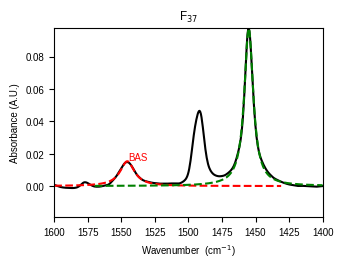

/tmp/ipykernel_4914/3734834025.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The BAS_Py_SR density of F05 is 102 µmol/g
The LAS_Py_SR density of F05 is 155 µmol/g


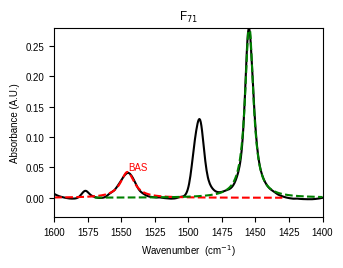

/tmp/ipykernel_4914/3734834025.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The BAS_Py_SR density of F06 is 56 µmol/g
The LAS_Py_SR density of F06 is 84 µmol/g


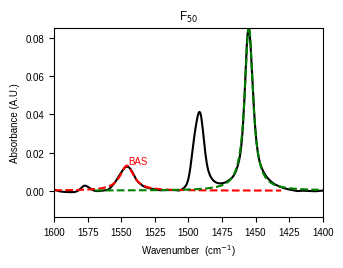

/tmp/ipykernel_4914/3734834025.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The BAS_Py_SR density of H04 is 37 µmol/g
The LAS_Py_SR density of H04 is 59 µmol/g


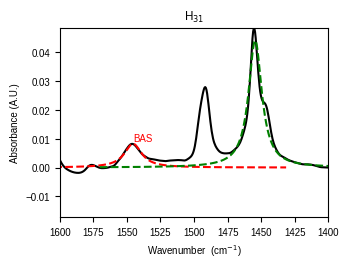

/tmp/ipykernel_4914/3734834025.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The BAS_Py_SR density of L01 is 52 µmol/g
The LAS_Py_SR density of L01 is 82 µmol/g


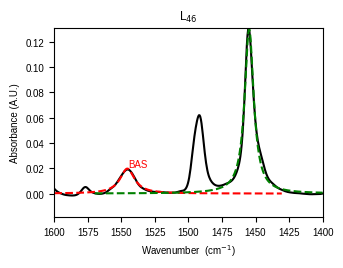

/tmp/ipykernel_4914/3734834025.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The BAS_Py_SR density of L04 is 78 µmol/g
The LAS_Py_SR density of L04 is 146 µmol/g


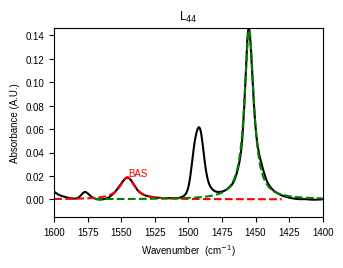

/tmp/ipykernel_4914/3734834025.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The BAS_Py_SR density of L05 is 39 µmol/g
The LAS_Py_SR density of L05 is 71 µmol/g


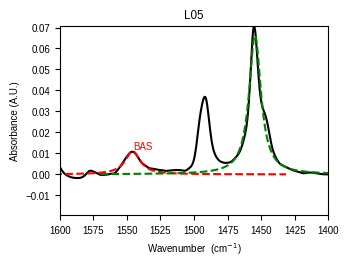

/tmp/ipykernel_4914/3734834025.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


adjusting mass for coverage
The BAS_Py_SR density of L06 is 50 µmol/g
The LAS_Py_SR density of L06 is 72 µmol/g


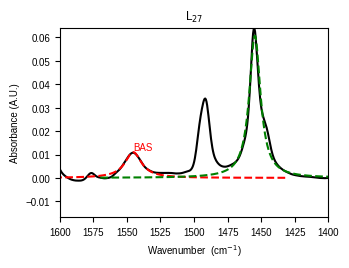

/tmp/ipykernel_4914/3734834025.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The BAS_Py_SR density of M01 is 48 µmol/g
The LAS_Py_SR density of M01 is 103 µmol/g


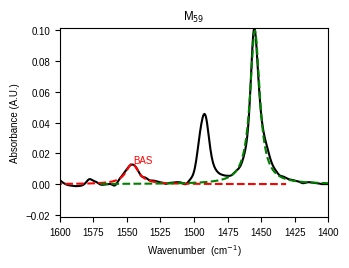

/tmp/ipykernel_4914/3734834025.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The BAS_Py_SR density of M02 is 83 µmol/g
The LAS_Py_SR density of M02 is 146 µmol/g


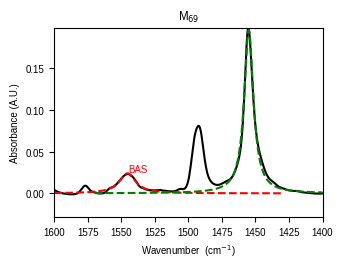

/tmp/ipykernel_4914/3734834025.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The BAS_Py_SR density of M03 is 42 µmol/g
The LAS_Py_SR density of M03 is 57 µmol/g


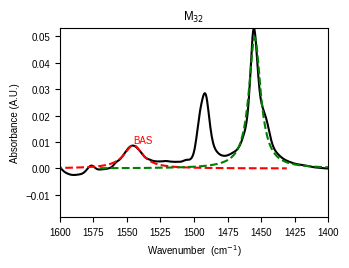

/tmp/ipykernel_4914/3734834025.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


adjusting mass for coverage
The BAS_Py_SR density of S01 is 96 µmol/g
The LAS_Py_SR density of S01 is 145 µmol/g


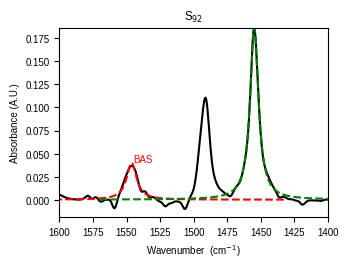

/tmp/ipykernel_4914/3734834025.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


adjusting mass for coverage
The BAS_Py_SR density of S04 is 49 µmol/g
The LAS_Py_SR density of S04 is 55 µmol/g


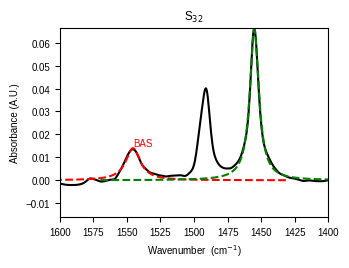

In [42]:
data_dir_py = data_dir + '/spectroscopy/Pyridine/'

experiments = os.listdir(data_dir_py)
selector = [0,1,2,3,4,5,6,7,8,9,10,11,12]
dosed_spectra_pyridine = []
plot_spectrum = True
rerun_TPD = False # Reruns the TPD analysis, takes significantly longer
plot_spectrum_full = False #plots the whole spectral range
for i in selector:
    ### Loading of data----------------------------
    exp_name = experiments[i]
    exp_path = data_dir_py +'/'+ exp_name + '/'
    #the log file is a labview logfile containing most importantly the temperature over the course of the experiment
    log = ir.parse_log(exp_path)

    #the data file is a omnic .spg file containing all the spectra of the experiment. Spectra are recorded in single channel mode
    files = os.listdir(exp_path+"/spectra_all/")
    data_file = exp_path+"/spectra_all/"+ files[0]
    background = read(glob.glob(exp_path +'/background'+ '/*.SPA')[0])
    scp_ar = read(data_file)
    scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))

    wavenumbers = scp_ar.x
    timestamps = pd.to_datetime(scp_ar.y, unit='s', origin='unix').tz_localize('UTC').tz_convert('Europe/Amsterdam')

    indices = np.searchsorted(log['DateTime'], timestamps, side='left')
    indices = np.clip(indices, 0, len(log['DateTime'])-1)
    temp_spec = np.array(log['OvenTemperature'][indices].reset_index(drop=True))

    data_array = xr.DataArray(
        scp_ar_bg.data,
        dims=['time', 'wavenumber'],
        coords={
            'time': timestamps,
            'wavenumber': wavenumbers,
            'temperature': ('time', temp_spec)
        }
    )[::-1]
    del scp_ar

    #the background is aquired before the actual experiment to allow to look at spectra without the zeolite already substracted

    index_lib = ir.get_indices(exp_path,exp_name,save_indices=False,print_indices = False) #looks up a file that contains 'indices' and returns a library with the indices therein
    #the experiment is split into multiple stages using a list of idices.
    #for determination of the indices, plot the absorption at e.g. 1545 cm-1 and the tempearture as a function of the index of the spectra
    #baseline (aquired during cooling down after drying), dosing, desorption, and drying
    data_array_bl, data_array_dose, data_array_desorb, data_array_dry = ir.split_experiment(data_array,index_lib)

    ### Baseline correction----------------------------
    # the spectra of the zeolite at the appropriate temperature are substracted for dosing and desorption spectra
    data_array_dose_corr = ir.baseline_substract(data_array_bl,data_array_dose)
    data_array_desorb_corr = ir.baseline_substract(data_array_bl,data_array_desorb)

    if plot_spectrum_full: # plotting of the individual spectra
        fig, ax = plt.subplots(figsize=(3.3,3.3/np.sqrt(2)))
        ax.plot(wavenumbers, data_array_dose_corr[-1].values, c='C0')
        ax.set_xlabel('Wavenumbers (cm$^{-1}$)')
        ax.set_ylabel('Absorbance (A.U.)')
        ax.set_xlim(4000,1400)
        maximum = max(ir.get_slice(data_array_dose_corr[-1],4000,1400).values)
        minimum = min(ir.get_slice(data_array_dose_corr[-1],4000,1400).values)
        ax.set_ylim(minimum, maximum)

        peakpos_other = [[2918,' '],[1538,'BAS'],[1457,'LAS'],[3741,'Si-OH'],[3625, 'O-H$_{HF}$'],[3560, 'O-H$_{LF}$'] ]#
        for i in range(len(peakpos_other)):
            ax.axvline(peakpos_other[i][0], c='k', linestyle='--',alpha=0.3)
            ax.annotate(peakpos_other[i][1], (peakpos_other[i][0]-20,maximum*0.75),rotation=90, va='bottom', ha='center',fontsize=7)


        ax.tick_params(direction='out')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')


    peak_names = ['BAS_Py_SR','LAS_Py_SR']
    extinction_coefficients = [0.56,1.46] #taken from Pieta, I. S., Ishaq, M., Wells, R. P. K. & Anderson, J. A. Quantitative determination of acid sites on silica–alumina. Appl. Catal. Gen. 390, 127–134 (2010)
    colors = ['r','g']
    peak_pos = [1545.0,1455.0]
    pelett_diameter = 13 #mm
    spectrum = data_array_dose_corr[-1] # the last spectrum of the desing part is used in the quantification

    #determining mass of the pellet
    tga_file = glob.glob(exp_path + '/tga//*.txt')[0]
    tga_instance = tga.parse_txt(tga_file,exp_type = 'general',calculate_DTGA = False)
    mass_zeolite_dry = tga_instance.get_stage('stage2')['Unsubtracted weight'].min()
    metafile = pd.read_csv(glob.glob(exp_path + '/meta.txt')[0])
    mass_zeolite_dry = mass_zeolite_dry/metafile['coverage'][0] # for imperfect pellets, the mass is adjusted
    if metafile['coverage'][0]!=1:
        print('adjusting mass for coverage')


    data = spectrum.sel(wavenumber=slice(2000,1400))
    data_bl_corr = ir.linear_bl_corr(data, start = 1564, end =1400)
    if plot_spectrum:
        fig, ax = plt.subplots()
        ax.plot(data_bl_corr.wavenumber, data_bl_corr,c='black')
        ax.set_ylim(min(data_bl_corr),max(data_bl_corr))
        ax.set_xlim(1600,1400)
        ax.set_xlabel('Wavenumber  (cm$^{-1}$)')
        ax.set_ylabel('Absorbance (A.U.)')

    for j in range(len(peak_names)):
        area_peak, peak_intensity,fitcurve = ir.fit_integrate_peak(data_bl_corr, peak_pos[j], 25, 15, 'lorentzian', plot='multi')
        xdata,ydata =fitcurve.get_data()
        if plot_spectrum:
            ax.plot(xdata,ydata,c=colors[j],linestyle='--')
            ax.annotate(peak_names[j][0:3],(peak_pos[j],peak_intensity*1.1),color=colors[j],)


        acid_site_density = area_peak*np.pi*(pelett_diameter/10/2)**2/extinction_coefficients[j]/mass_zeolite_dry*1000 #in µmol/g
        #writing to DB
        catname = exp_name.split('_')[-1][0:3]
        dbq.write_db(catname,peak_names[j],acid_site_density)
        print('The '+peak_names[j]+' density of '+catname+' is '+str(int(np.round(acid_site_density)))+' µmol/g')
    if plot_spectrum:
        try:
            plt.title(dbq.make_name(catname))
        except:
            plt.title(catname)
        plt.show()

    # TPD processing
    if rerun_TPD:
        #BAS
        tpd_frame = ir.get_tpd_BAS(data_array_desorb_corr,mass_zeolite_dry,peakwindow=10,fitwindow=15,peakloc=1545.0,bl_start = 1564, bl_end = 1400,maxwidth=15)
        tpd_frame.to_csv(exp_path+catname+'_py_BAS_TPD.csv')
        #LAS
        tpd_LAS = ir.get_tpd_BAS(data_array_desorb_corr,mass_zeolite_dry,peakwindow=10,fitwindow=15,peakloc=1455.0,bl_start = 1564, bl_end = 1400,maxwidth=15)
        tpd_LAS.to_csv(exp_path+catname+'_py_LAS_TPD.csv')

    #saving the dosed spectrum
    dosed_spectrum_frame = pd.DataFrame({'wavenumber':spectrum.wavenumber.values,'absorbance':spectrum.values, 'absorbance_byweight':spectrum.values/mass_zeolite_dry})
    dosed_spectrum_frame.to_csv(exp_path+catname +'_py_dosed_spectrum_'+'.csv')

    # dosed_spectra_pyridine.append([catname, spectrum/mass_zeolite_dry])


    if rerun_TPD:
        tpd_frame.plot(x='temperature',y='integral_byweight',label='BAS')
        tpd_LAS.plot(x='temperature',y='integral_byweight',label='LAS')
        plt.show()

#### TTBP

/tmp/ipykernel_4914/2708501542.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The TTBP_IR_BAS (umol/gram) density of F04 is 37.38467773478587 µmol/g


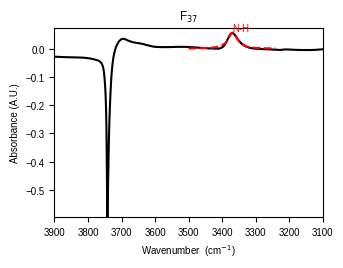

/tmp/ipykernel_4914/2708501542.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The TTBP_IR_BAS (umol/gram) density of F05 is 70.50412888723119 µmol/g


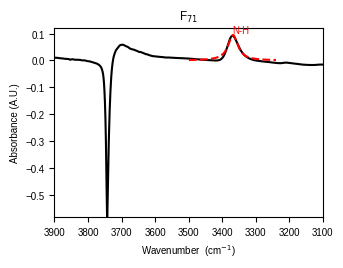

/tmp/ipykernel_4914/2708501542.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The TTBP_IR_BAS (umol/gram) density of F06 is 50.12424719737592 µmol/g


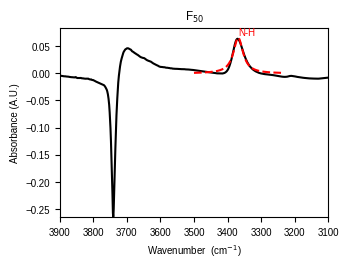

/tmp/ipykernel_4914/2708501542.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The TTBP_IR_BAS (umol/gram) density of H03 is 60.00016526743017 µmol/g


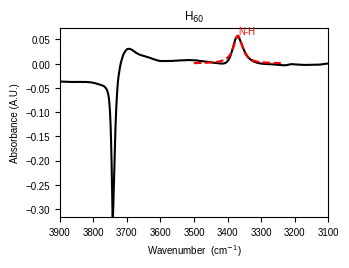

/tmp/ipykernel_4914/2708501542.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The TTBP_IR_BAS (umol/gram) density of H04 is 30.897202853164853 µmol/g


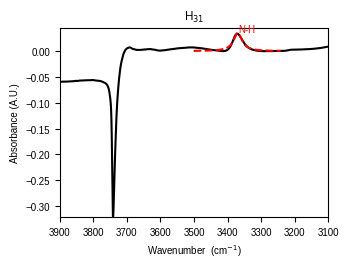

/tmp/ipykernel_4914/2708501542.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The TTBP_IR_BAS (umol/gram) density of L01 is 46.20743261102516 µmol/g


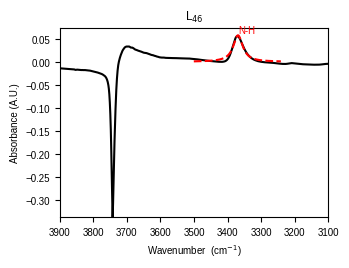

/tmp/ipykernel_4914/2708501542.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The TTBP_IR_BAS (umol/gram) density of L04 is 44.423116806505156 µmol/g


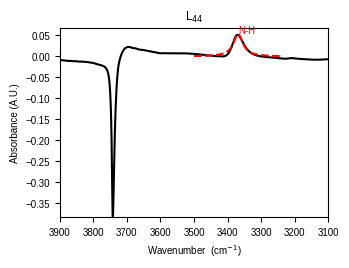

/tmp/ipykernel_4914/2708501542.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The TTBP_IR_BAS (umol/gram) density of L06 is 26.586296106360486 µmol/g


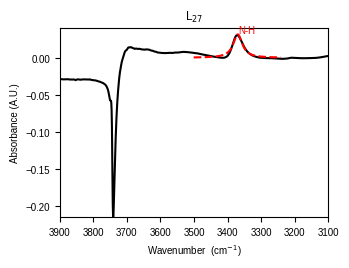

/tmp/ipykernel_4914/2708501542.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The TTBP_IR_BAS (umol/gram) density of M01 is 59.28783656809725 µmol/g


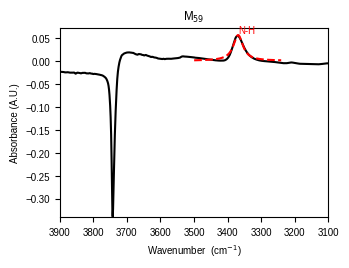

/tmp/ipykernel_4914/2708501542.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The TTBP_IR_BAS (umol/gram) density of M02 is 69.40598666262622 µmol/g


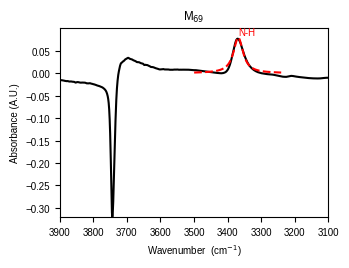

/tmp/ipykernel_4914/2708501542.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The TTBP_IR_BAS (umol/gram) density of M03 is 32.11140368534657 µmol/g


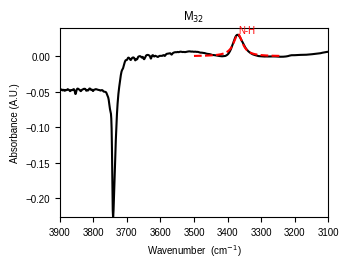

/tmp/ipykernel_4914/2708501542.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


The TTBP_IR_BAS (umol/gram) density of S01 is 91.95534203175603 µmol/g


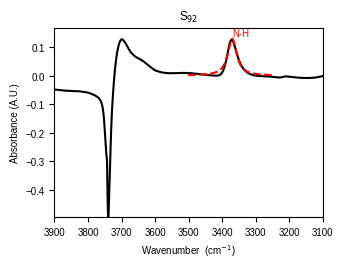

/tmp/ipykernel_4914/2708501542.py:21: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


adjusting mass for coverage
The TTBP_IR_BAS (umol/gram) density of S04 is 32.25635539960874 µmol/g


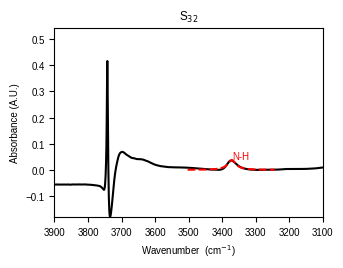

In [43]:
data_dir_TTBP = data_dir + '/spectroscopy/TTBP/'

experiments = os.listdir(data_dir_TTBP)
selector = [0,1,2,3,4,5,6,7,8,9,10,11,12]
dosed_spectra_pyridine = []
plot_spectrum = True
rerun_TPD = False # Reruns the TPD analysis, takes significantly longer
plot_spectrum_full = False #plots the whole spectral range
for i in selector:
    ### Loading of data----------------------------
    exp_name = experiments[i]
    exp_path = data_dir_TTBP +'/'+ exp_name + '/'
    #the log file is a labview logfile containing most importantly the temperature over the course of the experiment
    log = ir.parse_log(exp_path)

    #the data file is a omnic .spg file containing all the spectra of the experiment. Spectra are recorded in single channel mode
    files = os.listdir(exp_path+"/spectra_all/")
    data_file = exp_path+"/spectra_all/"+ files[0]
    background = read(glob.glob(exp_path +'/background'+ '/*.SPA')[0])
    scp_ar = read(data_file)
    scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))

    wavenumbers = scp_ar.x
    timestamps = pd.to_datetime(scp_ar.y, unit='s', origin='unix').tz_localize('UTC').tz_convert('Europe/Amsterdam')

    indices = np.searchsorted(log['DateTime'], timestamps, side='left')
    indices = np.clip(indices, 0, len(log['DateTime'])-1)
    temp_spec = np.array(log['OvenTemperature'][indices].reset_index(drop=True))

    data_array = xr.DataArray(
        scp_ar_bg.data,
        dims=['time', 'wavenumber'],
        coords={
            'time': timestamps,
            'wavenumber': wavenumbers,
            'temperature': ('time', temp_spec)
        }
    )[::-1]
    del scp_ar

    #the background is aquired before the actual experiment to allow to look at spectra without the zeolite already substracted

    index_lib = ir.get_indices(exp_path,exp_name,save_indices=False,print_indices = False) #looks up a file that contains 'indices' and returns a library with the indices therein
    #the experiment is split into multiple stages using a list of idices.
    #for determination of the indices, plot the absorption at e.g. 1545 cm-1 and the tempearture as a function of the index of the spectra
    #baseline (aquired during cooling down after drying), dosing, desorption, and drying
    data_array_bl, data_array_dose, data_array_desorb, data_array_dry = ir.split_experiment(data_array,index_lib)

    ### Baseline correction----------------------------
    # the spectra of the zeolite at the approriate temperature are substracted for dosing and desorption spectra
    data_array_dose_corr = ir.baseline_substract(data_array_bl,data_array_dose)
    data_array_desorb_corr = ir.baseline_substract(data_array_bl,data_array_desorb)

    if plot_spectrum_full: # plotting of the infividual spectra
        fig, ax = plt.subplots(figsize=(3.3,3.3/np.sqrt(2)))
        ax.plot(wavenumbers, data_array_dose_corr[-1].values, c='C0')
        ax.set_xlabel('Wavenumbers (cm$^{-1}$)')
        ax.set_ylabel('Absorbance (A.U.)')
        ax.set_xlim(4000,1400)
        maximum = max(ir.get_slice(data_array_dose_corr[-1],4000,1400).values)
        minimum = min(ir.get_slice(data_array_dose_corr[-1],4000,1400).values)
        ax.set_ylim(minimum, maximum)

        peakpos_other = [[3369,'N-H'],[1613,'BAS'],[3741,'Si-OH']]#
        for i in range(len(peakpos_other)):
            ax.axvline(peakpos_other[i][0], c='k', linestyle='--',alpha=0.3)
            ax.annotate(peakpos_other[i][1], (peakpos_other[i][0]-20,maximum*0.75),rotation=90, va='bottom', ha='center',fontsize=7)


        ax.tick_params(direction='out')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        # plt.title(dbq.get_catname(catname))


    ### Quantification----------------------------

    peak_names = ['TTBP_IR_BAS (umol/gram)']
    extinction_coefficients = [5.74] #taken from 10.1016/j.jcat.2020.03.003
    colors = ['r']
    peak_pos = [3369]
    pelett_diameter = 13 #mm
    spectrum = data_array_dose_corr[-1] # the last spectrum of the desing part is used in the quantification

    #determining mass of the pelett
    tga_file = glob.glob(exp_path + '/tga//*.txt')[0]
    tga_instance = tga.parse_txt(tga_file,exp_type = 'general',calculate_DTGA = False)
    mass_zeolite_dry = tga_instance.get_stage('stage2')['Unsubtracted weight'].min()
    metafile = pd.read_csv(glob.glob(exp_path + '/meta.txt')[0])
    mass_zeolite_dry = mass_zeolite_dry/metafile['coverage'][0]
    if metafile['coverage'][0]!=1:
        print('adjusting mass for coverage')



    data = spectrum.sel(wavenumber=slice(3900,3100))
    data_mincorr = data - data.sel(wavenumber=slice(3450,3300)).min()
    data_bl_corr = ir.linear_bl_corr(data, start = 3415.0, end = 3300.0)

    if plot_spectrum:
        fig, ax = plt.subplots()
        ax.plot(data_bl_corr.wavenumber, data_bl_corr,c='black')
        ax.set_ylim(min(data_bl_corr),max(data_bl_corr)*1.3)
        ax.set_xlim(3900,3100)
        ax.set_xlabel('Wavenumber  (cm$^{-1}$)')
        ax.set_ylabel('Absorbance (A.U.)')
    for j in range(len(peak_names)):
        area_peak, peak_intensity,fitcurve = ir.fit_integrate_peak(data_bl_corr, peak_pos[j], 50, 30, 'lorentzian', plot='multi')
        xdata,ydata =fitcurve.get_data()
        if plot_spectrum:
            ax.plot(xdata,ydata,c=colors[j],linestyle='--')
            ax.annotate('N-H',(peak_pos[j],peak_intensity*1.1),color=colors[j],)

        acid_site_density = area_peak*np.pi*(pelett_diameter/10/2)**2/extinction_coefficients[j]/mass_zeolite_dry*1000 #in µmol/g
        #writing to DB
        catname = exp_name.split('_')[-1][0:3]
        dbq.write_db(catname,peak_names[j],acid_site_density)
        print('The '+peak_names[j]+' density of '+catname+' is '+str(acid_site_density)+' µmol/g')

    if plot_spectrum:
        try:
            plt.title(dbq.make_name(catname))
        except:
            plt.title(catname)
        plt.show()


    #TPD processing
    if rerun_TPD:
        #BAS
        tpd_frame = ir.get_tpd_BAS(data_array_desorb_corr,mass_zeolite_dry,peakwindow=10,fitwindow=30,peakloc=3370.0,bl_start = 3415.0, bl_end = 3300.0,maxwidth=30,maxtemp=data_array_desorb_corr.temperature.values.max())
        tpd_frame.to_csv(exp_path+catname+'_TTBP_BAS_TPD.csv')
        tpd_frame.plot(x='temperature',y='integral_byweight',label='BAS')

    #saving the dosed spectrum
    dosed_spectrum_frame = pd.DataFrame({'wavenumber':spectrum.wavenumber.values,'absorbance':spectrum.values, 'absorbance_byweight':spectrum.values/mass_zeolite_dry})
    dosed_spectrum_frame.to_csv(exp_path+catname +'_TTBP_dosed_spectrum_'+'.csv')

    dosed_spectra_pyridine.append([catname, spectrum/mass_zeolite_dry])



    # tpd_LAS.plot(x='temperature',y='integral_byweight',label='LAS')
    plt.show()

#### Fig. S1: Infrared (IR) spectra of three amorphous silica-alumina (ASA) materials, as derived from fumed silica F

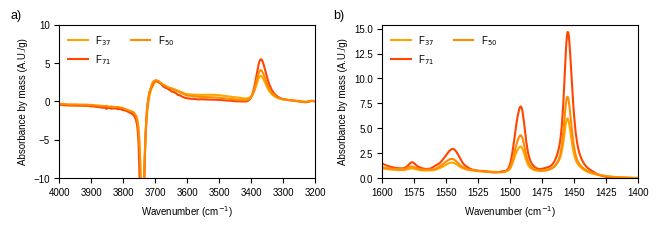

In [44]:
experiments = ['F04', 'F05', 'F06']
# experiments = ['F04', 'F05', 'F06']
utils.set_plot_defaults()
fig, axs = plt.subplots(1,2,figsize=(3.3*2,3.3/np.sqrt(2)))
db = dbq.get_db()
#TTBP
ax=axs[0]
for i in range(len(experiments)):
    exp_name = experiments[i]
    catname = exp_name
    color = db['color'].loc[exp_name]
    if type(color) != str:
        color = 'grey'
    data_dir_py = data_dir_py = data_dir + '/spectroscopy/TTBP/'
    dosed_spectrum = pd.read_csv(data_dir_py+catname+'/'+exp_name+'_TTBP_dosed_spectrum_.csv')
    dosed_spectrum = dosed_spectrum[dosed_spectrum['wavenumber']>3200]
    ax.plot(dosed_spectrum['wavenumber'],(dosed_spectrum['absorbance_byweight']-dosed_spectrum['absorbance_byweight'].iloc[-1])*1000,label=dbq.make_name(catname), color = color)
ax.legend(ncol=2,frameon=False)
ax.set_xlim(4000,3200)
ax.set_ylim(-10,10)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_ylabel('Absorbance by mass (A.U./g)')
#Pyridine
ax=axs[1]
for i in range(len(experiments)):
    exp_name = experiments[i]
    catname = exp_name
    color = db['color'].loc[exp_name]
    if type(color) != str:
        color = 'grey'
    data_dir_py = data_dir_py = data_dir + '/spectroscopy/Pyridine/'
    dosed_spectrum = pd.read_csv(data_dir_py+catname+'/'+exp_name+'_Py_dosed_spectrum_.csv')
    dosed_spectrum = dosed_spectrum[(dosed_spectrum['wavenumber']<1600 ) & (dosed_spectrum['wavenumber']>1400)]
    ax.plot(dosed_spectrum['wavenumber'],(dosed_spectrum['absorbance_byweight']-dosed_spectrum['absorbance_byweight'].iloc[-1])*1000,label=dbq.make_name(catname), color = color)
ax.legend(ncol=2,frameon=False)
ax.set_xlim(1600,1400)
# ax.set_ylim(-10,10)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_ylabel('Absorbance by mass (A.U./g)')
ax.legend(ncol=2,frameon=False)
# ax.set_xlim(150,500)
ax.set_ylim(0,)

#annotate with a and b
axs[0].text(-0.15, 1.1, 'a)', transform=axs[0].transAxes, fontsize=9, va='top', ha='right')
axs[1].text(-0.15, 1.1, 'b)', transform=axs[1].transAxes, fontsize=9, va='top', ha='right')
plt.tight_layout()
plt.savefig(plotdir_SI+'/TTBP_Py_justFumed_dosed.svg')
plt.show()

### TGA pre-processing (code)

Plastic cracking activity was measured by ramped thermogravimetric analysis (TGA) of plastic-catalyst mixtures, as shown in previous works from our research group.<sup>5,9</sup> In short, varying amounts of catalyst material (0.7-10 mg, sieved to <150 µm) were added to a TGA crucible. 5 mg of polymer was added on top. The same batch of PP was used as in our prior study<sup>5</sup> (Mw = 23,100 g/mol, determined by high temperature size exclusion chromatography (SEC), see Fig. S18b, Melting point of 152 °C determined by differential scanning calorimetry (DSC) at 5 °C/min, see Fig. S18a, Sigma-Aldrich, Product No. 378116, ball-milled to a powder under a N2 atmosphere for easier weigh-in). The reader is advised that in our experience the molecular weight of this product varies between batches and is in general significantly higher than labeled. In control experiments, a second PP sample (labeled PP2, Sanyo-Chemical V330P, Mw = 32,500 g/mol,  characterized in prior work<sup>9</sup>) was used.
The sample was heated to 130 °C at 10 °C/min and held for 20 min. Consecutively, the temperature was increased to 600 °C at 10 °C/min. The sample was then cooled to 50 °C, and coke deposits were subsequently burned off under O2 atmosphere heating to 800 °C at 20 °C/min. Exact polymer and catalyst loadings were determined from the TGA data. In control experiments, a temperature of 20 °C/min was utilized in the cracking step. The pyTGA library<sup>10</sup> was used for processing of TGA data.


#### TGA at 10 °C/min with PP1 (Fig. S2)

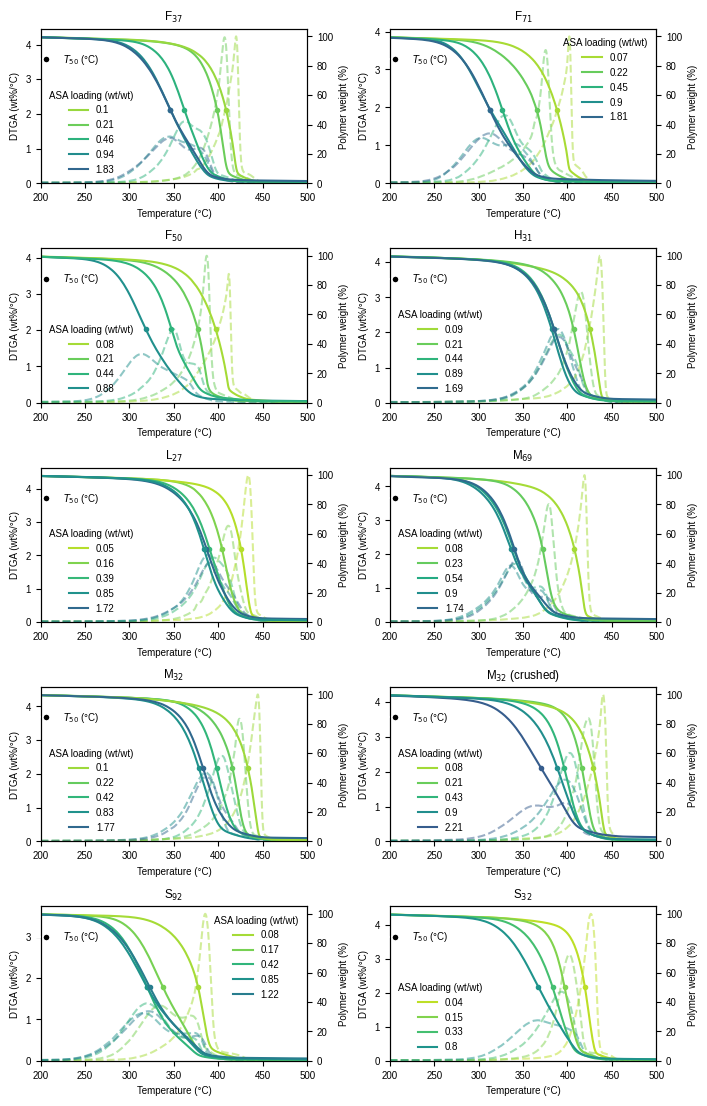

In [45]:
# Fig. S2
TGA_raw_home = os.path.join(data_dir, 'TGA', 'TGA_raw')
output_directory = os.path.join('Results', 'TGA', 'TGA_csv')
experiment_list = os.listdir(TGA_raw_home)

figSI, axSI = plt.subplots(5,2,figsize=(18/2.54,28.125/2.54))
axSI2_list = []
for i in range(10):
    axSI2_list.append(axSI[i//2,(i+2)%2].twinx())

for exp in enumerate(experiment_list):
    exp_name = exp[1]
    exp_directory = os.path.join(TGA_raw_home,exp_name)
    TGA_files = [os.path.join(exp_directory, file) for file in os.listdir(exp_directory) if file.endswith('.txt')]
    Results = []
    ax = axSI[exp[0]//2,(exp[0]+2)%2]
    ax2 = axSI2_list[exp[0]]
    for file in TGA_files:
        tga_exp = tga.parse_txt(file,exp_type = 'pyro',calculate_DTGA=True) # parses a ASCII TGA output file with multiple stages
        tga_exp.Tmax =tga.calc_Tmax(tga_exp.cracking()) #Tmax is the temperature of fastest decomposition rate
        tga_exp.T50 =tga.calc_T50(tga_exp.cracking()) # Temperature at which 50% of the plastic is converted to gas
        experiment_results = [os.path.basename(file),tga_exp.m_poly(),tga_exp.m_cat(),tga_exp.coke_yield(),tga_exp.P_C_ratio(),tga_exp.Tmax,tga_exp.T50]
        Results.append(experiment_results)

        #plotting for one of the filesrr
        def plot_TGA_profiles(tga_exp,ax,ax2):
            plot_cl =tga.get_color(tga_exp.pct_loss())
            ax.plot(tga_exp.cracking()['Sample Temp.'],tga_exp.cracking()['DTGA_pwl']*100,'--',color=plot_cl,alpha=0.5)
            ax2.plot(tga_exp.cracking()['Sample Temp.'],tga_exp.cracking()['rel_weight_pwl']*100,color=plot_cl,label = np.round(1/tga_exp.P_C_ratio(),2))
            ax2.plot(tga_exp.T50,50,'o',color=plot_cl, markersize=3)

        plot_TGA_profiles(tga_exp,ax,ax2)


        Result_Frame = pd.DataFrame(Results,columns = ['Filename','m_polymer','m_cat','coke_yield','P/C ratio','Tmax','T50'])
        Result_Frame.to_csv(os.path.join(output_directory,'Results_'+exp[1]+'.csv'))


    axSI[exp[0]//2,(exp[0]+2)%2].set_title(dbq.make_name(exp[1],db))

    ax2.legend(title='Cat laoding (%)',frameon=False, loc= 'lower left')

    ax.set_xlabel('Temperature (°C)')
    ax2.set_ylabel('Polymer weight (%)')
    ax.set_ylabel('DTGA (wt%/°C)')
    # ax.legend(frameon=False)

    # add a cusotm leegnd with just a o marker and the label T50
    custom_lines = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=5)]
    ax.legend(custom_lines, ['$T_{50}$ (°C)'], frameon=False, loc = 'lower left', bbox_to_anchor=(-0.05,0.7))

    #sort the legend items by the P/C ratio
    handles, labels = ax2.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: float(t[0])))
    ax2.legend(handles, labels, title='ASA loading (wt/wt)',frameon=False, )

    ax2.set_xlim(200,500)
    ax.set_ylim(0,)
    ax2.set_ylim(0,)

plt.tight_layout()
plt.savefig(os.path.join(plotdir_SI, 'TGA_all.svg'), transparent=True)
plt.show()

#### TGA at 20 °C/min with PP1 (Fig. S15)

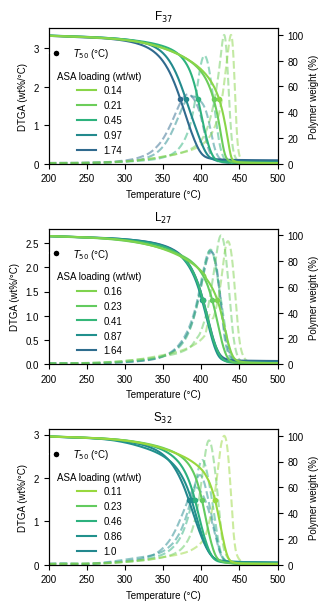

In [46]:
TGA_raw_home = os.path.join(data_dir, 'TGA', 'TGA_raw_20C')
output_directory_20 = os.path.join('Results', 'TGA', 'TGA_csv_20C')
experiment_list = os.listdir(TGA_raw_home)


figSI, axSI = plt.subplots(3,1,figsize=(3.3,3.3/1.618*3))
axSI2_list = []
for i in range(3):
    axSI2_list.append(axSI[i].twinx())

for exp in enumerate(experiment_list):
    exp_name = exp[1]
    exp_directory = os.path.join(TGA_raw_home,exp_name)
    TGA_files = [os.path.join(exp_directory, file) for file in os.listdir(exp_directory) if file.endswith('.txt')]
    Results = []
    ax = axSI[exp[0]]
    ax2 = axSI2_list[exp[0]]
    for file in TGA_files:
        tga_exp = tga.parse_txt(file,exp_type = 'pyro',calculate_DTGA=True) # parses a ASCII TGA output file with multiple stages
        tga_exp.Tmax =tga.calc_Tmax_exp(tga_exp,stage='cracking') #Tmax is the temperature of fastest decomposition rate
        tga_exp.T50 =tga.calc_T50(tga_exp.cracking()) # Temperature at which 50% of the plastic is converted to gas
        experiment_results = [os.path.basename(file),tga_exp.m_poly(),tga_exp.m_cat(),tga_exp.coke_yield(),tga_exp.P_C_ratio(),tga_exp.Tmax,tga_exp.T50]
        Results.append(experiment_results)

        #plotting for one of the filesrr
        def plot_TGA_profiles(tga_exp,ax,ax2):
            plot_cl =tga.get_color(tga_exp.pct_loss())
            ax.plot(tga_exp.cracking()['Sample Temp.'],tga_exp.cracking()['DTGA_pwl']*100,'--',color=plot_cl,alpha=0.5)
            ax2.plot(tga_exp.cracking()['Sample Temp.'],tga_exp.cracking()['rel_weight_pwl']*100,color=plot_cl,label = np.round(1/tga_exp.P_C_ratio(),2))
            ax2.plot(tga_exp.T50,50,'o',color=plot_cl, markersize=3)

        plot_TGA_profiles(tga_exp,ax,ax2)


        Result_Frame = pd.DataFrame(Results,columns = ['Filename','m_polymer','m_cat','coke_yield','P/C ratio','Tmax','T50'])
        Result_Frame.to_csv(os.path.join(output_directory_20,'Results_'+exp[1]+'.csv'))


    axSI[exp[0]].set_title(dbq.make_name(exp[1],db))

    ax2.legend(title='Cat laoding (%)',frameon=False)

    ax.set_xlabel('Temperature (°C)')
    ax2.set_ylabel('Polymer weight (%)')
    ax.set_ylabel('DTGA (wt%/°C)')
    # ax.legend(frameon=False)

    # add a cusotm leegnd with just a o marker and the label T50
    custom_lines = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=5)]
    ax.legend(custom_lines, ['$T_{50}$ (°C)'], frameon=False, loc = 'lower left', bbox_to_anchor=(-0.05,0.7))

    #sort the legend items by the P/C ratio
    handles, labels = ax2.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: float(t[0])))
    ax2.legend(handles, labels, title='ASA loading (wt/wt)',frameon=False)

    ax2.set_xlim(200,500)
    ax.set_ylim(0,)
    ax2.set_ylim(0,)

plt.tight_layout()
plt.savefig(os.path.join(plotdir_SI, 'TGA_all_20C.svg'), transparent=True)
plt.show()

#### TGA at 10 °C/min with PP2 (Fig. S16)

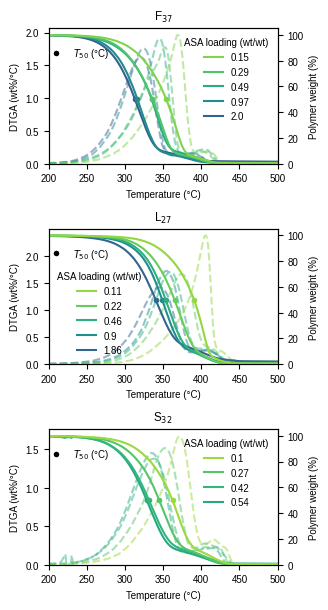

In [47]:
TGA_raw_home = os.path.join(data_dir, 'TGA', 'TGA_raw_PP2')
output_directory_2 = os.path.join('Results', 'TGA', 'TGA_csv_PP2')
experiment_list = os.listdir(TGA_raw_home)


figSI, axSI = plt.subplots(3,1,figsize=(3.3,3.3/1.618*3))
axSI2_list = []
for i in range(3):
    axSI2_list.append(axSI[i].twinx())

for exp in enumerate(experiment_list):
    exp_name = exp[1]
    exp_directory = os.path.join(TGA_raw_home,exp_name)
    TGA_files = [os.path.join(exp_directory, file) for file in os.listdir(exp_directory) if file.endswith('.txt')]
    Results = []
    ax = axSI[exp[0]]
    ax2 = axSI2_list[exp[0]]
    for file in TGA_files:
        tga_exp = tga.parse_txt(file,exp_type = 'pyro',calculate_DTGA=True) # parses a ASCII TGA output file with multiple stages
        tga_exp.Tmax =tga.calc_Tmax_exp(tga_exp,stage='cracking') #Tmax is the temperature of fastest decomposition rate
        tga_exp.T50 =tga.calc_T50(tga_exp.cracking()) # Temperature at which 50% of the plastic is converted to gas
        experiment_results = [os.path.basename(file),tga_exp.m_poly(),tga_exp.m_cat(),tga_exp.coke_yield(),tga_exp.P_C_ratio(),tga_exp.Tmax,tga_exp.T50]
        Results.append(experiment_results)

        #plotting for one of the filesrr
        def plot_TGA_profiles(tga_exp,ax,ax2):
            plot_cl =tga.get_color(tga_exp.pct_loss())
            ax.plot(tga_exp.cracking()['Sample Temp.'],tga_exp.cracking()['DTGA_pwl']*100,'--',color=plot_cl,alpha=0.5)
            ax2.plot(tga_exp.cracking()['Sample Temp.'],tga_exp.cracking()['rel_weight_pwl']*100,color=plot_cl,label = np.round(1/tga_exp.P_C_ratio(),2))
            ax2.plot(tga_exp.T50,50,'o',color=plot_cl, markersize=3)

        plot_TGA_profiles(tga_exp,ax,ax2)


        Result_Frame = pd.DataFrame(Results,columns = ['Filename','m_polymer','m_cat','coke_yield','P/C ratio','Tmax','T50'])
        Result_Frame.to_csv(os.path.join(output_directory_2,'Results_'+exp[1]+'.csv'))


    axSI[exp[0]].set_title(dbq.make_name(exp[1],db))

    ax2.legend(title='Cat loading (%)',frameon=False)

    ax.set_xlabel('Temperature (°C)')
    ax2.set_ylabel('Polymer weight (%)')
    ax.set_ylabel('DTGA (wt%/°C)')
    # ax.legend(frameon=False)

    # add a custom legend with just a o marker and the label T50
    custom_lines = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=5)]
    ax.legend(custom_lines, ['$T_{50}$ (°C)'], frameon=False, loc = 'lower left', bbox_to_anchor=(-0.05,0.7))

    #sort the legend items by the P/C ratio
    handles, labels = ax2.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: float(t[0])))
    ax2.legend(handles, labels, title='ASA loading (wt/wt)',frameon=False)

    ax2.set_xlim(200,500)
    ax.set_ylim(0,)
    ax2.set_ylim(0,)

plt.tight_layout()
plt.savefig(os.path.join(plotdir_SI, 'TGA_all_PP2.svg'), transparent=True)
plt.show()

### Fig. 1 (code)

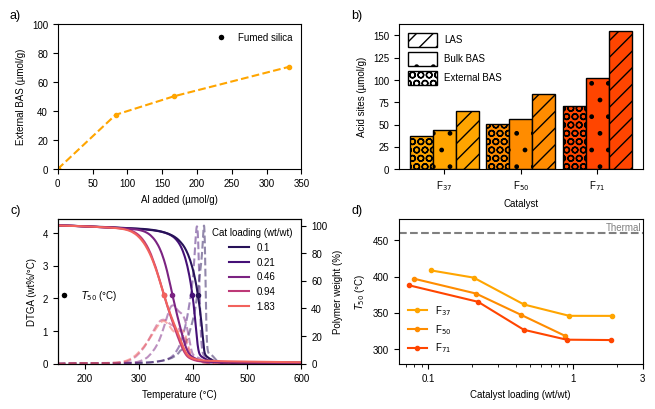

In [48]:
from matplotlib import patches as mpatches
from scipy.stats import linregress

fig, axs = plt.subplots(2,2, figsize=(3.25*2,3.25/1.625*2))

#1a)
ax = axs[0,0]

x= [0]
y = [0]

Cats_selected = ['F04','F06','F05']
# plotting all individaully
for cat in Cats_selected:
    # ax.plot(db['Al(NO3)3 added (umol/gram)'].loc[cat], db['Py_IR_BAS (umol/gram)'].loc[cat], 'o-', label=cat, color=db['color'].loc[cat],markersize=3)
    x.append(db['Al(NO3)3 added (umol/gram)'].loc[cat])

    y.append(db['TTBP_IR_BAS (umol/gram)'].loc[cat])
    # print(cat)
    # print(y)
    ax.plot(0,0,'o', color = '#FFA500',markersize=3)

slope, intercept, r_value, p_value, std_err = linregress(x, y,)
trendline = intercept + (np.array(x)*slope)
# ax.plot(x, trendline, '--', label='Trendline',color='#FFA500', alpha = 0.5)

#plotting together
ax.plot(x,y, 'o--', color = '#FFA500',markersize=3)





#custom legend: o = fumed silica
custom_lines = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black',markersize=5)]
ax.legend(custom_lines, ['Fumed silica'], frameon=False)

ax.set_xlabel('Al added (µmol/g)')
ax.set_ylabel('External BAS (µmol/g)')

ax.set_xlim(0,350)
ax.set_ylim(0,100)
#annotate with the slope
# ax.text(0.5,0.58,f'Slope = {np.round(slope,2)}',transform=ax.transAxes)
# ax.text(0.5,0.48,f'R$^2$ = {np.round(r_value**2,2)}',transform=ax.transAxes)
# plt.savefig(os.path.join(plotdir, 'Fumed_acid_site_scaling.svg'), transparent=True)

#1b)
w = 0.3
labels = Cats_selected
pivot = np.arange(len(labels))


LAS_bar = [p + w for p in pivot]
BAS_bar = [p for p in pivot]
t_BAS_bar = [p - w for p in pivot]
ax = axs[0,1]
for cat in enumerate(Cats_selected):
    color = db['color'].loc[cat[1]]
    ax.bar(t_BAS_bar[cat[0]], db['TTBP_IR_BAS (umol/gram)'].loc[cat[1]], width=w, label='External BAS', color=color,edgecolor='black', hatch='OO')

    ax.bar(BAS_bar[cat[0]], db['Py_IR_BAS (umol/gram)'].loc[cat[1]], width=w, label='Bulk BAS', color=color, hatch='.',edgecolor='black')

    ax.bar(LAS_bar[cat[0]], db['Py_IR_LAS (umol/gram)'].loc[cat[1]], width=w, label='LAS', color=color, hatch='//',edgecolor='black')

LAS_handle = mpatches.Patch(facecolor = 'white', label = 'LAS', edgecolor = 'k', hatch='//')
BAS_handle = mpatches.Patch(facecolor = 'white', label = 'Bulk BAS', edgecolor= 'k', hatch = '.')
t_BAS_handle = mpatches.Patch(facecolor = 'white', label = 'External BAS', edgecolor= 'k', hatch = 'OO')

ax.legend(handles = [LAS_handle, BAS_handle, t_BAS_handle], loc='upper left',frameon=False,handlelength=3, handleheight=3/1.618)
ax.set_xlabel('Catalyst')
ax.set_ylabel('Acid sites (µmol/g)')

ax.set_xticks(pivot,[dbq.make_name(cat,db) for cat in Cats_selected])





#1c)

TGA_raw_home = os.path.join(data_dir, 'TGA', 'TGA_raw')
output_directory = os.path.join('Results', 'TGA', 'TGA_csv')
selected = 'F04'

exp_directory = TGA_raw_home+'/'+selected
TGA_files = [os.path.join(exp_directory, file) for file in os.listdir(exp_directory) if file.endswith('.txt')]
ax = axs[1,0]
ax2 = ax.twinx()
Results = []
for file in TGA_files:
    tga_exp = tga.parse_txt(file,exp_type = 'pyro',calculate_DTGA=True) # parses a ASCII TGA output file with multiple stages
    tga_exp.Tmax =tga.calc_Tmax(tga_exp.cracking()) #Tmax is the temperature of fastest decomposition rate
    tga_exp.T50 =tga.calc_T50(tga_exp.cracking()) # Temperature at which 50% of the plastic is converted to gas
    experiment_results = [os.path.basename(file),tga_exp.m_poly(),tga_exp.m_cat(),tga_exp.coke_yield(),tga_exp.P_C_ratio(),tga_exp.Tmax,tga_exp.T50]
    Results.append(experiment_results)

    #plotting for one of the files
    def plot_TGA_profiles(tga_exp,ax,ax2):
        plot_cl =tga.get_color(tga_exp.pct_loss(),cmap='magma_r')
        ax.plot(tga_exp.cracking()['Sample Temp.'],tga_exp.cracking()['DTGA_pwl']*100,'--',color=plot_cl,alpha=0.5)
        ax2.plot(tga_exp.cracking()['Sample Temp.'],tga_exp.cracking()['rel_weight_pwl']*100,color=plot_cl,label = np.round(1/tga_exp.P_C_ratio(),2))
        ax2.plot(tga_exp.T50,50,'o',color=plot_cl, markersize=3)

    plot_TGA_profiles(tga_exp,ax,ax2)


    Result_Frame = pd.DataFrame(Results,columns = ['Filename','m_polymer','m_cat','coke_yield','P/C ratio','Tmax','T50'])
    Result_Frame.to_csv(os.path.join(output_directory,'Results_'+selected+'.csv'))

ax2.legend(title='Cat laoding (%)',frameon=False)

ax.set_xlabel('Temperature (°C)')
ax2.set_ylabel('Polymer weight (%)')
ax.set_ylabel('DTGA (wt%/°C)')
# ax.legend(frameon=False)

# add a cusotm leegnd with just a o marker and the label T50
custom_lines = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=5)]
ax.legend(custom_lines, ['$T_{50}$ (°C)'], frameon=False, loc = 'lower left', bbox_to_anchor=(-0.05,0.36))

#sort the legend items by the P/C ratio
handles, labels = ax2.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: float(t[0])))
ax2.legend(handles, labels, title='Cat loading (wt/wt)',frameon=False)

ax2.set_xlim(150,600)
ax.set_ylim(0,)
ax2.set_ylim(0,)

# plt.savefig(os.path.join(plotdir, 'F06_weightloss.svg'), transparent=True)



#1d)

csv_files = ['F04', 'F06', 'F05']
TGA_csvs = ['Results_'+ name+ '.csv' for name in csv_files]
ax1 = axs[1,1]

for i in range(len(TGA_csvs)):
    result_frame = pd.read_csv(output_directory + '/' + TGA_csvs[i])
    result_frame = result_frame.sort_values(by='P/C ratio')
    run = TGA_csvs[i].split('.')[0][-1]
    cat = dbq.get_cat(TGA_csvs[i])
    color = db['color'].loc[cat]
    ax1.plot(1/result_frame['P/C ratio'],result_frame['T50'],'o-',markersize=3, color=color,label=dbq.make_name(cat,db))

#add a horizontal line at 460
ax1.axhline(460, color='black', linestyle='--', alpha=0.5)
#annotate with 'thermal'
ax1.text(0.85,0.915,'Thermal',transform=ax1.transAxes, color='black', alpha=0.5)


ax1.set_xscale('log')
ax1.set_ylim(280,480)
ticks1 = [0.1,1,3]
ax1.legend(frameon=False)

ax1.set_xticks(ticks1)
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.set_xticklabels([str(x) for x in ticks1])
ax1.set_xlabel('Catalyst loading (wt/wt)')
ax1.set_ylabel('$T_{50}$ (°C)')

#add labels a,b,c

plt.tight_layout()


axs[0,0].text(-0.15, 1.1, 'a)', transform=axs[0,0].transAxes, fontsize=9, va='top', ha='right')
axs[1,0].text(-0.15, 1.1, 'c)', transform=axs[1,0].transAxes, fontsize=9, va='top', ha='right')
axs[0,1].text(-0.15, 1.1, 'b)', transform=axs[0,1].transAxes, fontsize=9, va='top', ha='right')
axs[1,1].text(-0.15, 1.1, 'd)', transform=axs[1,1].transAxes, fontsize=9, va='top', ha='right')

plt.savefig(os.path.join(plotdir, 'Figure1_complete.svg'), transparent=True)
plt.show()

Fig. S3

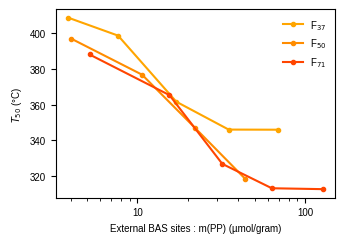

In [49]:
fig, ax1 = plt.subplots()
for i in range(len(TGA_csvs)):
    result_frame = pd.read_csv(output_directory + '/' + TGA_csvs[i])
    result_frame = result_frame.sort_values(by='P/C ratio')
    run = TGA_csvs[i].split('.')[0][-1]
    cat = dbq.get_cat(TGA_csvs[i])
    color = db['color'].loc[cat]
    ax1.plot(1/result_frame['P/C ratio']*db['TTBP_IR_BAS (umol/gram)'].loc[cat],result_frame['T50'],'o-',markersize=3, color=color,label=dbq.make_name(cat, db))



ax1.set_xscale('log')
# ax1.set_ylim(280,425)
ticks1 = [0.1,1,3]
ax1.legend(frameon=False)

# ax1.set_xticks(ticks1)
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
# ax1.set_xticklabels([str(x) for x in ticks1])
ax1.set_xlabel('External BAS sites : m(PP) (µmol/gram)')
ax1.set_ylabel('$T_{50}$ (°C)')

plt.tight_layout()
plt.savefig(os.path.join(plotdir_SI, 'T50_fumed.svg'), transparent=True)
plt.show()


### Synthesis of catalyst materials with similar external acidities but varying pore structures
Having established a procedure for preparing ASAs with controlled external acidity, we selected a set of silica supports of varying pore structures. No microporous materials were utilized, as there is ample evidence for strongly inhibited polymer transport in micropores. Most importantly, the activity of ultrastable zeolite Y is not significantly affected by its bulk BAS density, but rather by its external acidity.<sup>5</sup> Furthermore, it was shown that when PP is adsorbed on ZY from the solution phase, only 5% of its pore volume is accessible for PP adsorption.<sup>23</sup>

Fig. 3a shows the pore size distributions for the selected supports determined by NL-DFT from the adsorption branch of N2 physisorption. Isotherms are depicted in Fig. S4. A silica kernel based on cylindrical pores was utilized, which could lead to inaccuracies for most materials used. However, a comparison of pore size distributions calculated from both adsorption and desorption branches of the isotherm showed comparable results (see Fig. S5), indicating suitability of the method. Pore size distributions calculated using the more commonly used Barrett-Joyner-Halenda (BJH)<sup>30</sup> method can be found in Fig. S6.

Next to the fumed silica (F), which shows very little pores, SBA-15 (S) was utilized to include a material with a very narrow pore size distribution. Furthermore, a set of three silica materials, typically utilized as support for polyolefin polymerization catalysts, were included. These supports consist of spherical particles with a wide range of pore sizes, importantly containing large pores between 20-75 nm. We choose these large-pore materials to probe pore sizes which cannot be reached, for example, by a surfactant-based synthesis as used for SBA-15. Furthermore, a recent study by our group showed clear differences in accessibility for these silica materials based on dye adsorption kinetics.<sup>31</sup> As expected, the silica F shows a very low amount of pores, while S shows a very narrow pore size distribution around 7 nm. The spherical silicas are labeled based on their relative surface area, i.e., low (L), middle (M), high (H). These spherical silicas show very broad pore size distributions in the meso-macropore range. H and L show many large pores >20 nm, where L shows more pores above 50 nm and less pores below 50 nm. By contrast, M shows less pores with diameters above 40 nm.

### Tailoring catalyst acidity
To obtain materials of similar external acidity, multiple syntheses with varying amount of Al were required per support. As can be seen from Fig. 3b, the scaling of the external BAS density with Al loading varies strongly. For example, at an Al loading of around 170 µmol/g, the resulting acid site density for support S is more than twice that of support L. We suspect that these differences are caused by varying contents of silanol groups capable of forming a BAS, as mentioned above. For samples with a lower silanol content, saturation is reached at a lower Al loading. Determination of the number of silanol groups capable of forming BAS is challenging. It could be determined by repeating the synthesis with increasing Al loading, thereby titrating the sites. However, at very high loading formation of alumina might block pores, thus hampering reliable titration. Due to the laborious nature of these experiments, we deem this out of scope for this work.

Comparable external acid site densities between the different supports were only obtained at relatively low Al loadings. For further experiments, catalysts with an external acid site density of ~30 µmol/g prepared at an Al loading of ~ 60 µmol/g were selected.

![Figure 3](figures_annotated/Fig_3.svg)

**Fig. 3** a) Pore size distributions for selected silica supports determined by non-local density functional theory from the adsorption branch of N2 physisorption. Icons next to the labels signify the type of silica (fumed (F), spherical (L, M, H) or ordered-mesoporous (S)). b) Scaling of external Brønsted acid site density for different silica supports as a function of Al added in the synthesis per gram of support.

### Pre-processing + SI figures Physisorption (text + code)

#### Surface area and pore characterization
Surface area and pore size distributions of the silica supports and the catalyst materials were characterized by N2 physisorption at 77 K on a 3P Sync 400 gas adsorption analyzer. Before the measurements, ~100 mg was dried at 300 °C under vacuum for 10 h. Specific surface areas were determined by the BET method with automatic implementation of Rouquerol criteria as implemented in the Python library pyGAPS.<sup>3</sup> The total pore volume was determined at p/p0 = 0.99.
Pore size distributions were determined by fitting of a non-local density functional theory (NL-DFT) kernel for N2 on mesoporous silica using the adsorption branch. Micropore volumes determined by both the t-plot method (using the Harkins/Jura model as implemented in pyGAPS) as well as from NL-DFT verified negligible micropore volumes (see SI).

In [50]:
import pygaps.parsing as pgp
import pygaps.graphing as pgg
import pygaps.characterisation as pgc

data_isotherms = os.path.join(data_dir, 'Physisorption', 'Isotherms/')
paths = os.listdir(data_isotherms)

# Pore Volume is determined at p/p0 = 0.99
def determine_porevolume(isotherm,p_set = 0.99):
    isotherm.convert_loading(unit_to='mol')
    pore_volume = isotherm.data(branch='ads')\
    .iloc[isotherm.data(branch='ads')['pressure'].sub(p_set).abs().idxmin()]['loading']\
        /isotherm.adsorbate.liquid_density(isotherm.temperature)\
        *isotherm.adsorbate.molar_mass()
    return pore_volume

#### Isotherms of the support materials (Fig. S4)

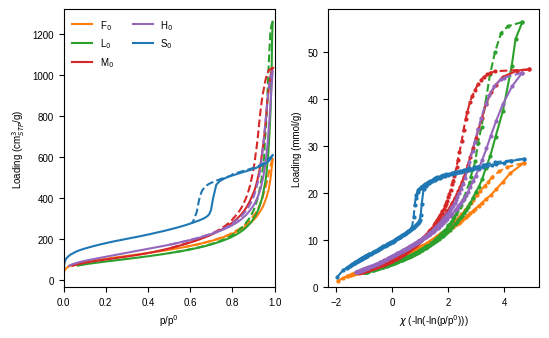

In [51]:
selector_name = ['F0','L0','M0', 'H0','S0']

isotherms = [pgp.isotherm_from_commercial(data_isotherms+name+'.xlsx', '3p', 'xl') for name in selector_name]
isotherms_supports = isotherms.copy()
def get_sample_label(path):
    sheet = pd.read_excel(data_isotherms+path, sheet_name='Summary',index_col=0)
    return sheet.loc['Sample'][0]


codes = [i[0:2] for i in selector_name]
labels = [dbq.make_name(i[0:2]) for i in selector_name]
# labels = codes
# colors = [db['color'].loc[i] for i in codes]
colors = [db['color'].loc[i] for i in codes]

for i in range(len(isotherms)):
    isotherms[i].material = labels[i]

fig, ax = plt.subplots(1,2,figsize=(5.5,5.5/1.618))

#Isotherm plot
ax[0] = pgg.plot_iso(
    isotherms,
    x_range=(0,1),
    lgd_keys=['material'],
    color=colors,ax=ax[0],marker=False
)
ax[0].set_xlabel('p/p$^0$')
ax[0].set_ylabel('Loading (cm$_{STP}^3$/g)')
ax[0].set_xlim(0)

#Chi Plot - allows to comapre isotherms easier
for i in range(len(isotherms)):
    isotherms[i].convert_loading(unit_to='mmol')
    chi = -np.log(-np.log(isotherms[i].data(branch = 'ads')['pressure']))
    loading = isotherms[i].data(branch = 'ads')['loading']
    ax[1].plot(chi,loading, color = colors[i],label = labels[i],marker = 'o', markersize='2')
    chi_des = -np.log(-np.log(isotherms[i].data(branch = 'des')['pressure']))
    loading_des = isotherms[i].data(branch = 'des')['loading']
    ax[1].plot(chi_des,loading_des, color = colors[i],label = labels[i],linestyle='--', marker = 'o', markersize='2')


ax[1].set_xlabel(r'$\chi$ (-ln(-ln(p/p$^0$)))')
ax[1].set_ylabel('Loading (mmol/g)')
ax[1].set_ylim(0,)
ax[0].legend(fontsize =7,ncol=2,frameon= False)
plt.tight_layout()
plt.savefig(plotdir_SI+ 'isotherms_supports.svg',transparent=True)
plt.show()

#### BET & Pore Volume calculation supports

BET area: a = 373.2 m2/g
The BET constant is: C = 97.2
Minimum pressure point is 0.0239 and maximum is 0.222
Statistical monolayer at: n = 0.00383 mol/g
The slope of the BET fit: s = 259
The intercept of the BET fit: i = 2.69



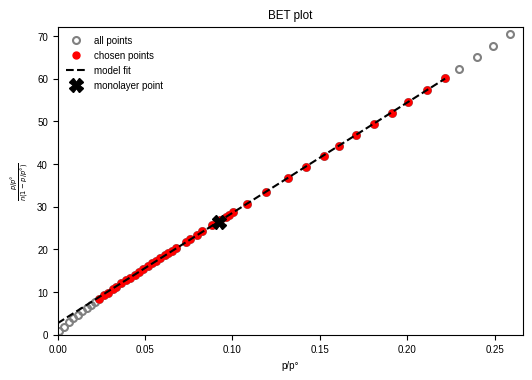

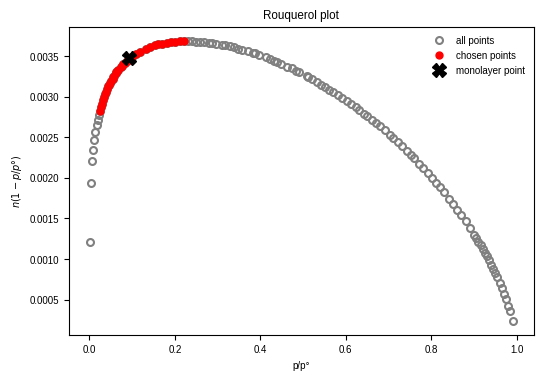

BET area: a = 325.4 m2/g
The BET constant is: C = 89.6
Minimum pressure point is 0.0676 and maximum is 0.23
Statistical monolayer at: n = 0.00334 mol/g
The slope of the BET fit: s = 296
The intercept of the BET fit: i = 3.35



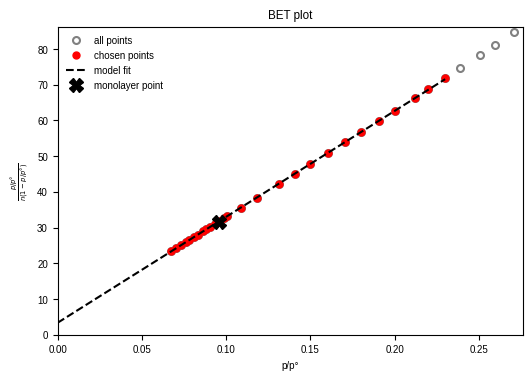

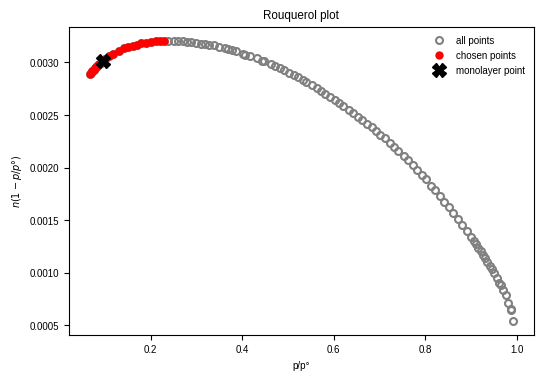

BET area: a = 361.6 m2/g
The BET constant is: C = 81.7
Minimum pressure point is 0.0422 and maximum is 0.27
Statistical monolayer at: n = 0.00371 mol/g
The slope of the BET fit: s = 266
The intercept of the BET fit: i = 3.3



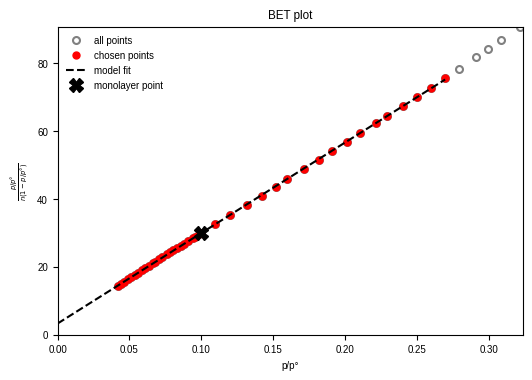

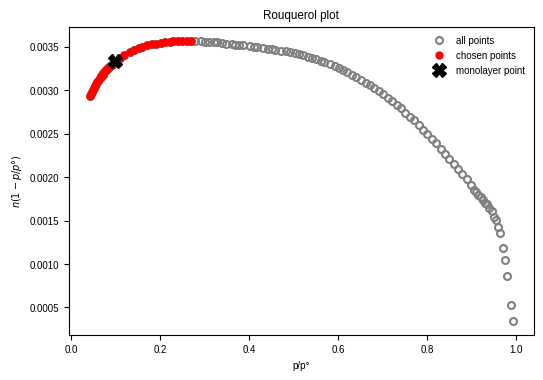

BET area: a = 417.1 m2/g
The BET constant is: C = 64.5
Minimum pressure point is 0.034 and maximum is 0.319
Statistical monolayer at: n = 0.00428 mol/g
The slope of the BET fit: s = 230
The intercept of the BET fit: i = 3.62



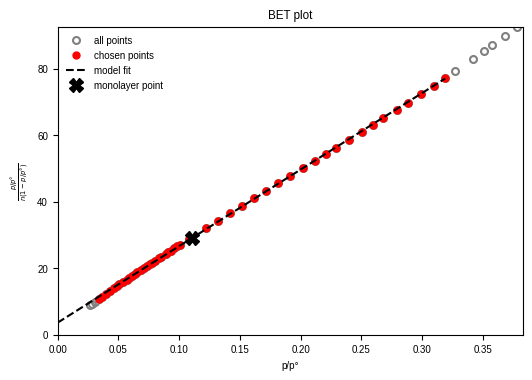

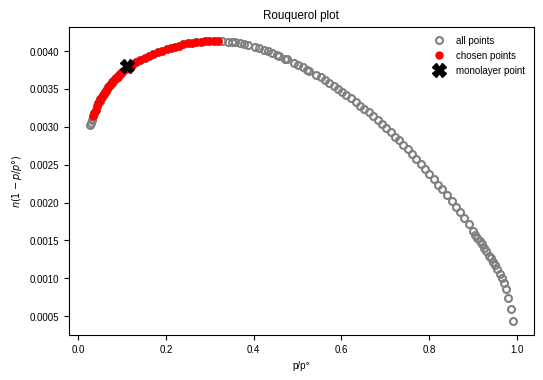

BET area: a = 646.5 m2/g
The BET constant is: C = 113.8
Minimum pressure point is 0.0215 and maximum is 0.191
Statistical monolayer at: n = 0.00663 mol/g
The slope of the BET fit: s = 150
The intercept of the BET fit: i = 1.33



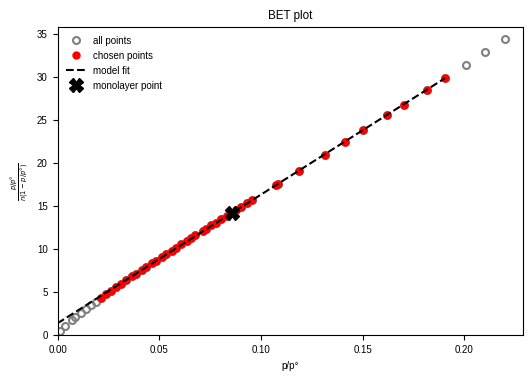

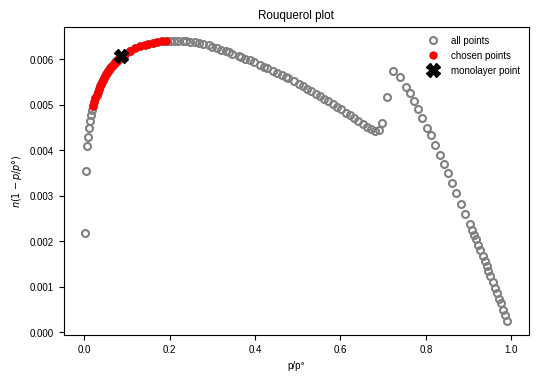

In [52]:
selector_name = ['F0','L0','M0', 'H0','S0']
isotherms = [pgp.isotherm_from_commercial(data_isotherms+name+'.xlsx', '3p', 'xl') for name in selector_name]

for i in range(len(isotherms)):
    result_BET = pgc.area_BET(isotherms[i],verbose=True)# to show additional paremeters of BET calculatation set verbose to True and uncomment plt.show()
    dbq.write_db(codes[i],'BET_area (m2/g)',result_BET['area'])
    plt.show()
    result_pore_volume = determine_porevolume(isotherms[i],p_set = 0.99)
    dbq.write_db(codes[i],'Pore_volume (cm3/g)',result_pore_volume)


t-plot of supports

For linear region 1
The slope is 9.061 and the intercept is 0.6881, with a correlation coefficient of 1
The adsorbed volume is 0.0239 cm3/g and the area is 314.8 m2/g


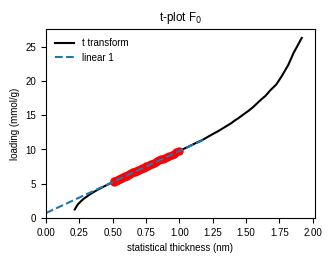

For linear region 1
The slope is 8.967 and the intercept is 0.02858, with a correlation coefficient of 0.9998
The adsorbed volume is 0.000993 cm3/g and the area is 311.5 m2/g


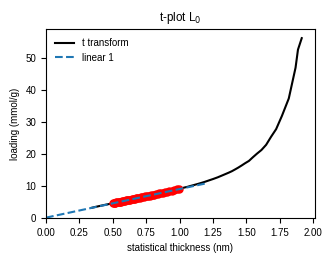

For linear region 1
The slope is 13.76 and the intercept is -1.982, with a correlation coefficient of 0.9994
The adsorbed volume is -0.0689 cm3/g and the area is 478.2 m2/g


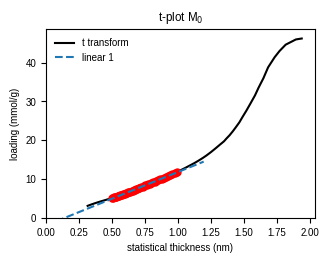

For linear region 1
The slope is 11.14 and the intercept is 0.4121, with a correlation coefficient of 0.9998
The adsorbed volume is 0.0143 cm3/g and the area is 387 m2/g


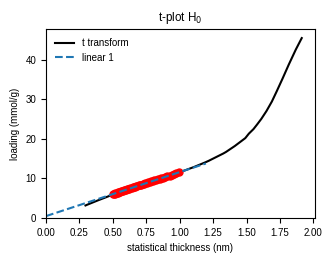

For linear region 1
The slope is 13.72 and the intercept is 2.066, with a correlation coefficient of 1
The adsorbed volume is 0.0718 cm3/g and the area is 476.7 m2/g


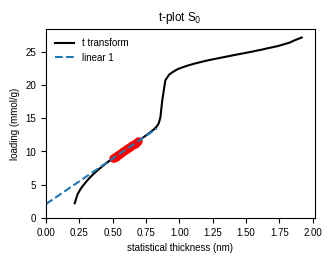

In [53]:
selector_name = ['F0','L0','M0', 'H0','S0']
isotherms = [pgp.isotherm_from_commercial(data_isotherms+name+'.xlsx', '3p', 'xl') for name in selector_name]

t_limits = {'F0':[0.5,1],'L0':[0.5,1],'M0':[0.5,1],'H0':[0.5,1],'S0':[0.5,0.7]}
show_t_plots = True
for i in range(len(isotherms)):
    results_tplot = pgc.t_plot(isotherms[i],t_limits=t_limits[codes[i]],verbose=show_t_plots,thickness_model='Harkins/Jura')
    if show_t_plots:
        plt.title('t-plot '+ dbq.make_name(codes[i],db))
        plt.xlabel('statistical thickness (nm)')
        plt.ylabel('loading (mmol/g)')
        plt.show()

    micropore_volume = results_tplot['results'][0]['adsorbed_volume']
    dbq.write_db(codes[i],'t_plot_micropore_volume_cm3',micropore_volume)

#### DFT Adsorption vs desorption branch (Fig. S5)

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4914/3072741396.py:8: SyntaxWarning: invalid escape sequence '\s'
  df_DFT = pd.read_csv(path,encoding='latin-1', sep='\s+', engine='python',names=['PoreRadius','CumPoreVolume', 'CumSurfArea','dV(r)','dS(r)'],skiprows=24, skipfooter=10)
/tmp/ipykernel_4914/3072741396.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(x) for x in ticks1])


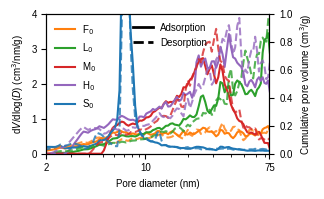

In [54]:
from matplotlib.lines import Line2D
path_DFT = os.path.join(data_dir, 'Physisorption','NLDFT')
# list all txt files
# return a list of files that and with txt
file_names = [f for f in os.listdir(path_DFT) if f.endswith('.txt')]

def read_DFT_path(path):
    df_DFT = pd.read_csv(path,encoding='latin-1', sep='\s+', engine='python',names=['PoreRadius','CumPoreVolume', 'CumSurfArea','dV(r)','dS(r)'],skiprows=24, skipfooter=10)
    return df_DFT

def micropore_volume_dft(df):
    return df['CumPoreVolume'][df['PoreRadius']/5<=2].max()

def mesopore_volume_dft(df):
    return df['CumPoreVolume'].max() - micropore_volume_dft(df)

def non_micropore_SA_dft(df):
    return df['CumSurfArea'].max() - df['CumSurfArea'][df['PoreRadius']/5<=2].max()


def get_groupcolor(support_name, db):
    cats = ['F', 'M', 'H', 'L', 'S']
    cat_groups = {}
    for cat in cats:
        cat_groups[cat] = [i for i in db.index if cat in i]
    return db['color'].loc[cat_groups[support_name[0]][0]]




fig, ax = plt.subplots(1,1,figsize=(3.25,3.25/1.625))
# ax = axs[0]
ax2 = ax.twinx()
selector = ['F0','L0','M0', 'H0','S0']

for catcode in selector:
    path = os.path.join(path_DFT , 'NLDFT_'+catcode+'.txt')
    df = read_DFT_path(path)
    catname = catcode

    df['log10_diameternm'] = np.log10(df['PoreRadius']/5)
    df['dV(log10D)'] = np.gradient(df['CumPoreVolume'],df['log10_diameternm'])
    ax.plot(df['PoreRadius']/5,df['dV(log10D)'], label=dbq.make_name(catname), color=get_groupcolor(catname[0], db))

path_DFT = os.path.join(data_dir, 'Physisorption','NLDFT_des')

for catcode in selector:
    path = os.path.join(path_DFT , 'NLDFT_'+catcode+'.txt')
    df = read_DFT_path(path)
    catname = catcode

    df['log10_diameternm'] = np.log10(df['PoreRadius']/5)
    df['dV(log10D)'] = np.gradient(df['CumPoreVolume'],df['log10_diameternm'])
    ax.plot(df['PoreRadius']/5,df['dV(log10D)'], label=None, color=get_groupcolor(catname[0], db), alpha=0.8, linestyle='--')



lines = [Line2D([0], [0], color='black', lw=2),Line2D([0], [0], color='black', lw=2, linestyle='--')]
ax2.legend(lines, ['Adsorption', 'Desorption'], frameon=False, loc ='upper left', bbox_to_anchor=(0.35,1))
ax.set_xscale('log')
ax.legend(frameon=False)

ticks1 = [2,10,75]
ax.set_xticklabels([str(x) for x in ticks1])

ax.set_xticks(ticks1)
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.set_xlim(2,75)
ax.set_ylim(0,4)
ax.set_xlabel('Pore diameter (nm)')
ax.set_ylabel('d$V$/dlog($D$) (cm$^3$/nm/g)')
ax2.set_ylabel('Cumulative pore volume (cm$^3$/g)')
plt.tight_layout()
plt.savefig(os.path.join(plotdir_SI, 'comparison_desorption_adsorption.svg'), transparent=True)
plt.show()

#### BJH of support materials (Fig. S6)

Negative values encountered in cumulative pore volumes. It is very likely that the model or its limits are wrong. Check that your pore geometry, meniscus geometry and thickness function are suitable for the material.
Negative values encountered in cumulative pore volumes. It is very likely that the model or its limits are wrong. Check that your pore geometry, meniscus geometry and thickness function are suitable for the material.
Negative values encountered in cumulative pore volumes. It is very likely that the model or its limits are wrong. Check that your pore geometry, meniscus geometry and thickness function are suitable for the material.
Negative values encountered in cumulative pore volumes. It is very likely that the model or its limits are wrong. Check that your pore geometry, meniscus geometry and thickness function are suitable for the material.


/tmp/ipykernel_4914/1916873239.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(x) for x in ticks1])


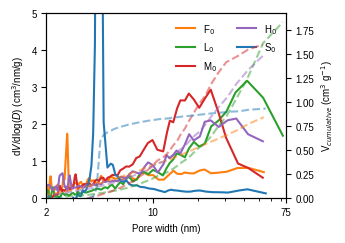

In [55]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

selector_name = ['F0','L0','M0', 'H0','S0']
labels = [dbq.make_name(i[0:2]) for i in selector_name]
isotherms_supports = [pgp.isotherm_from_commercial(data_isotherms+name+'.xlsx', '3p', 'xl') for name in selector_name]

for i in range(len(isotherms_supports)):
    result_dict = pgc.psd_mesoporous(
    isotherms_supports[i],
    psd_model = 'BJH',branch='ads')
    color = db['color'].loc[codes[i]]
    dVdlogD = np.gradient(result_dict['pore_volume_cumulative'],np.log10(result_dict['pore_widths']))
    ax.plot(result_dict['pore_widths'],dVdlogD, c = color, label = labels[i])

    ax2.plot(result_dict['pore_widths'], result_dict['pore_volume_cumulative'],c = color, linestyle = '--',alpha = 0.5)
    ax.set_xlabel('Pore width (nm)')
    ax.set_ylabel('d$V$/dlog($D$) (cm$^3$/nm/g)')
    ax2.set_ylabel('V$_{cumulative}$ (cm$^3$ g$^{-1}$)')
ax.legend(frameon=False,   ncol=2, loc= 'upper right')
ax.set_xscale('log')
ax.set_xlim(4,75)
ax.set_ylim(0,5)
ax2.set_ylim(0,)

ticks1 = [2,10,75]
ax.set_xticklabels([str(x) for x in ticks1])

ax.set_xticks(ticks1)
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
plt.tight_layout()
plt.savefig(plotdir_SI+'/BJH_psd_supports.svg',transparent=True)
plt.show()

### Fig. 3 (code)

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4914/1491246178.py:7: SyntaxWarning: invalid escape sequence '\s'
  df_DFT = pd.read_csv(path,encoding='latin-1', sep='\s+', engine='python',names=['PoreRadius','CumPoreVolume', 'CumSurfArea','dV(r)','dS(r)'],skiprows=24, skipfooter=10)
/tmp/ipykernel_4914/1491246178.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(x) for x in ticks1])


no micropores,for L0 using total volume for mesopore volume


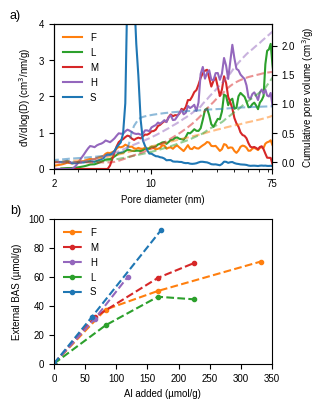

In [56]:
path_DFT = os.path.join(data_dir, 'Physisorption','NLDFT')
# list all txt files
# return a list of files that and with txt
file_names = [f for f in os.listdir(path_DFT) if f.endswith('.txt')]

def read_DFT_path(path):
    df_DFT = pd.read_csv(path,encoding='latin-1', sep='\s+', engine='python',names=['PoreRadius','CumPoreVolume', 'CumSurfArea','dV(r)','dS(r)'],skiprows=24, skipfooter=10)
    return df_DFT

def micropore_volume_dft(df):
    return df['CumPoreVolume'][df['PoreRadius']/5<=2].max()

def mesopore_volume_dft(df):
    return df['CumPoreVolume'].max() - micropore_volume_dft(df)

def non_micropore_SA_dft(df):
    return df['CumSurfArea'].max() - df['CumSurfArea'][df['PoreRadius']/5<=2].max()


def get_groupcolor(support_name, db):
    cats = ['F', 'M', 'H', 'L', 'S']
    cat_groups = {}
    for cat in cats:
        cat_groups[cat] = [i for i in db.index if cat in i]
    return db['color'].loc[cat_groups[support_name[0]][0]]


fig, axs = plt.subplots(2,1,figsize=(3.25,3.25/1.625*2))
ax = axs[0]
ax2 = ax.twinx()
selector = ['F0','L0','M0', 'H0','S0']

for catcode in selector:
    path = os.path.join(path_DFT , 'NLDFT_'+catcode+'.txt')
    df = read_DFT_path(path)
    catname = catcode

    df['log10_diameternm'] = np.log10(df['PoreRadius']/5)
    df['dV(log10D)'] = np.gradient(df['CumPoreVolume'],df['log10_diameternm'])
    ax.plot(df['PoreRadius']/5,df['dV(log10D)'], label=catname[0], color=get_groupcolor(catname[0], db))
    ax2.plot(df['PoreRadius']/5,df['CumPoreVolume'], label=catname,color=get_groupcolor(catname[0],db), alpha=0.5, linestyle='--')

    if df['PoreRadius'].iloc[0]/5>=2:
        #when the isotherm can be described without micropores
        print('no micropores,for {} using total volume for mesopore volume'.format(catname))
        dbq.write_db(catcode,'micropore volume (DFT)',0)
        dbq.write_db(catcode,'mesopore volume (DFT)',df['CumPoreVolume'].max())
    else:
        dbq.write_db(catcode,'micropore volume (DFT)',micropore_volume_dft(df))
        dbq.write_db(catcode,'mesopore volume (DFT)',mesopore_volume_dft(df))

ax.legend(frameon=False)

ax.set_xscale('log')
ax.legend(frameon=False)

ticks1 = [2,10,75]
ax.set_xticklabels([str(x) for x in ticks1])

ax.set_xticks(ticks1)
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.set_xlim(2,75)
ax.set_ylim(0,4)
ax.set_xlabel('Pore diameter (nm)')
ax.set_ylabel('dV/dlog(D) (cm$^3$/nm/g)')
ax2.set_ylabel('Cumulative pore volume (cm$^3$/g)')

cats = ['F', 'M', 'H', 'L', 'S']
cat_groups = {}
for cat in cats:
    cat_groups[cat] = [i for i in db.index if cat in i]


ax = axs[1]
for catgroup in cat_groups.keys():
    al_laodings = [db['Al(NO3)3 added (umol/gram)'].loc[i] for i in cat_groups[catgroup]]
    ext_BAS = [db['TTBP_IR_BAS (umol/gram)'].loc[i] for i in cat_groups[catgroup]]
    bulk_BAS = [db['Py_IR_BAS (umol/gram)'].loc[i] for i in cat_groups[catgroup]]
    bulk_BAS.insert(0,0)
    ext_BAS.insert(0,0)
    al_laodings.insert(0,0)
    Frame = pd.DataFrame({'Al added':al_laodings, 'ext_BAS':ext_BAS, 'bulk_BAS':bulk_BAS})
    Frame = Frame.sort_values(by='Al added')
    Frame = Frame.dropna(subset=['ext_BAS'])
    # ax2.plot(Frame['Al added'],Frame['bulk_BAS'], 'o--', label=catgroup, markersize=3, color=db['color'].loc[cat_groups[catgroup][-1]], alpha=0.5)
    ax.plot(Frame['Al added'],Frame['ext_BAS'], 'o--', label=catgroup, markersize=3, color=db['color'].loc[cat_groups[catgroup][0]])

ax.legend(frameon=False)
ax.set_xlabel('Al added (µmol/g)')
ax.set_ylabel('External BAS (µmol/g)')
ax.set_xlim(0,350)
ax.set_ylim(0,100)
plt.tight_layout()

#annotate with a and b
axs[0].text(-0.15, 1.1, 'a)', transform=axs[0].transAxes, fontsize=9, va='top', ha='right')
axs[1].text(-0.15, 1.1, 'b)', transform=axs[1].transAxes, fontsize=9,  va='top', ha='right')
plt.savefig(os.path.join(plotdir, 'Figure3.svg'), transparent=True)
plt.show()

### Effect of pore structure on plastic cracking performance
The pore size distribution of the selected materials is depicted in Fig. 4a. Isotherms are depicted in Fig. S7. After Al deposition, the pore size distribution of S, M, and L, remains largely unchanged. However, for the fumed silica F pores below 5 nm diameter disappear and pores in a size regime of 7-40 nm appear, making the pore size distribution of catalyst F<sub>37</sub> resemble that of M<sub>44</sub>. A reason for this might be additional condensation between the fumed silica particles during the synthesis procedure, forming larger particles which do exhibit pores. A side-by-side comparison of pore size distributions before and after activation is depicted in Fig. S8. Figure 4b demonstrates the similar external acidity of the selected catalysts. All materials exhibit very similar acid site densities of all 3 types. L<sub>27</sub> deviates slightly from the remaining materials, by having a larger excess of bulk BAS and LAS compared to external BAS. IR spectra are depicted in Fig. S9.
The acid site strengths were probed by TPD of both probe molecules (Fig. 5). The BAS strengths as probed by Py adsorbed at 150 °C were almost identical for all materials, and are >100 °C  lower than for ZY.5 However, some differences appeared for the stronger base TTBP. The temperature required to desorb 50% of TTBP varied by >80 °C between the ASA catalyst materials (Fig. 5c). The effect of this difference on plastic cracking activity will be discussed below. The discrepancy between Py and TTBP is rather surprising. It might result from two effects: As a stronger base, TTBP might adsorb on weaker acid sites on which Py is already desorbed. On the other hand, the stronger basicity might result in a greater thermal resolution in TPD experiments using this bulky probe.
Plastic cracking activity is compared in Fig. 4c, plotting the T50 temperature as a function of catalyst loading. To account for remaining differences in external acid site density, the loading is shown in units of external acid sites per gram of polymer. For all materials, T50 decreases with increasing catalyst loading, and begins to plateau at acid site loadings exceeding 30 µmol/g polymer. At first glance, no clear trend between activity and pore size distribution is evident. At high catalyst loading, the spherical silica materials exhibit almost identical activity. This is remarkable, as their pore structures deviate quite significantly. Especially the M32 ASA shows more pores around 20 nm and almost no pores above 40 nm compared to L<sub>27</sub> and H<sub>31</sub> (Fig. 4c). ASAs derived from SBA-15 and fumed silica (S32 and F<sub>37</sub>) show noticeably higher activity, with the latter enabling cracking below 350 °C. In addition, F<sub>37</sub> and M32 show similar pore size distributions, yet F<sub>37</sub> has a 25 °C lower T50 at high loading. These observations suggest that pore size has a lower impact on the cracking activity, compared to external acid site density (Fig. 2d).


![Figure 4](figures_annotated/Fig_4.svg)

**Fig. 4**: Impact of pore structure on plastic cracking performance. Index for amorphous aluminosilicate (ASA) catalyst labels denotes the external (i.e. non-micropore) Brønsted acid site (BAS) density in µmol/g. a) Pore size distributions for selected ASA catalyst materials determined by non-local density functional theory from the adsorption branch of N2 physisorption. b) Bulk and external acid site densities for selected ASAs probed by infrared (IR) spectroscopy of adsorbed pyridine and tri-tert-butyl-pyridine. c) Temperature at 50% conversion to volatile products (T50) for polypropylene (PP) cracking as function of catalyst loadings determined by thermogravimetric analysis (TGA) for selected ASAs. Catalyst weight is multiplied by external acid site density to yield a ratio of external BAS to polymer weight. d) Particle size distribution of ASAs determined by optical microscopy. Insert show representative images, >600 particles counted per material. Scale bar: 100 µm. Relative frequencies were weighted by the radius cubed to approximate a weight-averaged distribution. The SBA-15 based material forms particles <1 µm in size determined by scanning electron microscopy (SEM, see Fig. S12) and was therefore not probed by optical microscopy. Additional images can be found in Fig. S11.


### Fig. 4 (code)

#### Isotherms ASAs (Fig. S7)

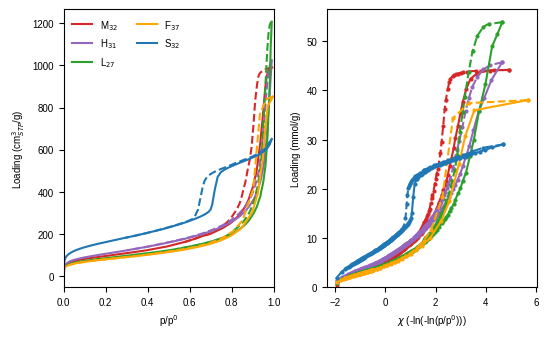

In [57]:
selector_name = ['M03','H04','L06','F04','S04']

isotherms = [pgp.isotherm_from_commercial(data_isotherms+name+'.xlsx', '3p', 'xl') for name in selector_name]

codes = selector_name
labels = [dbq.make_name(code) for code in selector_name]

colors = [db['color'].loc[i] for i in codes]

for i in range(len(isotherms)):
    isotherms[i].material = labels[i]

fig, ax = plt.subplots(1,2,figsize=(5.5,5.5/1.618))

#Isotherm plot
ax[0] = pgg.plot_iso(
    isotherms,
    x_range=(0,1),
    lgd_keys=['material'],
    color=colors,ax=ax[0],marker=False
)
ax[0].set_xlabel('p/p$^0$')
ax[0].set_ylabel('Loading (cm$_{STP}^3$/g)')
ax[0].set_xlim(0)

#Chi Plot - allows to comapre isotherms easier
for i in range(len(isotherms)):
    isotherms[i].convert_loading(unit_to='mmol')
    chi = -np.log(-np.log(isotherms[i].data(branch = 'ads')['pressure']))
    loading = isotherms[i].data(branch = 'ads')['loading']
    ax[1].plot(chi,loading, color = colors[i],label = labels[i],marker = 'o', markersize='2')
    chi_des = -np.log(-np.log(isotherms[i].data(branch = 'des')['pressure']))
    loading_des = isotherms[i].data(branch = 'des')['loading']
    ax[1].plot(chi_des,loading_des, color = colors[i],label = labels[i],linestyle='--', marker = 'o', markersize='2')


ax[1].set_xlabel(r'$\chi$ (-ln(-ln(p/p$^0$)))')
ax[1].set_ylabel('Loading (mmol/g)')
ax[1].set_ylim(0,)
ax[0].legend(fontsize =7,ncol=2,frameon= False)
plt.tight_layout()
plt.savefig(plotdir_SI+'/isotherms_catalysts.svg',transparent=True)
plt.show()

#### Comparison of pore size distribution before and after deposition (Fig. S8)

/tmp/ipykernel_4914/650500262.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(x) for x in ticks1])
/tmp/ipykernel_4914/650500262.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(x) for x in ticks1])
/tmp/ipykernel_4914/650500262.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(x) for x in ticks1])
/tmp/ipykernel_4914/650500262.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(x) for x in ticks1])
/tmp/ipykernel_4914/650500262.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a F

no micropores for L0, using total volume for mesopore volume


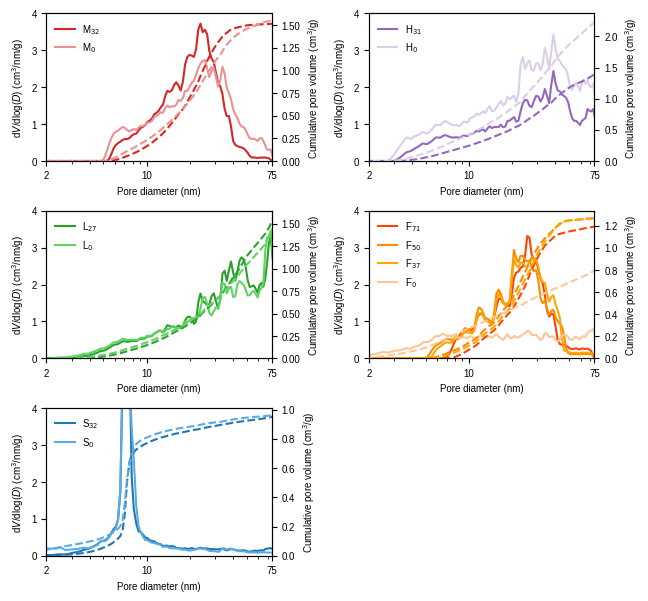

In [58]:
import colorsys
from matplotlib.colors import to_rgb as color_to_rgb
def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)


fig, axs = plt.subplots(3,2,figsize=(3.25*2,3.25/1.618*3))
path_DFT = os.path.join(data_dir, 'Physisorption','NLDFT')
selector = [['M03','M0'],['H04','H0'],['L06','L0'],['F05','F06','F04','F0'],['S04','S0']]
# selector = [['L0']]
for i in enumerate(selector):
    ax = axs[i[0]//2,(i[0]+2)%2]
    ax2 = ax.twinx()
    for cat in i[1]:
        path = os.path.join(path_DFT , 'NLDFT_'+cat+'.txt')
        df = read_DFT_path(path)
        catname = cat
        df['log10_diameternm'] = np.log10(df['PoreRadius']/5)
        df['dV(log10D)'] = np.gradient(df['CumPoreVolume'],df['log10_diameternm'])
        try:
            color=db['color'].loc[catname]
        except:
            color = 'black'
        if catname[-1]=='0':
            color = scale_lightness(color_to_rgb(color), 1.5)
        try:
            label = dbq.make_name(catname,db)
        except:
            label = catname
        ax.plot(df['PoreRadius']/5,df['dV(log10D)'], label=label, color=color)
        ax2.plot(df['PoreRadius']/5,df['CumPoreVolume'], label=label,color=color, alpha=1, linestyle='--')



        if df['PoreRadius'].iloc[0]/5>=2.0:
            #when the isotherm can be described without micropores
            print('no micropores for {}, using total volume for mesopore volume'.format(catname))
            dbq.write_db(cat,'micropore volume (DFT)',0)
            dbq.write_db(cat,'mesopore volume (DFT)',df['CumPoreVolume'].max())
        else:
            dbq.write_db(cat,'micropore volume (DFT)',micropore_volume_dft(df))
            dbq.write_db(cat,'mesopore volume (DFT)',mesopore_volume_dft(df))

    ax.set_xlim(2,75)
    ax.set_ylim(0,4)
    ax2.set_ylim(0,)
    ax.set_xscale('log')

    ticks1 = [2,10,75]
    ax.set_xticklabels([str(x) for x in ticks1])

    ax.set_xticks(ticks1)
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())

    ax.set_xlabel('Pore diameter (nm)')
    ax.set_ylabel('d$V$/dlog($D$) (cm$^3$/nm/g)')
    ax2.set_ylabel('Cumulative pore volume (cm$^3$/g)')
    ax.legend(frameon=False, loc='upper left')

axs[2,1].axis('off') #remove empty subplot
plt.tight_layout()


plt.savefig(os.path.join(plotdir_SI, 'SI_pore_sizes.svg'), transparent=True)
plt.show()

#### Py/TTBP spectra ASAs (Fig. S9)

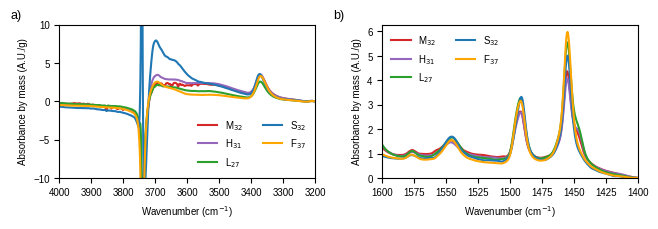

In [59]:
experiments = ['M03','H04', 'L06','S04','F04']
# experiments = ['F04', 'F05', 'F06']
utils.set_plot_defaults()
fig, axs = plt.subplots(1,2,figsize=(3.3*2,3.3/np.sqrt(2)))
db = dbq.get_db()
#TTBP
ax=axs[0]
for i in range(len(experiments)):
    exp_name = experiments[i]
    catname = exp_name
    color = db['color'].loc[exp_name]
    if type(color) != str:
        color = 'grey'
    data_dir_py = data_dir_py = data_dir + '/spectroscopy/TTBP/'
    dosed_spectrum = pd.read_csv(data_dir_py+catname+'/'+exp_name+'_TTBP_dosed_spectrum_.csv')
    dosed_spectrum = dosed_spectrum[dosed_spectrum['wavenumber']>3200]
    ax.plot(dosed_spectrum['wavenumber'],(dosed_spectrum['absorbance_byweight']-dosed_spectrum['absorbance_byweight'].iloc[-1])*1000,label=dbq.make_name(catname), color = color)
ax.legend(ncol=2,frameon=False)
ax.set_xlim(4000,3200)
ax.set_ylim(-10,10)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_ylabel('Absorbance by mass (A.U./g)')
#Pyridine
ax=axs[1]
for i in range(len(experiments)):
    exp_name = experiments[i]
    catname = exp_name
    color = db['color'].loc[exp_name]
    if type(color) != str:
        color = 'grey'
    data_dir_py = data_dir_py = data_dir + '/spectroscopy/Pyridine/'
    dosed_spectrum = pd.read_csv(data_dir_py+catname+'/'+exp_name+'_Py_dosed_spectrum_.csv')
    dosed_spectrum = dosed_spectrum[(dosed_spectrum['wavenumber']<1600 ) & (dosed_spectrum['wavenumber']>1400)]
    ax.plot(dosed_spectrum['wavenumber'],(dosed_spectrum['absorbance_byweight']-dosed_spectrum['absorbance_byweight'].iloc[-1])*1000,label=dbq.make_name(catname), color = color)
ax.legend(ncol=2,frameon=False)
ax.set_xlim(1600,1400)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_ylabel('Absorbance by mass (A.U./g)')
ax.legend(ncol=2,frameon=False)
ax.set_ylim(0,)

#annotate with a and b
axs[0].text(-0.15, 1.1, 'a)', transform=axs[0].transAxes, fontsize=9, va='top', ha='right')
axs[1].text(-0.15, 1.1, 'b)', transform=axs[1].transAxes, fontsize=9, va='top', ha='right')
plt.tight_layout()
plt.savefig(plotdir_SI+'/TTBP_Py_all.svg')
plt.show()

#### Fig. 4

/tmp/ipykernel_4914/3123447434.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(x) for x in ticks1])


M$_{32}$
particle radius mean =  13.973232646790978
aprticle radius std =  3.504329722507291
H$_{31}$
particle radius mean =  17.56229385662471
aprticle radius std =  5.698353573337156
L$_{44}$
particle radius mean =  21.53250131082868
aprticle radius std =  5.539182595822376
F$_{37}$
particle radius mean =  29.544164512675458
aprticle radius std =  13.52137906035963


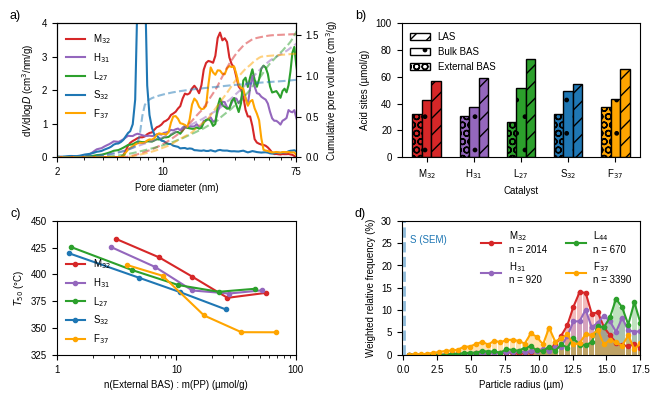

In [60]:
fig, axs = plt.subplots(2,2,figsize=(3.25*2,3.25/1.618*2))

def get_cat(filename):
    no_csv = filename.split('.')[0]
    return no_csv.split('_')[-1]


# 1a
path_DFT = os.path.join(data_dir, 'Physisorption','NLDFT')
ax = axs[0,0]
ax2 = ax.twinx()
selector = ['M03','H04', 'L06','S04','F04']

for i in selector:
    path = os.path.join(path_DFT , 'NLDFT_'+i+'.txt')
    df = read_DFT_path(path)
    catname = i
    #calc the logs
    df['log10_diameternm'] = np.log10(df['PoreRadius']/5)
    df['dV(log10D)'] = np.gradient(df['CumPoreVolume'],df['log10_diameternm'])

    ax.plot(df['PoreRadius']/5,df['dV(log10D)'], label=dbq.make_name(catname,db), color=db['color'].loc[catname])
    ax2.plot(df['PoreRadius']/5,df['CumPoreVolume'], label=dbq.make_name(catname,db),color=db['color'].loc[catname], alpha=0.5, linestyle='--')

ax.set_xlim(2,75)
ax.set_ylim(0,4)
ax2.set_ylim(0,)
ax.set_xscale('log')

ticks1 = [2,10,75]
ax.set_xticklabels([str(x) for x in ticks1])

ax.set_xticks(ticks1)
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())



ax.set_xlabel('Pore diameter (nm)')
ax.set_ylabel('d$V$/dlog$D$ (cm$^3$/nm/g)')
ax2.set_ylabel('Cumulative pore volume (cm$^3$/g)')
ax.legend(frameon=False)


#1b
ax = axs[0,1]
selector = ['M03','H04', 'L06','S04','F04']
w = 0.2
labels = selector
pivot = np.arange(len(labels))


LAS_bar = [p + w for p in pivot]
BAS_bar = [p for p in pivot]
t_BAS_bar = [p - w for p in pivot]
ax = axs[0,1]
for cat in enumerate(selector):
    color = db['color'].loc[cat[1]]
    ax.bar(t_BAS_bar[cat[0]], db['TTBP_IR_BAS (umol/gram)'].loc[cat[1]], width=w, label='External BAS', color=color,edgecolor='black', hatch='OO')

    ax.bar(BAS_bar[cat[0]], db['Py_IR_BAS (umol/gram)'].loc[cat[1]], width=w, label='Bulk BAS', color=color, hatch='.',edgecolor='black')

    ax.bar(LAS_bar[cat[0]], db['Py_IR_LAS (umol/gram)'].loc[cat[1]], width=w, label='LAS', color=color, hatch='//',edgecolor='black')

LAS_handle = mpatches.Patch(facecolor = 'white', label = 'LAS', edgecolor = 'k', hatch='//')
BAS_handle = mpatches.Patch(facecolor = 'white', label = 'Bulk BAS', edgecolor= 'k', hatch = '-.')
t_BAS_handle = mpatches.Patch(facecolor = 'white', label = 'External BAS', edgecolor= 'k', hatch = 'OO')

ax.legend(handles = [LAS_handle, BAS_handle, t_BAS_handle], loc='upper left',frameon=False)
ax.set_xlabel('Catalyst')
ax.set_ylabel('Acid sites (µmol/g)')
ax.set_ylim(0,100)

ax.set_xticks(pivot,[dbq.make_name(cat,db) for cat in selector])
# 1c


ax1 = axs[1,0]

TGA_dir = output_directory
selector = ['M03','H04', 'L06','S04','F04']
for cat in selector:
    result_frame = pd.read_csv(os.path.join(output_directory,'Results_'+ cat+'.csv'))
    result_frame = result_frame.sort_values(by='P/C ratio')
    cat = get_cat(cat)
    color = db['color'].loc[cat]
    ax1.plot(1/result_frame['P/C ratio']*db['TTBP_IR_BAS (umol/gram)'].loc[cat],result_frame['T50'],'o-',markersize=3, color=color,label=dbq.make_name(cat,db))

ax1.set_xscale('log')
ax1.set_ylim(325,450)
# ticks1 = [0.1,1,3]
#make ticks at 1,10 and 100
ticks1 = [1,10,100]
ax1.set_xticks(ticks1)
ax1.legend(frameon=False)

# ax1.set_xticks(ticks1)
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
# ax1.set_xticklabels([str(x) for x in ticks1])
ax1.set_xlabel('n(External BAS) : m(PP) (µmol/g)')
ax1.set_ylabel('$T_{50}$ (°C)')


#1d

microscopy_dir = os.path.join(data_dir, 'Optical_microscopy', 'PSD')
ParticleDirectories = os.listdir(os.path.join(data_dir, microscopy_dir))

def area_to_radius(area):
    #Area = np.pi*r**2 for a circle
    r = np.sqrt((area)/np.pi)*10**(3) #µm
    return r


ax = axs[1,1]
for dir in ['M03','H04', 'L04','F04']:
    files = os.listdir(os.path.join(microscopy_dir, dir))
    Frames = []
    for file in files:
        if file.endswith('.csv'):
            Frames.append(pd.read_csv(os.path.join(microscopy_dir, dir, file)))

    name = dbq.make_name(dir, db)

    color = db['color'].loc[dir]

    DataAll = pd.concat(Frames)
    DataAll['radius (um)'] = DataAll['Area'].apply(area_to_radius)
    num_bin = 40
    binlist = list(np.linspace(0,17.5, num_bin))
    weights = DataAll['radius (um)']**3
    # for non weighted distribution
    # weights = np.ones_like(DataAll['radius (um)'])

    count, division = np.histogram(DataAll['radius (um)'], bins = binlist, weights = weights)
    total = sum(count)
    ax.bar(division[1:],(count/total)*100, color = color, alpha = 0.3, width = 20/50)
    ax.plot(division[1:],(count/total)*100, '-o', label = name + '\n' +'n = ' + str(len(DataAll)), color = color,markersize = 3)

    #calculate the mean and std
    particle_size_mean = np.average(DataAll['radius (um)'], weights = weights)
    particle_size_std = np.sqrt(np.average((DataAll['radius (um)']-particle_size_mean)**2, weights = weights))
    print(name)
    print('particle radius mean = ', particle_size_mean)
    print('aprticle radius std = ', particle_size_std)


ax.set_xlim(-0.1,17.5)
ax.set_ylim(0,30)
ax.set_xlabel('Particle radius (µm)')
ax.set_ylabel('Weighted relative frequency (%)')
ax.legend(loc = 'upper right', frameon = False, ncol = 2)
ax.axvline(0.1, color='C0', linestyle='--', linewidth=2, alpha = 0.5)
ax.text(0.5,25,'S (SEM)', color='C0', alpha = 1)


axs[0,0].text(-0.15, 1.1, 'a)', transform=axs[0,0].transAxes, fontsize=9, va='top', ha='right')
axs[0,1].text(-0.15, 1.1, 'b)', transform=axs[0,1].transAxes, fontsize=9,  va='top', ha='right')
axs[1,0].text(-0.15, 1.1, 'c)', transform=axs[1,0].transAxes, fontsize=9,  va='top', ha='right')
axs[1,1].text(-0.15, 1.1, 'd)', transform=axs[1,1].transAxes, fontsize=9,  va='top', ha='right')


plt.tight_layout()
plt.savefig(os.path.join(plotdir, 'Figure3.svg'), transparent=True)
plt.savefig(os.path.join(plotdir, 'Figure3.pdf'), transparent=True)
plt.show()

###
In order to rationalize the observed kinetic differences between the catalytic materials, we first consider the high loading regime. The spherical catalysts (H, M, L) deviate from the other two materials (S and F) mainly in their particle size distribution. Fig. 4d shows the particle size distributions for H<sub>31</sub>, M32, L<sub>27</sub> and F<sub>37</sub> determined by optical microscopy. The relative frequency of particle sizes was weighted by the radius cubed to approximate a weight-averaged rather than a number averaged distribution. Representative images are shown in Fig. S11. The ordered mesoporous support of S32 forms small particles <1 µm as determined by scanning electron microscopy (SEM) and was therefore not studied by optical microscopy. Similarly, the particle size distribution for F<sub>37</sub> is very broad. SEM images of the ASAs under study are depicted in Fig. S12.

The particle sizes of F<sub>37</sub> and S32 are significantly lower compared to the other materials, suggesting that particle size, rather than mesopore size distribution, might be the determining factor for the minimal cracking temperature that can be reached at high catalyst loading. We will return to discussing particle size effects later.

At catalyst loadings (<10 µmol external BAS per g of polymer), the spherical silica materials show differences in activity, with T50 decreasing in the order M32 >H<sub>31</sub>>L<sub>27</sub>. As the M32 material shows less pores above 40 nm, this is a slight indication that large pores are beneficial within this group of materials. Curiously, for the F<sub>37</sub> material T50 increases faster with decreasing loading compared to the other materials, and at low loading its activity is comparable to the L<sub>27</sub> material with significantly larger particles. In prior work focusing on US-Y catalysts, we have discussed changes in activity trends with catalyst loading in detail.5 While explaining these effects is challenging, we suspect that the main cause is a difference in acid site distribution, leading to differences in which bonds along the polymer backbone are cleaved.5 The S32 material is the most active material at low loading, potentially due to its significantly smaller particle size.

The small deviations in T50 at low loading match well with the trend of acid site strengths. The more active S32, L<sub>27</sub> and F<sub>37</sub> silica materials all show higher TTBP desorption temperatures compared to the less active M32 and H¬31 materials. To show this, T50 at precisely 5 µmol/g external acid site loading was interpolated from measurements done at varying loading (Fig. S10). In Fig. 5c, this activity metric is plotted as a function of the temperature at which 50% of TTBP desorbed in TPD experiments as an indication of acid site strength. For a higher TTBP desorption temperature, and therefore higher acid site strength, a lower PP cracking temperature was observed. We expect that the remaining differences in observed activity to be even smaller if the strengths of acid sites would be matched even better. This result also indicates that weaker acid sites which are not probed by Py adsorbed at 150 °C contribute to the cracking activity. Moreover, this result suggests that the differences in acid site strength for these ASA materials cannot be probed by Py-TPD at the conditions utilized.


![Figure 5](figures_annotated/Fig_5.svg)

**Fig. 5**: Temperature programmed desorption (TPD) in combination with infrared (IR) spectroscopy measurements of adsorbed (a) pyridine (Py) (b) tri-tert-butyl-pyridine (TTBP) for selected amorphous silica-alumina (ASA) materials. Temperature at 50% desorption indicated. (c) Temperature at 50% conversion to volatile products (T50) for polypropylene (PP) cracking at an external acid site loading of 5 µmol per gram of PP as a function of temperature at which 50% of TTBP was desorbed in TPD experiments.  

### Fig. 5 (code)

#### Interpolation of T50 (Fig. S10)
To interpolate T50 to a precise loading, a linear fit for the 3 lowest loadings is conducted

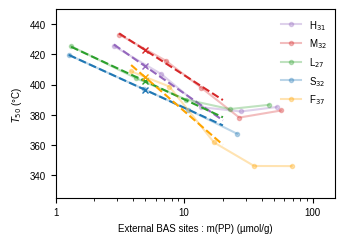

In [61]:
def calc_t50(result_frame, target_BAS_loading, ext_Bas, cutoff = 15):
    result_frame['ext_BAS_loading'] = (1/result_frame['P/C ratio'])*ext_Bas
    fit_frame = result_frame.loc[result_frame['ext_BAS_loading']<cutoff]
    # do a linear fit
    lin_fit = linregress(np.log(fit_frame['ext_BAS_loading']),y = fit_frame['T50'])
    return lin_fit.slope*np.log(target_BAS_loading)+ lin_fit.intercept, lin_fit.slope, lin_fit.intercept

#Plotting T50 vs cat loading
TGA_dir = output_directory
selector = ['H04','M03','L06', 'S04','F04']
fig, ax1 = plt.subplots()
for cat in selector:
    result_frame = pd.read_csv(os.path.join(output_directory,'Results_'+ cat+'.csv'))
    result_frame = result_frame.sort_values(by='P/C ratio')
    cat = get_cat(cat)
    color = db['color'].loc[cat]
    ax1.plot(1/result_frame['P/C ratio']*db['TTBP_IR_BAS (umol/gram)'].loc[cat],result_frame['T50'],'o-',markersize=3, color=color,label=dbq.make_name(cat,db), alpha = 0.3)

    # interpolation
    t50_5, slope, intercept = calc_t50(result_frame,5,db['TTBP_IR_BAS (umol/gram)'].loc[cat], cutoff = 20)
    dbq.write_db(cat,'T50_5_interpolated',t50_5)

    min_loading = (1/result_frame['P/C ratio']*db['TTBP_IR_BAS (umol/gram)'].loc[cat]).min()
    x = np.linspace(min_loading,20,100)
    y = slope*np.log(x)+intercept
    ax1.plot(x,y,'--',color=color)
    ax1.plot(5,t50_5,markersize=5,marker='x', color=color)



ax1.set_xscale('log')
ax1.set_ylim(325,450)
ax1.set_xlim(1,150)
ax1.legend(frameon=False)
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.set_xlabel('Catalyst loading (wt/wt)')
ax1.set_ylabel('$T_{50}$ (°C)')

ax1.set_xlabel('External BAS sites : m(PP) (µmol/g)')
ax1.set_ylabel('$T_{50}$ (°C)')

plt.tight_layout()

plt.savefig(os.path.join(plotdir_SI, 'T50_interpolated.svg'), transparent=True)
plt.show()

#### Fig. 5

The T50 (Pyridine) of M03 is 296.0
The T50 (Pyridine) of H04 is 326.0
The T50 (Pyridine) of L06 is 299.0
The T50 (Pyridine) of S04 is 304.0
The T50 (Pyridine) of F04 is 304.0
The T50 (TTBP) of M03 is 297.0
The T50 (TTBP) of H04 is 303.0
The T50 (TTBP) of L06 is 328.0
The T50 (TTBP) of S04 is 392.0
The T50 (TTBP) of F04 is 343.0


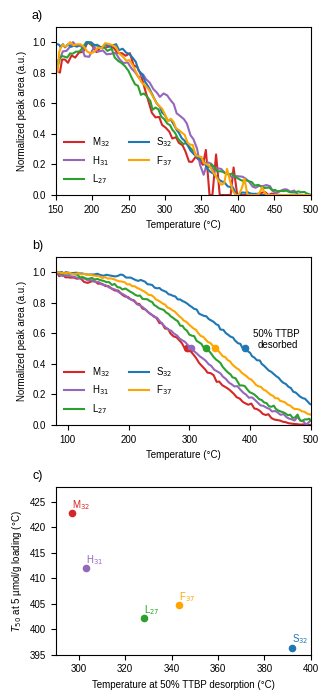

In [62]:
experiments = ['M03','H04', 'L06','S04','F04']
utils.set_plot_defaults()
fig, axs = plt.subplots(3,1,figsize=(3.3,3.3/np.sqrt(2)*3))
db = dbq.get_db()

#Pyridine
ax=axs[0]
for i in range(len(experiments)):
    exp_name = experiments[i]
    catname = exp_name
    color = db['color'].loc[exp_name]
    if type(color) != str:
        color = 'grey'
    data_dir_py = data_dir_py = data_dir + '/spectroscopy/Pyridine/'
    tpd_frame = pd.read_csv(data_dir_py+catname+'/'+exp_name+'_Py_BAS_TPD.csv')
    y = tpd_frame['integral_byweight']/tpd_frame['integral_byweight'].max()
    ax.plot(tpd_frame['temperature'],tpd_frame['integral_byweight']/tpd_frame['integral_byweight'].max(),label=dbq.make_name(catname), color = color)
    T50_Py=tpd_frame['temperature'].loc[tpd_frame['integral_byweight']<=0.5*tpd_frame['integral_byweight'].max()].iloc[0]
    print('The T50 (Pyridine) of '+catname+' is '+str(T50_Py))
    dbq.write_db(catname,'T50_Py',T50_Py)
ax.legend(ncol=2,frameon=False, loc='lower left')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Normalized peak area (a.u.)')
ax.set_xlim(150,500)
ax.set_ylim(0,1.1)

#TTBP
ax=axs[1]
for i in range(len(experiments)):
    exp_name = experiments[i]
    catname = exp_name
    color = db['color'].loc[exp_name]
    if type(color) != str:
        color = 'grey'
    data_dir_py = data_dir_py = data_dir + '/spectroscopy/TTBP/'
    tpd_frame = pd.read_csv(data_dir_py+catname+'/'+exp_name+'_TTBP_BAS_TPD.csv')
    ax.plot(tpd_frame['temperature'],tpd_frame['integral_byweight']/tpd_frame['integral_byweight'].max(),label=dbq.make_name(catname), color = color)
    T50_TTBP=tpd_frame['temperature'].loc[tpd_frame['integral_byweight']<=0.5*tpd_frame['integral_byweight'].max()].iloc[0]
    #plot the T50 point
    ax.scatter(T50_TTBP,0.5,marker='o',color=color, s=20)

    print('The T50 (TTBP) of '+catname+' is '+str(T50_TTBP))
    dbq.write_db(catname,'T50_TTBP',T50_TTBP)

ax.annotate('50% TTBP \ndesorbed', (445,0.50),color='black', fontsize=7, ha='center')

ax.legend(ncol=2,frameon=False, loc='lower left')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Normalized peak area (a.u.)')
ax.set_xlim(80,500)
ax.set_ylim(0,1.1)


### TGA
ax= axs[2]
db= dbq.get_db()
db = db.loc[db['T50_5_interpolated']>0]
for i in db.index:
    ax.scatter(db['T50_TTBP'].loc[i],db['T50_5_interpolated'].loc[i],color=db['color'].loc[i], s=20)
    ax.annotate(dbq.make_name(i), (db['T50_TTBP'].loc[i],db['T50_5_interpolated'].loc[i]+1),color=db['color'].loc[i], fontsize=7)
ax.set_xlim(290,400)
ax.set_ylim(395,428)
ax.set_ylabel('$T_{50}$ at 5 µmol/g loading (°C)')
ax.set_xlabel('Temperature at 50% TTBP desorption (°C)')


#annotate with a and b
axs[0].text(-0.05, 1.1, 'a)', transform=axs[0].transAxes, fontsize=9, va='top', ha='right')
axs[1].text(-0.05, 1.1, 'b)', transform=axs[1].transAxes, fontsize=9, va='top', ha='right')
axs[2].text(-0.05, 1.1, 'c)', transform=axs[2].transAxes, fontsize=9, va='top', ha='right')
plt.tight_layout()
plt.savefig(plotdir+'/TTBP_Py_TPD.svg')
plt.show()

###

One alternative explanation of the observed lack of a pore-size effect on the plastic cracking activity is that the polymer does not enter the mesopores at all. However, we deem this unlikely, as prior evidence from in-situ X-ray diffraction for SBA-15 based samples,14 as well es electron and optical microscopy of mesoporous fluid catalytic cracking catalyst4 clearly showed that mesopores are accessible to low Mw polymers. TGA experiments and calculations described below further support this view.
The tested catalysts showed very low coke yields below 2% even at high catalyst loadings (Fig. S13), which complicates investigation of the effect of pore structure on coking. However, ASAs derived from large spherical silica particles showed slightly higher coke yields, likely due to trapping of cracking vapors in the larger particles. This is similar to a prior finding, where we demonstrated that crushing a FCC catalyst can strongly reduce coke formation in PP cracking.4


#### Coke yield by TGA (Fig. S13)

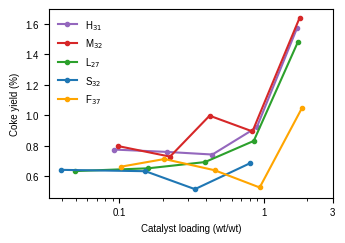

In [63]:
TGA_dir = output_directory
selector = ['H04','M03','L06', 'S04','F04']

fig, ax1 = plt.subplots()
for cat in selector:
    result_frame = pd.read_csv(os.path.join(output_directory,'Results_'+ cat+'.csv'))
    result_frame = result_frame.sort_values(by='P/C ratio')
    cat = get_cat(cat)
    color = db['color'].loc[cat]
    ax1.plot(1/result_frame['P/C ratio'],result_frame['coke_yield']*100,'o-',markersize=3, color=color,label=dbq.make_name(cat,db))



ax1.set_xscale('log')

ticks1 = [0.1,1,3]
ax1.legend(frameon=False)

ax1.set_xticks(ticks1)
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.set_xticklabels([str(x) for x in ticks1])
ax1.set_xlabel('Catalyst loading (wt/wt)')
ax1.set_ylabel('Coke yield (%)')

plt.tight_layout()
plt.savefig(os.path.join(plotdir_SI, 'pore_structure_coking.svg'), transparent=True)
plt.show()

###
Explaining the observed differences in activity at high catalyst loading requires additional insight into how exactly the molten polymer interacts with a porous catalyst. Critically, gaining an understanding of how fast a polymer melt can intrude into the catalyst particles is required. For this we chose to probe the interaction of the polymer with the inert supports. We developed a TGA experiment in which catalytic material, an inert support, and polymer were stacked in a TGA pan in different order. Fig. 6a describes the approach schematically. When polymer is mixed with catalyst alone, the cracking occurs purely at catalytic cracking temperatures, as can also be seen in Fig. 6b for F39 in green. If the polymer is mixed with inert support F0 (Fig. 6b, purple) cracking proceeds exclusively at the thermal decomposition temperature of ~475 °C. When inert and active material are both utilized interesting differences begin to appear. If the interaction of the polymer melt with the inert material is maximized, i.e., when the polymer is on top of the inert material with active material at the bottom (Fig. 6b, yellow), both catalytic and thermal degradation is observed, as is evident from the two peaks in the differential weight loss (DTGA). In fact, in the mentioned case, it appears that more than half of the polymer is cracked thermally, rather than catalytically. This can be explained by intrusion of the polymer into the inert, porous material by capillary forces. Once inside, there is no driving force for the polymer to evolve again. In a sense, the polymer is ‘locked’ and inaccessible to the catalyst, leading to decomposition only at the thermal degradation temperature (Fig. 6a, bottom). The observation of thermal cracking of plastic in the presence of active sites implies that if a catalytic material contains porous, yet inert regions without active sites, plastic that enters into these pores will only be cracked at the thermal cracking temperature. This effectively decreases the activity more than a simple dilution of active sites would. This effect showcases another critical difference when comparing conventional gaseous reactants and highly viscous polymer melts in cracking catalysis. In addition, this experiment highlights that the studied polymer enters the pores of the silica materials investigated herein.
Returning to different configurations, if the polymer is in direct contact with the catalytic material, for example in a configuration where it is ‘sandwiched’ between catalyst at the bottom, and inert silica on top (Fig. 6b, blue), or placed on top of catalyst in turn placed on top of inert material (Fig. 6b, red), significantly more polymer is cracked catalytically rather than thermally.


![Figure 6](figures_annotated/Fig_6.svg)

**Fig. 6**: a) Schematic illustration of thermogravimetry (TGA) experiment probing interaction of polypropylene (PP) between active amorphous aluminosilicate (ASA) and inert silica. Polymer, inert silicas and ASAs area loaded in different orders into a TGA pan and heated under N2 atmosphere. DTGA: Derivative of the weight loss profile. b) TGA profiles using PP, fumed silica and active ASA F39 stacked in different configurations. c) TGA profiles using PP, active F39 and different inert silicas stacked to maximize interaction of the polymer with the inert material. Experiments with no inert material and pure polymer are included for reference.

### Fig. 6 (code)

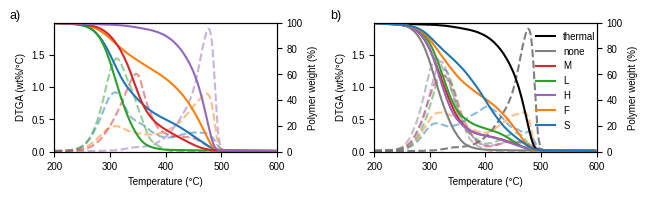

In [64]:
db = dbq.get_db()

fig, axs = plt.subplots(1,2,figsize=(3.25*2,3.25/1.618*1))
#a---------------------------------------------------------------------------------
retainment_dir = os.path.join(data_dir, 'TGA', 'TGA_retention')
layers_dir = os.path.join(retainment_dir, 'layers')
filenames = os.listdir(layers_dir)


ax = axs[0]
ax2 = ax.twinx()
layer_files = [os.path.join(layers_dir, file) for file in os.listdir(layers_dir) if file.endswith('.txt')]
labels = filenames
colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
for file in enumerate(layer_files):
    tga_exp = tga.parse_txt(file[1],exp_type = 'pyro',calculate_DTGA=True) # parses a ASCII TGA output file with multiple stages
    ax2.plot(tga_exp.cracking()['Sample Temp.'],tga_exp.cracking()['rel_weight_pwl']*100,color=colors[file[0]],label = labels[file[0]][-25:-1])
    ax.plot(tga_exp.cracking()['Sample Temp.'],tga_exp.cracking()['DTGA_pwl']*100,'--',color=colors[file[0]],alpha=0.5)

ax.set_xlabel('Temperature (°C)')
ax2.set_ylabel('Polymer weight (%)')
ax.set_ylabel('DTGA (wt%/°C)')
ax.set_xlim(200,600)
ax2.set_ylim(0,100)
ax.set_ylim(0,)

### b --------------------------------------------------------------------------------------------

silicas_dir = os.path.join(retainment_dir, 'silicas')
filenames_silica = os.listdir(silicas_dir)

ax = axs[1]
ax2 = ax.twinx()
silica_files = sorted([os.path.join(silicas_dir, file) for file in os.listdir(silicas_dir)])
catcodes = [file.split('_')[-2] for file in filenames_silica]
labels = ['thermal' if 'nocat' in catcode else 'none' if 'none' in catcode else catcode[0] for catcode in catcodes]
colors = ['black' if 'nocat' in catcode else 'grey' if 'none' in catcode else db['color'].loc[catcode] for catcode in catcodes]
for file in enumerate(silica_files):
    tga_exp = tga.parse_txt(file[1],exp_type = 'pyro',calculate_DTGA=True) # parses a ASCII TGA output file with multiple stages
    ax2.plot(tga_exp.cracking()['Sample Temp.'],tga_exp.cracking()['rel_weight_pwl']*100,color=colors[file[0]],label = labels[file[0]])
    ax.plot(tga_exp.cracking()['Sample Temp.'],tga_exp.cracking()['DTGA_pwl']*100,'--',color=colors[file[0]],alpha=0.5)
ax.set_xlabel('Temperature (°C)')
ax2.set_ylabel('Polymer weight (%)')
ax.set_xlim(200,600)
ax2.set_ylim(0,100)
ax.set_ylim(0,)
ax2.set_ylim(0,)

ax.set_ylabel('DTGA (wt%/°C)')
ax2.legend(frameon=False, loc = 'upper right',bbox_to_anchor=(1.035,1))



axs[0].text(-0.15, 1.1, 'a)', transform=axs[0].transAxes, fontsize=9, va='top', ha='right')
axs[1].text(-0.15, 1.1, 'b)', transform=axs[1].transAxes, fontsize=9,  va='top', ha='right')

plt.tight_layout()
plt.savefig(os.path.join(plotdir, 'Figure6.svg'), transparent=True)
plt.show()

###
When contact with the inert material is maximized, this experiment allows to qualitatively compare intrusion into different inert materials, and we applied it to the set of inert materials in this study. Fig. 6c shows TGA profiles for mixtures of active F39 at the bottom of the pan, followed by inert material, and PP on top, along with control experiments without inert material and thermal decomposition. The spherical silicas show very little thermal decomposition, while for the two inert materials with small particle sizes (S0 and F0), the share of thermally cracked plastic is significantly higher, as can be seen by the delayed weight loss. This experiment demonstrates that for the finer powders, polymer intrudes significantly easier, and is in alignment with the higher plastic cracking activity demonstrated in Fig. 4c for S and F.

When considering just pore sizes, this result is somewhat unintuitive. According to Lucas-Washburn equation (Eq. 1), the intruded length should increase with increasing pore size. The spherical silicas have larger pores (Fig. 3a, d > 10 nm) and should also exhibit larger inter-particle pores due to their larger particle size (r > 10 µm). However, due to the comparatively large particle size of the spherical silicas, the outmost surface area, which is most readily accessible to the polymer upon melting, is relatively small. For smaller particles (as is the case with S and F), the outermost surface area is larger. Therefore, wetting of the smaller particles should proceed faster. In addition, more pore entries for further intrusion into the particle interior are available for the smaller particles.

We believe that this wetting effect is the principal mechanism by which smaller particles enable cracking at lower temperatures. We have tested whether crushing one of the spherical silicas leads to an increase in activity. M<sub>32</sub> was ground using pestle and mortar until no original spherical particles remained, which was verified by optical microscopy (Fig. S11). TGA experiments showed no significant increase in PP cracking activity, although a slight reduction in T50 was observed at the highest loading (Fig. S14). This indicates that a reduction in particle size by more than one order of magnitude is required to induce an increase in activity.

#### Effect of crushing on activity (Fig. S14)

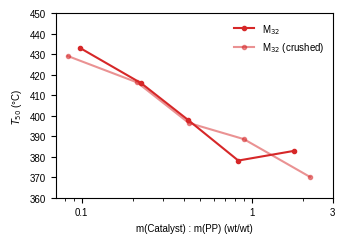

In [65]:
TGA_dir = output_directory
selector = ['M03','M03crushed']
fig, ax1 = plt.subplots()
for cat in selector:
    result_frame = pd.read_csv(os.path.join(output_directory,'Results_'+ cat+'.csv'))
    result_frame = result_frame.sort_values(by='P/C ratio')
    cat_colorref = get_cat(cat)[0:3]
    if len(cat)>=5:
        alpha = 0.5
    else:
        alpha = 1
    color = db['color'].loc[cat_colorref]
    ax1.plot(1/result_frame['P/C ratio'],result_frame['T50'],'o-',markersize=3, color=color,label=dbq.make_name(cat,db), alpha=alpha)


ax1.set_xscale('log')
ax1.set_ylim(360,450)
ticks1 = [0.1,1,3]
ax1.legend(frameon=False)

ax1.set_xticks(ticks1)
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.set_xticklabels([str(x) for x in ticks1])
ax1.set_xlabel('Catalyst loading (wt/wt)')
ax1.set_ylabel('$T_{50}$ (°C)')

ax1.set_xlabel('m(Catalyst) : m(PP) (wt/wt)')
ax1.set_ylabel('$T_{50}$ (°C)')

plt.tight_layout()
plt.savefig(os.path.join(plotdir_SI,'effect_crushing.svg'), transparent=True)
plt.show()

### Simulation of pore intrusion
To further investigate the observed lack of clear trends with regards to pore structure, we have conducted a simplified simulation of the intrusion process during an experiment with a ramped temperature. The intruded length was calculated using the Lucas-Washburn equation (Eq. 1). Details are described in the SI and implemented in the companion Jupyter notebook. As described in the method section, these estimations require many assumptions and should therefore be interpreted with caution. Importantly, assumptions with regards to the confinement-induced increase in viscosity have a large effect.

Using Ref.32, a radius of gyration of 5 nm can be estimated from the Mw of the PP sample under study. By comparison, the mean pore radii of the ASA materials range from 3 to 11 nm. Results from Refs.18,19 for PS and PE polymers indicate that when the radius of gyration approaches or exceeds the pore radius, an increase in viscosity of 1-3 orders of magnitude can be expected. We therefore tested the impact of a 100x and 1000x increase in effective viscosity resulting from confinement.

Fig. 7a shows the intruded length as a function of time for mean pore diameters determined by NL-DFT of three selected catalyst materials (S32 in blue, M32 in red and L<sub>27</sub> in green) using a 100x viscosity correction on the zero-shear viscosity determined by rheology for the PP sample (see supplementary note 1, Table S2). The shaded region was calculated for pore radii deviating one standard deviation above and below the mean. Intrusion is set to begin once the melting point of ~156 °C is crossed. The intruded length increases approximately with the square root of the time. Deviations from square root behavior are due to reduction of surface tension and viscosity with increasing temperature. As enforced by the underlying equation, the materials with larger pores show a faster increase of the intruded length. For the SBA-15 based material with small pores and very small particle sizes, the particles should be filled almost instantly, as the intrusion curve crosses the horizontal dotted line, representing the particle radius, in seconds. For materials with larger pores and particle sizes representing spherical silica, the polymer takes three to four minutes to intrude the length of the particle radius. At this stage in the experiment, the temperature has not risen above 200 °C. For the most active material we tested in this study, namely F<sub>71</sub>, a significant decrease in sample weight was not observed until the temperature exceeded 250 °C.

![Figure 7](figures_annotated/Fig_7.svg)

**Fig. 7**: a,b) Intrusion length estimated with a ramped temperature (10 °C/min), by applying the Lucas-Washburn equation to polypropylene (PP, M¬¬w = 23,100 g/mol) for catalyst materials with varying mean pore radii, which were calculated from non-local density functional theory. Color coding for catalyst materials is identical to prior figures. Shaded region drawn between pore radii deviating one standard deviation below and above the mean pore diameter. Mean catalyst particle radii are drawn as horizontal lines. Significant cracking begins above 250 °C even at high catalyst loading for the most active material used in this study. 100x and 1000x corrections were applied to the rheologically determined zero-shear viscosity.  c) Temperature at 50% conversion to volatile products ($T$<sub>50</sub>) as function of catalyst loadings determined by thermogravimetric analysis (TGA) for selected amorphous silica-alumina (ASA) materials at two heating rates. Catalyst weight is multiplied by external acid site density to yield a ratio of external Brønsted acid site (BAS) to polymer weight for the ordinate. Full TGA profiles can be found in Fig. S15.

### Rheology of PP melts, Supplementray note 1 (code + text)

Next to the PP material introduced in this study, additional PP materials from a prior work were investigated.
To evaluate the rheological properties of the PP materials, an Anton Paar MCR 702e MultiDrive rheometer with a parallel plate geometry (Ø = 25 mm, gap = 0.5 mm) or a cone-and-plate geometry (Ø = 50 mm, gap =0.097mm, ϴ = 1°) was employed. Frequency sweep tests were conducted under a continuous nitrogen flow, at 230 °C, in the linear viscoelastic regime (strain 1-130% depending on the sample) and at the angular frequencies ranging from 0.01 to 624 rad s−1. The measurements plate geometry and applied strain were determined based on a series of prior amplitude sweep tests conducted on the samples. The objective was to strike a balance between maintaining measurement accuracy and ensuring sufficient torque, particularly for samples with very low molecular weights, to ensure reliable data collection. Frequency sweep tests were performed on the PP307k sample (see Table S2) at various temperatures, including 190 °C, 210 °C, 230 °C, 250 °C, 270 °C, and 290 °C. The angular frequency range for these tests spanned from 0.01 to 624 rad s−1. The strain value was adjusted within the 1-5% range depending on the specific temperature being tested. To calculate the zero-shear viscosity, the frequency range of 117-0.104 rad/s was selected. This range was carefully chosen to ensure the accurate and reliable determination of the zero-shear viscosity. The Carreau–Yasuda model (Eq. S4) was used to quantify rheological components:

\begin{equation}
\eta(\omega) = \eta_0 \left[ 1 + (\theta \omega)^m \right]^{\frac{n-1}{m}}
\tag{Eq. S4}
\end{equation}

In this model, η0 refers to the zero-shear viscosity, θ represents the characteristic relaxation time, m indicates the Newtonian/Power-law transition factor, and n represents the power-law index. Fig. S19 shows the measured complex viscosities and fit. Determined zero-shear viscosities along with additional characterization are summarized in Tab S2.

#### Determination of zero-shear viscosity for PP of different Mw (Fig. S19)

<>:83: SyntaxWarning: invalid escape sequence '\c'
<>:83: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_4914/2189098535.py:83: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('Complex Viscosity (Pa $\cdot$ s)')


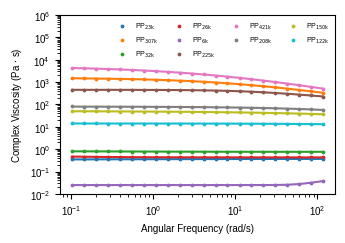

<Figure size 346.457x244.882 with 0 Axes>

In [66]:
from scipy.optimize import curve_fit


# Rheogoly processing
data_dir_rheo = home + 'data_rheology/'
polymer_db_path = 'Polymer_database.csv'
polymer_db = dbq.get_db(polymer_db_path)

# Mw series
MW_series_dir = os.path.join(data_dir_rheo, 'Mw_Series')
Mw_files = os.listdir(MW_series_dir)


def read_Rheo_csv(Path, min_freq=0.01, max_freq=117):
    """
    Read rheology data from a CSV file, filter by frequency range, and return a DataFrame.
    """
    name = os.path.basename(Path).split('.')[0]
    # print(name)
    df = pd.read_csv(Path, encoding='utf-16', skiprows=7, sep='\t')
    units = df.iloc[1]  # Get the first row for units
    df = df[2:].iloc[:, :-1].astype(float)
    df = df[(df['Angular Frequency'] >= min_freq) & (df['Angular Frequency'] <= max_freq)]
    return df, units, name


def eta_func(w, eta0, theta, m, n):
    return eta0 * (1 + (theta * w) ** m) ** ((n - 1) / m)


def make_PP_name(PP, polymer_db=polymer_db):
    return f'PP$_{{{int(np.round(polymer_db["Mw [g mol-1]"].loc[PP]/1000))}\\mathrm{{k}}}}$'



fig, ax = plt.subplots()

guesses = pd.read_csv(os.path.join(data_dir_rheo, 'Fit_p0.csv'), index_col=0)

for i in range(len(Mw_files)):
    path = os.path.join(MW_series_dir, Mw_files[i])
    df, units, name = read_Rheo_csv(path, min_freq=0.104, max_freq=117)
    #plotting measured data
    ax.scatter(df['Angular Frequency'], df['Complex Viscosity'], s=3, label=make_PP_name(name))

    # fitting
    opt, cov = curve_fit(eta_func, df['Angular Frequency'], df['Complex Viscosity'], maxfev= 10000000,p0=guesses.loc[name].to_list(), bounds=([0, -np.inf, -np.inf, 0], [np.inf, np.inf, np.inf, 2]))
    eta0, theta, m, n = opt
    err = np.sqrt(np.diag(cov))


    data_fit = eta_func(df['Angular Frequency'], *opt)


    #calcualte R^2
    residuals = df['Complex Viscosity'] - eta_func(df['Angular Frequency'], *opt)
    ss = np.sum(residuals**2)
    sst = np.sum((df['Complex Viscosity'] - np.mean(df['Complex Viscosity']))**2)
    r2 = 1 - (ss / sst)

    #optional printing
    # print(name)
    # print(eta0, theta, m, n)
    # print('error eta:'+ str(err[0]/eta0*100)+ '%')
    # print(f'R^2: {r2}')


    # plotting model
    ax.plot(df['Angular Frequency'], data_fit)
    #annotate with just the equation

    if err[0]>0.1:
        eta0 = df['Complex Viscosity'].iloc[-1]

    # writing to db
    dbq.write_db(name, 'zero_shear_viscosity', eta0, polymer_db_path)
    dbq.write_db(name, 'zero_shear_viscosity_stddev', err[0], polymer_db_path)


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Angular Frequency (rad/s)')
ax.set_ylabel('Complex Viscosity (Pa $\cdot$ s)')
ax.set_ylim(0.01, 1000000)
ax.legend(frameon=False, ncols=4, loc = 'upper right', fontsize=5, bbox_to_anchor=(1., 1))
plt.tight_layout()
# ax.set_ylim(0.01, 1000000)
plt.show()
plt.savefig(os.path.join(plotdir_SI, 'Rheology_Mw_series.svg'), transparent=True)

#### Mw scaling of viscosity (Fig. S20)
To obtain a general scaling of viscosity with molecular weight, a linear fit of the zero-shear viscosity a linear fit was conducted (Fig. S20).
As  discussed in the main text, the main PP sample utilized in this study deviates significantly from the general trend and was therefore not included in the fit. Similarly two low Mw PP samples were excluded, as their Mn is close or below the critical entanglement molecular weight.13

fit: 3.123687018318928x + -32.83071951352414
fit stddev: [0.23661926 2.75573014]


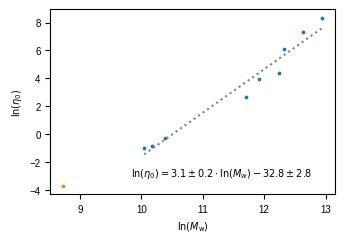

In [67]:
polymer_db_full = polymer_db.copy()
# polymers_not_fitted = ['P1-001-3','P1-005', 'P1-007']
polymers_not_fitted = ['P1-007']
polymer_db = polymer_db[~polymer_db.index.isin(polymers_not_fitted)]

fig, ax = plt.subplots()
def linear_fit(x, a, b):
    return a * x + b

# Fit a linear model to the data
opt, cov = curve_fit(linear_fit, np.log(polymer_db['Mw [g mol-1]']), np.log(polymer_db['zero_shear_viscosity']), maxfev=1000000)
a, b = opt
err = np.sqrt(np.diag(cov))
print(f'fit: {a}x + {b}')
print(f'fit stddev: {err}')
x_fit = np.linspace(np.log(polymer_db['Mw [g mol-1]'].min()), np.log(polymer_db['Mw [g mol-1]'].max()), 100)
y_fit = linear_fit(x_fit, *opt)

# plotting
ax.plot(x_fit, y_fit, color='grey',linestyle='dotted', label='Fitted line')
ax.annotate(r'$\ln(\eta_0) = {}\pm{} \cdot \ln(M_w) {}\pm{}$'.format(round(a, 1),round(err[0],1), round(b, 1),round(err[1], 1)), xy=(0.6, 0.1), xycoords='axes fraction', ha='center')

ax.scatter(np.log((polymer_db['Mw [g mol-1]'])), np.log(polymer_db['zero_shear_viscosity']), s= 3)

for polymer in polymers_not_fitted:
    ax.scatter(np.log((polymer_db_full['Mw [g mol-1]']).loc[polymer]), np.log(polymer_db_full['zero_shear_viscosity'].loc[polymer]), s= 3, color='C1', label='not fitted')


ax.set_xlabel(r'$\ln(M_\mathrm{w})$')
ax.set_ylabel(r'$\ln(\eta_0)$')
plt.tight_layout()
plt.savefig(os.path.join(plotdir_SI, 'Rheology_Mw_scaling.svg'), transparent=True)
plt.show()

#### Temperature scaling of melt viscosity (Fig. S21 and S22)
Fig. S21 depicts the measured viscosities measured for PP307k (see Table S2) at varying temperature. From the determined zero-shear viscosities, the temperature scaling of the viscosity was determined by means of a linear fit (Fig. S22). Upwards of 250 °C, the viscosity dropped faster with increasing temperature as expected from the linear fit, indicating thermal degradation.

190 °C
error eta:0.24%
R^2: 0.9999913650428246
210 °C
error eta:0.34%
R^2: 0.9999729089513386


<>:55: SyntaxWarning: invalid escape sequence '\c'
<>:55: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_4914/3794895579.py:55: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('Complex Viscosity (Pa $\cdot$ s)')


230 °C
error eta:0.24%
R^2: 0.9999782558347183
250 °C
error eta:0.37%
R^2: 0.9998882639732285
270 °C
error eta:0.44%
R^2: 0.9992006287887284
290 °C
error eta:0.68%
R^2: 0.9849408072753963


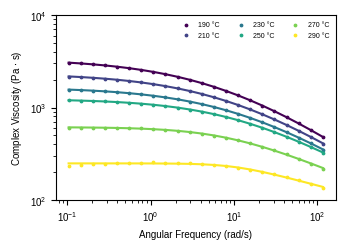

In [68]:
fig, ax = plt.subplots()

Temp_series_dir = os.path.join(data_dir_rheo, 'Temperature_series')
Temp_files = os.listdir(Temp_series_dir)
guess = guesses.loc['P1-002-1'].to_list()

#making a colormap
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(190, 290)
colors = [cmap(norm(float(i.split('_')[1][0:3]))) for i in Temp_files]

Temps = []
viscosities = []

for i in range(len(Temp_files)):
    path = os.path.join(Temp_series_dir, Temp_files[i])
    df, units, name = read_Rheo_csv(path, min_freq=0.104, max_freq=117)
    Temp = name.split('_')[1][0:3]
    print(Temp + ' °C')
    #plotting measured data
    ax.scatter(df['Angular Frequency'], df['Complex Viscosity'], s=3, label=Temp + ' °C', color=colors[i])
    #fitting
    guess[0] = df['Complex Viscosity'].iloc[-1]
    opt, cov = curve_fit(eta_func, df['Angular Frequency'], df['Complex Viscosity'], maxfev= 10000000,p0=guess, bounds=([0, -np.inf, -np.inf, 0], [np.inf, np.inf, np.inf, 2]))
    eta0, theta, m, n = opt
    guess = opt
    err = np.sqrt(np.diag(cov))

    print('error eta:'+ str(np.round(err[0]/eta0*100, 2))+ '%')

    data_fit = eta_func(df['Angular Frequency'], *opt)


    #calcualte R^2
    residuals = df['Complex Viscosity'] - eta_func(df['Angular Frequency'], *opt)
    ss = np.sum(residuals**2)
    sst = np.sum((df['Complex Viscosity'] - np.mean(df['Complex Viscosity']))**2)
    r2 = 1 - (ss / sst)
    print(f'R^2: {r2}')

    # plotting model
    ax.plot(df['Angular Frequency'], data_fit, color=colors[i])

    Temps.append(float(Temp))
    viscosities.append(eta0)


df_results = pd.DataFrame({'Temperature (°C)': Temps, 'Zero shear viscosity (Pa s)': viscosities})
df_results.to_csv(os.path.join(data_dir, 'Temp_series_results.csv'), index=False)


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Angular Frequency (rad/s)')
ax.set_ylabel('Complex Viscosity (Pa $\cdot$ s)')
# ax.set_ylim(0.01, 1000000)
ax.legend(frameon=False, ncols=3, loc = 'upper right', fontsize=5, bbox_to_anchor=(1., 1))
plt.tight_layout()
ax.set_ylim(100, 10000)
plt.savefig(os.path.join(plotdir_SI, 'Rheology_Temp_series.svg'), transparent=True)
plt.show()

fit: 4080.352974357187x + -8.097358297483291
fit stddev: [57.21590693  0.11638057]
R^2: 0.9996069051293377


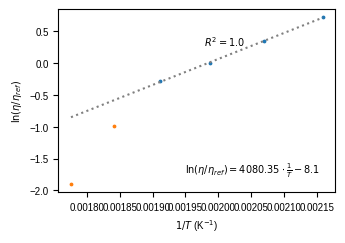

In [69]:
df_results['Temp_K'] = df_results['Temperature (°C)'] + 273.15
ref_viscosity = df_results['Zero shear viscosity (Pa s)'].loc[df_results['Temperature (°C)'] == 230].values[0]
df_results['Fit'] = df_results['Temperature (°C)'] <= 250
df_results['ln(norm_visc)'] = np.log(df_results['Zero shear viscosity (Pa s)']/ref_viscosity)

fig, ax = plt.subplots()
ax.scatter(1/df_results['Temp_K'].loc[df_results['Fit']], df_results['ln(norm_visc)'].loc[df_results['Fit']], s=3)
ax.scatter(1/df_results['Temp_K'].loc[df_results['Fit']==False], df_results['ln(norm_visc)'].loc[df_results['Fit']==False], s=3)

#linear fit at for lower temperatures
opt, cov = curve_fit(linear_fit, 1/df_results['Temp_K'].loc[df_results['Fit']], df_results['ln(norm_visc)'].loc[df_results['Fit']])
a, b = opt
slope_temp = a
intercapt_temp = b

err = np.sqrt(np.diag(cov))
print(f'fit: {a}x + {b}')
print(f'fit stddev: {err}')
x_fit = np.linspace((1/df_results['Temp_K']).min(), (1/df_results['Temp_K']).max(), 100)
y_fit = linear_fit(x_fit, *opt)

#calculate r2
residuals = df_results['ln(norm_visc)'].loc[df_results['Fit']] - linear_fit(1/df_results['Temp_K'].loc[df_results['Fit']], *opt)
ss = np.sum(residuals**2)
sst = np.sum((df_results['ln(norm_visc)'].loc[df_results['Fit']] - np.mean(df_results['ln(norm_visc)'].loc[df_results['Fit']]))**2)
r2 = 1 - (ss / sst)
print(f'R^2: {r2}')


ax.plot(x_fit, y_fit, color='grey',linestyle='dotted', label='Fitted line')
ax.annotate(rf'$\ln(\eta/\eta_{{ref}}) = {round(a, 2)} \cdot \frac{{1}}{{T}} {round(b, 2):+}$', xy=(0.7, 0.1), xycoords='axes fraction', ha='center')
ax.annotate(r'$R^2 = {}$'.format(round(r2, 2)), xy=(0.6, 0.8), xycoords='axes fraction', ha='center')

ax.set_xlabel(r'$1/T$ (K$^{-1}$)')
ax.set_ylabel(r'$\ln(\eta/\eta_{{ref}})$')
plt.tight_layout()
plt.savefig(os.path.join(plotdir_SI, 'Rheology_Temp_series_fit.svg'), transparent=True)
plt.show()

### Intrusion simulation (code + text)

A simplified simulation of the intrusion process into particles of different pore sizes was conducted using Lucas-Washburn equation (Eq. 1, main text). The intruded length L was calculated as a function of time for experiments with a ramped temperature and different pore radii determined from NL-DFT. The surface tension for isotactic PP in dyne/cm (10-5 N/cm) was adapted from literature11 using Eq. S1, which was established from 180-220 °C. This limited temperature range significantly narrows the range of temperatures in which our estimation can be applied. We assume this linear relationship holds up to 250 °C. Beyond this temperature, thermal degradation (see supplementary note 1) might affect the surface tension significantly.

\begin{equation}
\gamma(T) = 44 - 0.1038 \cdot T\ (\degree C)
\tag{Eq. S1}
\end{equation}

For zero shear viscosity, parallel-plate rheometry under N2 atmosphere was conducted for the two polymers used in this study. Details can be found in supplementary note 1.

Furthermore, we aimed at providing a generalized estimation of intruded lengths at various molecular weights. For this, we measured a set of PP samples of different Mw used in a previous study (see supplementary note 1).9 The scaling of viscosity η with Mw was calculated according to Eq. S2 in Pascal-seconds. The determined power law coefficient of 3.1±0.2 is close to 3.4 reported in the literature.12 Deviations are likely due to inclusion of lower Mw polymers in the fitting procedure, which are closer to the critical entanglement molecular weight.13

\begin{equation}
\ln(\eta(M_w)) = 3.1 \pm 0.2 \cdot \ln(M_w) - 32.8 \pm 2.8
\tag{Eq.~S2}
\end{equation}

For the impact of temperature on viscosity, rheological experiments at temperatures of 190-290 °C were conducted for a PP sample with a Mw = 306,800 g/mol. Temperature scaling was described by an Arrhenius-like equation Eq. S314 relative to the viscosity η(T0) the arbitrarily selected reference temperature T0 of 504 K (230 °C):

\begin{equation}
\ln\left(\frac{\eta(T)}{\eta(T_0)}\right) = 4080.35 \cdot \frac{1}{T} - 8.1
\tag{Eq.~S3}
\end{equation}

The slope is noticeably higher, while the intercept is lower than reported in an 1967 study on PP (2200 and 4.65 respectively),14 which we attribute to differences in methods and polymer studied. Utilizing these literature values did not change the conclusions.
Importantly, recent studies have shown that for PS15 and PE16 the viscosity of the polymer strongly increases under confinement. For PS an increase up to two orders of magnitude were reported when the radius of gyration of the polymer was larger than the pore radius. For PE with Mw of 27,000 g/mol and 50,000 g/mol, the effective viscosity increased by two to three orders of magnitude compared to the bulk for pores with diameters of 9 to 1 nm respectively.16 We therefore tested 100x and 1000x corrections to the calculated viscosity to account for confinement effects.
The contact angle was assumed at 21° based on a literature value for PE on silica.17 We assume that this contact angle is not affected significantly by the low loading of Al.

In [70]:
#Model Description

def calc_surface_tension(Temp):
    # if Temp >260:
    #     Temp = 260
    surface_tension = (44.46 + Temp*-0.1038)*10**(-3) # in N/m ,  J. Moreira, N. Demerquette, J. Appl. Polym. Sci, 2001

    if surface_tension < 0:
        raise ValueError('Surface tension is negative, check the temperature')
    return surface_tension

# calculate the viscosity at a given temperature and Mw
def calc_viscosity(T: float, Mw: float, conf_mult: float = 1, fix_ln_eta_230: float | bool = False) -> float:
    'Calculates the viscosity of a PP melt at a given molecular wieght and temperture, optional confinement factor'
    T_K = T + 273.15 # convert to Kelvin
    if fix_ln_eta_230 != False:
        ln_eta_230 = np.log(fix_ln_eta_230)
    else:
        ln_eta_230 = 3.416868542333034*np.log(Mw) -36.445573915760775
    ln_eta_T = 4080.3529819123683 *(1/T_K) -8.097358312232943 + ln_eta_230 #measuremnets on PP by maastricht guys
    eta_T_Mw = np.exp(ln_eta_T)*conf_mult
    return eta_T_Mw

# calculate intrusion lenght
def calc_intrusion_length(pore_radius, intrusion_time, cos_theta, Temperature, Mw, conf_mult=1,fix_ln_eta_230 = False)-> float:
    """
    Calculate the intrusion length of a polymer melt in a pore based on the Washburn equation.
    """
    surface_tension = calc_surface_tension(Temperature)
    viscosity = calc_viscosity(Temperature, Mw,conf_mult=conf_mult, fix_ln_eta_230=fix_ln_eta_230)
    intrusion_length = np.sqrt((surface_tension*pore_radius*intrusion_time*cos_theta)/(2*viscosity))
    return intrusion_length

#### Intrusion for PP1 (Fig. 7)

<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:52: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:52: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4914/2564511448.py:44: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(time/60, intrusion_lengths_test[i,:], label = 'r$_{\mathrm{pore}}$ = '+str(int((pore_radii[i]*10**9)))  +r'$\pm${}'.format(std_devs_single[i])+ ' nm', color = colorlist[i])
/tmp/ipykernel_4914/2564511448.py:52: SyntaxWarning: invalid escape sequence '\m'
  ax.annotate('r$_{\mathrm{particle}}$'+ " = {} µm".format(part_radius[1]), xy=(4.35, part_radius[1]+1), fontsize = 7, color = colorlist[part_radius[0]])
/tmp/ipykernel_4914/2564511448.py:54: SyntaxWarning: invalid escape sequence '\m'
  ax.annotate('r$_{\mathrm{particle}}$'+ " = {} µm".format(part_radius[1]), xy=(0.1, part_radius[1]+1), fontsiz

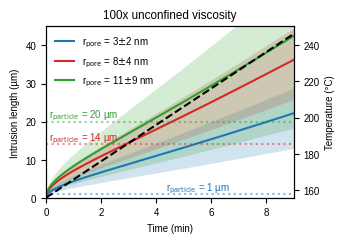

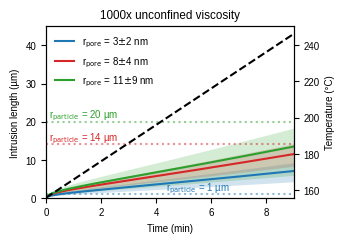

In [71]:
# For PP1

mp = polymer_db['Melting Point [C]'].loc['P1-001-3'] # melting point in C
Mw = polymer_db['Mw [g mol-1]'].loc['P1-001-3'] # molecular weight in g/mol
fixed_zero_viscosity = polymer_db['zero_shear_viscosity'].loc['P1-001-3'] # fixed zero viscosity
cos_theta = np.cos(21/180*np.pi) #cosine of contact angle

###Simulation parameters-----------------------
time = np.linspace(0, 1500, 1000) # Time in seconds
temp_ramp = 10 # in C/min
temps = mp + 10*time/60 #Start at melting point, temperature ramp of 10C/min

#Pore properties-----------------------
pore_radii = np.array([3, 8,11])*10**(-9) # in nm
std_devs_single = [2,4,9]
std_devs = [[5,1],[12,4],[2,20]] # standard deviations for the pore radii in nm, for each pore radius
particle_radii = [1,14,20] # in micrometers, particle radii for the plot


#correction factor for confinement
Confinement_mults = [100,1000]

# particle diameter
colorlist = ['C0', 'C3', 'C2']
for Confinement_mult in Confinement_mults:
    intrusion_lengths_test = np.zeros((len(pore_radii), len(time)))
    for i in range(len(pore_radii)):
        for j in range(len(time)):
            intrusion_lengths_test[i,j] = calc_intrusion_length(pore_radii[i], time[j], cos_theta, temps[j], Mw,conf_mult=Confinement_mult,fix_ln_eta_230=fixed_zero_viscosity)*10**6

    intrusion_lengths_std_plus = np.zeros((len(pore_radii), len(time)))
    intrusion_lengths_std_minus = np.zeros((len(pore_radii), len(time)))
    for i in range(len(pore_radii)):
        for j in range(len(time)):
            intrusion_lengths_std_plus[i,j] = calc_intrusion_length(std_devs[i][0]*10**(-9), time[j], cos_theta, temps[j], Mw,conf_mult=Confinement_mult,fix_ln_eta_230=fixed_zero_viscosity)*10**6
            intrusion_lengths_std_minus[i,j] = calc_intrusion_length(std_devs[i][1]*10**(-9), time[j], cos_theta, temps[j], Mw,conf_mult=Confinement_mult,fix_ln_eta_230=fixed_zero_viscosity)*10**6


    # plot the intrusion lenghts
    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    for i in range(len(pore_radii)):
        ax.plot(time/60, intrusion_lengths_test[i,:], label = 'r$_{\mathrm{pore}}$ = '+str(int((pore_radii[i]*10**9)))  +r'$\pm${}'.format(std_devs_single[i])+ ' nm', color = colorlist[i])
        ax.fill_between(time/60, intrusion_lengths_std_minus[i,:],intrusion_lengths_std_plus[i,:], alpha = 0.2, color = colorlist[i],edgecolor = 'none')
    ax2.plot(time/60, temps, label = 'Temperature', color = 'black', linestyle = '--')

    #adding sizes
    for part_radius in enumerate(particle_radii):
        ax.axhline(y = part_radius[1], color = colorlist[part_radius[0]], linestyle = 'dotted', alpha = 0.5)
        if part_radius[0] == 0:
            ax.annotate('r$_{\mathrm{particle}}$'+ " = {} µm".format(part_radius[1]), xy=(4.35, part_radius[1]+1), fontsize = 7, color = colorlist[part_radius[0]])
        else:
            ax.annotate('r$_{\mathrm{particle}}$'+ " = {} µm".format(part_radius[1]), xy=(0.1, part_radius[1]+1), fontsize = 7, color = colorlist[part_radius[0]])



    ax.legend(frameon= False, loc = 'upper left', fontsize = 7,facecolor='white')
    ax.set_xlim(0,9)
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Intrusion length (µm)')
    ax.set_ylim([0, 45])
    #annotate with Mw
    ax2.set_ylabel('Temperature (°C)')
    ax2.set_ylim(156,250)
    plt.title('{}x unconfined viscosity'.format(Confinement_mult))

    # ax.annotate('Mw = {} g/mol'.format(Mws_test), xy=(0.6, 0.05), xycoords='axes fraction', fontsize = 8)
    plt.tight_layout()
    plt.savefig(os.path.join(plotdir_SI, 'washburn_plot_PP1_{}x.svg'.format(Confinement_mult)),  transparent=True)
    # plt.savefig(plotdir+'/'+'washburn_plot_time_temp.pdf',  transparent=True)
    plt.show()

#### Intrusion for PP2 (Fig. S17)

<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:51: SyntaxWarning: invalid escape sequence '\m'
<>:53: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:51: SyntaxWarning: invalid escape sequence '\m'
<>:53: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4914/724236560.py:43: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(time/60, intrusion_lengths_test[i,:], label = 'r$_{\mathrm{pore}}$ = '+str(int((pore_radii[i]*10**9)))  +r'$\pm${}'.format(std_devs_single[i])+ ' nm', color = colorlist[i])
/tmp/ipykernel_4914/724236560.py:51: SyntaxWarning: invalid escape sequence '\m'
  ax.annotate('r$_{\mathrm{particle}}$'+ " = {} µm".format(part_radius[1]), xy=(4.35, part_radius[1]+1), fontsize = 7, color = colorlist[part_radius[0]])
/tmp/ipykernel_4914/724236560.py:53: SyntaxWarning: invalid escape sequence '\m'
  ax.annotate('r$_{\mathrm{particle}}$'+ " = {} µm".format(part_radius[1]), xy=(0.1, part_radius[1]+1), fontsize =

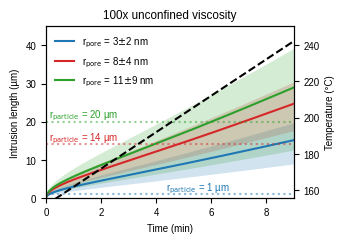

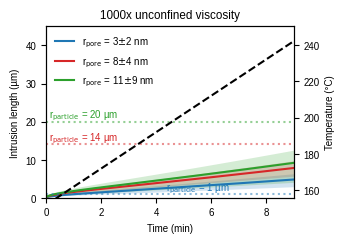

In [72]:
#for PP2
mp = polymer_db['Melting Point [C]'].loc['P1-004'] # melting point in C
Mw = polymer_db['Mw [g mol-1]'].loc['P1-004'] # molecular weight in g/mol
fixed_zero_viscosity = polymer_db['zero_shear_viscosity'].loc['P1-004'] # fixed zero viscosity
cos_theta = np.cos(21/180*np.pi) #cosine of contact angle

###Simulation parameters-----------------------
time = np.linspace(0, 1500, 1000) # Time in seconds
temp_ramp = 10 # in C/min
temps = mp + 10*time/60 #Start at melting point, temperature ramp of 10C/min

#Pore properties-----------------------
pore_radii = np.array([3, 8,11])*10**(-9) # in nm
std_devs_single = [2,4,9]
std_devs = [[5,1],[12,4],[2,20]] # standard deviations for the pore radii in nm, for each pore radius
particle_radii = [1,14,20] # in micrometers, particle radii for the plot


#correction factor for confinement
Confinement_mults = [100,1000]

# particle diameter
colorlist = ['C0', 'C3', 'C2']
for Confinement_mult in Confinement_mults:
    intrusion_lengths_test = np.zeros((len(pore_radii), len(time)))
    for i in range(len(pore_radii)):
        for j in range(len(time)):
            intrusion_lengths_test[i,j] = calc_intrusion_length(pore_radii[i], time[j], cos_theta, temps[j], Mw,conf_mult=Confinement_mult,fix_ln_eta_230=fixed_zero_viscosity)*10**6

    intrusion_lengths_std_plus = np.zeros((len(pore_radii), len(time)))
    intrusion_lengths_std_minus = np.zeros((len(pore_radii), len(time)))
    for i in range(len(pore_radii)):
        for j in range(len(time)):
            intrusion_lengths_std_plus[i,j] = calc_intrusion_length(std_devs[i][0]*10**(-9), time[j], cos_theta, temps[j], Mw,conf_mult=Confinement_mult,fix_ln_eta_230=fixed_zero_viscosity)*10**6
            intrusion_lengths_std_minus[i,j] = calc_intrusion_length(std_devs[i][1]*10**(-9), time[j], cos_theta, temps[j], Mw,conf_mult=Confinement_mult,fix_ln_eta_230=fixed_zero_viscosity)*10**6


    # plot the intrusion lenghts
    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    for i in range(len(pore_radii)):
        ax.plot(time/60, intrusion_lengths_test[i,:], label = 'r$_{\mathrm{pore}}$ = '+str(int((pore_radii[i]*10**9)))  +r'$\pm${}'.format(std_devs_single[i])+ ' nm', color = colorlist[i])
        ax.fill_between(time/60, intrusion_lengths_std_minus[i,:],intrusion_lengths_std_plus[i,:], alpha = 0.2, color = colorlist[i],edgecolor = 'none')
    ax2.plot(time/60, temps, label = 'Temperature', color = 'black', linestyle = '--')

    #adding sizes
    for part_radius in enumerate(particle_radii):
        ax.axhline(y = part_radius[1], color = colorlist[part_radius[0]], linestyle = 'dotted', alpha = 0.5)
        if part_radius[0] == 0:
            ax.annotate('r$_{\mathrm{particle}}$'+ " = {} µm".format(part_radius[1]), xy=(4.35, part_radius[1]+1), fontsize = 7, color = colorlist[part_radius[0]])
        else:
            ax.annotate('r$_{\mathrm{particle}}$'+ " = {} µm".format(part_radius[1]), xy=(0.1, part_radius[1]+1), fontsize = 7, color = colorlist[part_radius[0]])



    ax.legend(frameon= False, loc = 'upper left', fontsize = 7,facecolor='white')
    ax.set_xlim(0,9)
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Intrusion length (µm)')
    ax.set_ylim([0, 45])
    #annotate with Mw
    ax2.set_ylabel('Temperature (°C)')
    ax2.set_ylim(156,250)
    plt.title('{}x unconfined viscosity'.format(Confinement_mult))

    # ax.annotate('Mw = {} g/mol'.format(Mws_test), xy=(0.6, 0.05), xycoords='axes fraction', fontsize = 8)
    plt.tight_layout()
    plt.savefig(os.path.join(plotdir_SI, 'washburn_plot_PP2_{}x.svg'.format(Confinement_mult)),  transparent=True)
    # plt.savefig(plotdir+'/'+'washburn_plot_time_temp.pdf',  transparent=True)
    plt.show()

### Addtional TGA figures (code)

#### TGA at 20C/min (Fig. 7c)

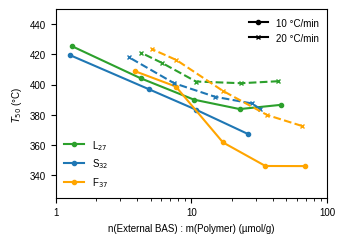

In [73]:
TGA_dir = output_directory
selector = ['L06', 'S04','F04']
fig, ax1 = plt.subplots()
for cat in selector:
    result_frame = pd.read_csv(os.path.join(output_directory,'Results_'+ cat+'.csv'))
    result_frame = result_frame.sort_values(by='P/C ratio')
    cat = get_cat(cat)
    color = db['color'].loc[cat]
    ax1.plot(1/result_frame['P/C ratio']*db['TTBP_IR_BAS (umol/gram)'].loc[cat],result_frame['T50'],'o-',markersize=3, color=color,label=dbq.make_name(cat,db))
dir_20C = output_directory_20
selector_20C = ['L06', 'S04','F04']

for cat in selector_20C:
    result_frame = pd.read_csv(os.path.join(output_directory_20,'Results_'+ cat+'.csv'))
    result_frame = result_frame.sort_values(by='P/C ratio')
    cat = get_cat(cat)
    color = db['color'].loc[cat]
    ax1.plot(1/result_frame['P/C ratio']*db['TTBP_IR_BAS (umol/gram)'].loc[cat],result_frame['T50'],'x--',markersize=3, color=color)

ax1.set_xscale('log')
ax1.set_ylim(325,450)
ticks1 = [1,10,100]

ax1.set_xticks(ticks1)
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.set_xticklabels([str(x) for x in ticks1])
ax1.set_xlabel('n(External BAS) : m(Polymer) (µmol/g)')
ax1.set_ylabel('$T_{50}$ (°C)')


legend1 = ax1.legend(frameon=False, loc='lower left')


custom_lines = [Line2D([0], [0], marker='o', color='black', markerfacecolor='black',markersize=3),Line2D([0], [0], marker='x', color='black', markerfacecolor='black',markersize=3)]
ax1.legend(custom_lines, ['10 °C/min', '20 °C/min'], frameon=False)
ax1.add_artist(legend1)



plt.tight_layout()
plt.savefig(os.path.join(plotdir, '20C_vs10C.svg'), transparent=True)
plt.show()

#### TGA for PP2 (Fig. S17C)

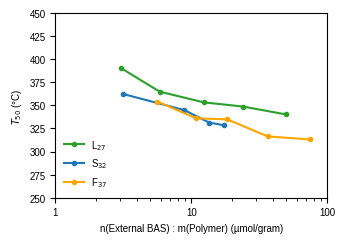

In [74]:
fig, ax1 = plt.subplots()

selector_PP2 = ['L06', 'S04','F04']

for cat in selector_PP2:
    result_frame = pd.read_csv(os.path.join(output_directory_2,'Results_'+ cat+'.csv'))
    result_frame = result_frame.sort_values(by='P/C ratio')
    cat = get_cat(cat)
    color = db['color'].loc[cat]
    ax1.plot(1/result_frame['P/C ratio']*db['TTBP_IR_BAS (umol/gram)'].loc[cat],result_frame['T50'],'o-',markersize=3, label=dbq.make_name(cat,db),color=color)

ax1.set_xscale('log')
ax1.set_ylim(250,450)
ticks1 = [1,10,100]

ax1.set_xticks(ticks1)
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.set_xticklabels([str(x) for x in ticks1])
ax1.set_xlabel('n(External BAS) : m(Polymer) (µmol/gram)')
ax1.set_ylabel('$T_{50}$ (°C)')


legend1 = ax1.legend(frameon=False, loc='lower left')

plt.tight_layout()
plt.savefig(os.path.join(plotdir_SI, 'T50_PP2.svg'), transparent=True)
plt.show()

###
Therefore, in this type of experiment with a ramped temperature and catalyst materials that are noticeably less active than US-Y, we estimate that the polymer will have completely filled the catalyst particles before gas formation begins. However, when instead a 1000x correction to the zero-shear viscosity is applied, the particles with radii of 14 and 20 µm are not filled after nine minutes (Fig. 7b). This demonstrates the sensitivity of this approach to the specified assumptions. We note that a 1000x increase in zero-shear viscosity is roughly equivalent to the effect of a ninefold increase in molecular weight for an unconfined polymer (see Eq. S2 in the SI).

Nevertheless, the polymer might still completely fill these particles before the onset of the reaction, as above 250 °C PP begins to degrade thermally (Fig. S21). The reduction in Mw and therefore viscosity could lead to faster intrusion. The calculations described herein cannot account for this effect. In addition, for scaling of the surface tension with temperature we relied on data recorded up to 220 °C, and this scaling likely can not be adopted for significantly higher temperatures. We therefore did not extend the calculation to longer times and higher temperatures. More detailed studies on the dynamics of polyolefin melts in porous systems will be required to enable stronger conclusions on this matter.

We conducted control experiments to assess whether particle filling is a limiting factor. We tested the impact of a higher temperature ramp by repeating the TGA experiments shown in Fig. 3c at a 20 °C/min for three selected catalyst materials that show very different pore structures yet similar activity at low loading. The impact of the temperature ramp is depicted in Fig. 7c. T50 increases for the higher ramp for all materials, due to the decrease in reaction time.33 The similarity in activity at low loading however remains, as do trends at high loading. This indicates that pore intrusion limitations are still negligible at this ramp. We did not investigate higher ramps due to potential heat transfer limitations. Furthermore, the experiments and calculations shown in Fig. 7 were repeated for a polymer with a slightly higher Mw (32,500 g/mol, labeled PP2) and higher zero-shear viscosity (see Fig. S17). The qualitative trends between the different ASAs remain largely the same, although the L sample now shows a slightly lower activity compared to the S and F sample at low loading (Fig. S17c).

Taken together, these experiments and calculations point towards pore intrusion being completed before reaction onset. However, simulations with better models and scaling relationships will be required to better understand the flow of polymers in porous materials at catalytically relevant conditions. Especially for narrower pores < 2 nm in diameter, macroscopic properties such as contact angles and surface tension are increasingly less applicable, and atomistic simulations, e.g. by molecular dynamics simulations21 will be required to gain insights into the dynamics of confined polymer melts.

We conclude that if pore intrusion by the polymer is assumed to be the principal factor affecting mass-transport limitations in this system, the differences between the catalytic materials studied should be small, and affected more by the particle size rather than pore diameter. This is in line with our TGA studies (Fig. 4 and 6). For experiments that utilize low temperature ramps, pore intrusion limitations are expected to be negligible. At higher temperature ramps, or when the reactions are started at higher temperatures (e.g. if polymer is pre-heated before contact with the catalytic material), this type of limitation might still be observable.

It is difficult to assess how well these results apply to a commercially relevant reactor system, as it is unclear what reactor type and operating temperature will be utilized in a commercial process. Patents by the operator referred to in the introduction do not offer a clear insight.34 At higher reaction temperatures and short residence times, pore intrusion limitations might become significant. As mentioned before, the simulation method applied here cannot be applied to higher temperatures due to lack of available data for the surface tension at higher temperatures. In addition, thermal degradation effects above 250 °C (Fig. S21) need to be accounted for.

## Conclusions
We successfully prepared a set of amorphous silica-alumina (ASA) catalyst materials with similar external acidity and varying pore size distributions, allowing us to study the impact of catalyst pore size on catalytic cracking of polypropylene (PP). Testing of these ASA materials with pore diameters ranging from 7 - 75 nm revealed only minor effects of the pore size distribution on the PP cracking activity under the conditions tested. At low catalyst loading, the strength of the acid sites played a determining role. The minimal required cracking temperature, reachable by high catalyst loading, was found to be more dependent on the particle size. Smaller catalyst particles (<10 µm) with a higher particle surface area allow for faster wetting of the catalyst bed. Therefore, smaller catalyst particles can be expected to be beneficial for a plastic cracking process, although this will need to be balanced against other requirements of the process, like ease of catalyst separation. Another critical factor for catalyst design in polyolefin cracking is to avoid inactive regions of the catalyst. Porous but inert material can effectively lock the polymer in place, preventing it from contacting active sites and leading part of the polymer to crack at the thermal, rather than the lower catalytic cracking temperature. This is a significant deviation from traditional gas phase catalysis, where inert material only dilutes the active phase, rather than completely prohibiting part of the reactant to be converted catalytically. Applying the Lucas-Washburn equation to simulate pore intrusion of the polymer revealed that, for cracking experiments with ramps of 10 °C/min, complete pore intrusion could be reached before the onset of the reaction. However, this conclusion was affected by the assumptions taken on the confinement induced increase in polymer melt viscosity. More sophisticated simulations and more insights about residence times and process temperatures for a realistic cracking process will be required to fully assess to what extent pore intrusion limitations will be significant in the plastic cracking reaction. Another aspect that should be considered in future work is the transport of cracking products through the pores of the catalyst and the melt in the pore.

## Data and code availability
All raw experimental data generated in this study have been deposited in the OSF database under DOI. A companion Jupyter notebook generating all analyses and figures from raw experimental data can be found on GitHub LINK and can be executed in Google Colab LINK. We encourage the repurposing of the code and data reported herein. This work made use of the pyGAPS35 and SpectroChemPy,36 and pyTGA37 libraries.

## Author Contributions

S.R. conceptualized the specific research in close consultation with T.M., I.V., and B.M.W. T.M. conducted the majority of experiments. J.H. vdM. provided the SBA-15 sample. T.M. and S.R conducted data analysis. S.R. developed the accompanying Jupyter notebook and wrote the initial draft. H.S.K. conducted rheological measurements. A.J.A.D. conducted electron microscopy. H.S.K., A.G., T.M., I.V. and B.M.W. participated in the discussion of experiments and related results. B.M.W. and I.V. conceived the overall project. B.M.W. acquired the necessary funding. All authors have given approval to the final version of the manuscript.

## Acknowledgements
Viviana Ospina Guarin (Utrecht University, UU) is thanked for providing GPC analysis. Maartje Otten (UU) is acknowledged for assisting with DSC analysis. B. M. W. is supported by the Netherlands Organization for Scientific Research (NWO) in the frame of a Gravitation Program, MCEC (Netherlands Center for Multiscale Catalytic Energy Conversion). B.M.W. and I.V. are supported by the Advanced Research Center (ARC) Chemical Buildings Blocks Consortium (CBBC), a public-private research consortium in the Netherlands (https://arc-cbbc.nl). This project was conducted in cooperation with TNO, as part of Brightsite. We thank Rinke Altink (TNO), Mark Roelands (TNO), Jacopo de Bellis (TNO), Eelco Vogt (UU) and Amir Raoof (UU) for helpful discussions.

## Competing Interests Statement
The authors declare no competing interests.

## References
1.	Vollmer, I. et al. Beyond Mechanical Recycling: Giving New Life to Plastic Waste. Angew. Chem. Int. Ed. 59, 15402–15423 (2020).
2.	Geyer, R., Jambeck, J. R. & Law, K. L. Production, use, and fate of all plastics ever made. Sci. Adv. 3, e1700782 (2017).
3.	Tullo, A. Amid controversy, industry goes all in on plastics pyrolysis. Chem. Eng. News 100, (2022).
4.	Rejman, S. et al. Transport limitations in polyolefin cracking at the single catalyst particle level. Chem. Sci. 14, 10068–10080 (2023).
5.	Rejman, S. et al. External acidity as performance descriptor in polyolefin cracking using zeolite-based materials. Nat. Commun. 16, 2980 (2025).
6.	Vollmer, I., Jenks, M. J. F., Mayorga González, R., Meirer, F. & Weckhuysen, B. M. Plastic Waste Conversion over a Refinery Waste Catalyst. Angew. Chem. Int. Ed. 60, 16101–16108 (2021).
7.	LyondellBasell to Build Industrial-scale Advanced Recycling Plant in Germany. https://www.lyondellbasell.com/en/news-events/corporate--financial-news/lyondellbasell-to-build-industrial-scale-advanced-recycling-plant-in-germany/ (2023).
8.	Jaydev, S. D., Martín, A. J., Garcia, D., Chikri, K. & Pérez-Ramírez, J. Assessment of transport phenomena in catalyst effectiveness for chemical polyolefin recycling. Nat. Chem. Eng. 1, 565–575 (2024).
9.	Haag, W. O., Lago, R. M. & Weisz, P. B. Transport and reactivity of hydrocarbon molecules in a shape-selective zeolite. Faraday Discuss. Chem. Soc. 72, 317–330 (1981).
10.	Tarach, K. A., Pyra, K., Siles, S., Melián‐Cabrera, I. & Góra‐Marek, K. Operando Study Reveals the Superior Cracking Activity and Stability of Hierarchical ZSM‐5 Catalyst for the Cracking of Low‐Density Polyethylene. ChemSusChem 12, 633–638 (2019).
11.	Pérez‐Ramírez, J., Abelló, S., Bonilla, A. & Groen, J. C. Tailored Mesoporosity Development in Zeolite Crystals by Partial Detemplation and Desilication. Adv. Funct. Mater. 19, 164–172 (2009).
12.	Pyra, K., Tarach, K. A. & Góra-Marek, K. Towards a greater olefin share in polypropylene cracking – Amorphous mesoporous aluminosilicate competes with zeolites. Appl. Catal. B Environ. 297, 120408 (2021).
13.	Zhang, Z. et al. Recovering waste plastics using shape-selective nano-scale reactors as catalysts. Nat. Sustain. 2, 39–42 (2019).
14.	Van De Minkelis, J. H. et al. Catalytic Pyrolysis of Polyethylene with Microporous and Mesoporous Materials: Assessing Performance and Mechanistic Understanding. ChemSusChem 18, e202401141 (2024).
15.	Washburn, E. W. The Dynamics of Capillary Flow. Phys. Rev. 17, 273–283 (1921).
16.	Cai, J. et al. Lucas-Washburn Equation-Based Modeling of Capillary-Driven Flow in Porous Systems. Langmuir 37, 1623–1636 (2021).
17.	Gruener, S., Hermes, H. E., Schillinger, B., Egelhaaf, S. U. & Huber, P. Capillary rise dynamics of liquid hydrocarbons in mesoporous silica as explored by gravimetry, optical and neutron imaging: Nano-rheology and determination of pore size distributions from the shape of imbibition fronts. Colloids Surf. Physicochem. Eng. Asp. 496, 13–27 (2016).
18.	Hor, J. L., Wang, H., Fakhraai, Z. & Lee, D. Effect of Physical Nanoconfinement on the Viscosity of Unentangled Polymers during Capillary Rise Infiltration. Macromolecules 51, 5069–5078 (2018).
19.	Ren, T. et al. Increase in the effective viscosity of polyethylene under extreme nanoconfinement. J. Chem. Phys. 160, 024909 (2024).
20.	Stepto, R. et al. Definitions of terms relating to individual macromolecules, macromolecular assemblies, polymer solutions, and amorphous bulk polymers (IUPAC Recommendations 2014). Pure Appl. Chem. 87, 71–120 (2015).
21.	Dimitrov, D. I., Milchev, A. & Binder, K. Capillary Rise in Nanopores: Molecular Dynamics Evidence for the Lucas-Washburn Equation. Phys. Rev. Lett. 99, 054501 (2007).
22.	The IUPAC Compendium of Chemical Terminology: The Gold Book. (International Union of Pure and Applied Chemistry (IUPAC), Research Triangle Park, NC, 2019). doi:10.1351/goldbook.
23.	Macko, T., Pasch, H. & Brüll, R. Selective removal of polyethylene or polypropylene from their blends based on difference in their adsorption behaviour. J. Chromatogr. A 1115, 81–87 (2006).
24.	Marcilla, A., Gómez, A., Reyes-Labarta, J. A., Giner, A. & Hernández, F. Kinetic study of polypropylene pyrolysis using ZSM-5 and an equilibrium fluid catalytic cracking catalyst. J. Anal. Appl. Pyrolysis 68–69, 467–480 (2003).
25.	Coumans, F. J. A. G. Amorphous silica-alumina catalysts for the conversion of renewable feedstocks. (PhD Thesis, Eindhoven University of Technology, 2023).
26.	Lakiss, L. et al. Probing the Brønsted Acidity of the External Surface of Faujasite‐Type Zeolites. ChemPhysChem 21, 1873–1881 (2020).
27.	Zholobenko, V. et al. Probing the acid sites of zeolites with pyridine: Quantitative AGIR measurements of the molar absorption coefficients. J. Catal. 385, 52–60 (2020).
28.	Bordwell, F. G. Bordwell pKa Table. https://organicchemistrydata.org/hansreich/resources/pka/.
29.	Coumans, F., Mezari, B., Zuidema, N., Heinrichs, J. M. J. J. & Hensen, E. J. M. Isolating Al Surface Sites in Amorphous Silica–Alumina by Homogeneous Deposition of Al3+ on SiO2 Nanoparticles. ACS Appl. Nano Mater. 7, 25524–25534 (2024).
30.	Barrett, E. P., Joyner, L. G. & Halenda, P. P. The Determination of Pore Volume and Area Distributions in Porous Substances. I. Computations from Nitrogen Isotherms. J. Am. Chem. Soc. 73, 373–380 (1951).
31.	Broccoli, A. et al. Accessibility study of porous materials at the single-particle level as evaluated within a microfluidic chip with fluorescence microscopy. Chem Catal. 3, 100791 (2023).
32.	Zhiping, Z., Jianmin, X., Xubing, S. & Deyue, Y. Calculation of the mean-square radius of gyration for polymer chains with side-groups. Eur. Polym. J. 28, 1339–1343 (1992).
33.	Flynn, J. H. & Wall, L. A. General Treatment of the Thermogravimetry of Polymers. J. Res. Natl. Bur. Stand. 70A, 487–523 (1966).
34.	Degnan, T. LyondellBasell’s MoReTec Process Technology for Catalytically Converting Waste Polymer to Petrochemical Feedstock Reaches Commercial Stage. Focus Catal. 2024, 1–2 (2024).
35.	Iacomi, P. & Llewellyn, P. L. pyGAPS: a Python-based framework for adsorption isotherm processing and material characterisation. Adsorption 25, 1533–1542 (2019).
36.	Travert, A. & Fernandez, C. SpectroChemPy, a framework for processing, analyzing and modeling spectroscopic data for chemistry with Python (version 0.8.2.dev8). Zenodo https://doi.org/10.5281/ZENODO.3823841 (2025).
37.	Rejman, S. pyTGA: A Python package for thermogravimetric analysis. https://github.com/MyonicS/pyTGA (2025).